In [1]:
import pandas as pd
import numpy as np
import cx_Oracle
import os
import json
import datetime
import warnings
import matplotlib.pyplot as plt
warnings.filterwarnings(action="ignore")
from selenium import webdriver
from selenium.webdriver.support.ui import Select
from selenium.webdriver.common.by import By
import bs4
import requests
import time
import math
import random
from shapely.geometry import Point, Polygon
import time as timesys
from pyproj import Geod
from haversine import haversine
pd.set_option('display.max_columns', None)

In [2]:
the_number_of_segment = 100

In [3]:
vessel_name = 'OOCL_NEW_YORK'

# 전항지 출항 확인

전항지 출항 지점 확인

In [4]:
import os
 
path_dir = 'voy_path'
 
file_list = os.listdir(path_dir)
file_new_list = []
for i in file_list:
    if "portmis" in i:
        file_new_list.append(i)

In [5]:
# ATA 확인
def check_ATA(df_test):
    for i in df_test.index:
        LONGITUDE = df_test.loc[i, 'longitude']
        LATITUDE = df_test.loc[i, 'latitude']
        if Point(LONGITUDE, LATITUDE).within(poly_busan):    
            stop_index = i - 1
            break
            continue
    return stop_index

# 시각화 툴로 processed된 것들 확인

항로 클러스터링

In [6]:
# dense_upper_china_list = ['COSCO_FOS_VRKR6_23processed'
# ,'{vessel_name}_9V7282_7processed'
# , 'COSCO_FOS_VRKR6_25processed'
# , 'MSC_LA_SPEZIA_DIGX2_2processed'
# , 'OOCL_NEW_YORK_VRJS2_2processed'
# , 'MSC_WASHINGTON_5LDP4_4processed'
# , 'MSC_SOFIA_PAZ_D5FL9_2processed'
# , 'ZHU_CHENG_XIN_ZHOU_VRKR6_26processed'
# , 'OOCL_HAMBURG_VRZK9_6processed'
# , 'SEAMAX_STRATFORD_V7EP2_6processed'
# , 'OOCL_LUXEMBOURG_VRGO3_5processed'
# , 'ZHU_CHENG_XIN_ZHOU_VRKR6_25processed'
# , 'MSC_LUCIANA_3FTY3_4processed'
# , 'MSC_RENEE_VRPL2_5processed'
# , 'COSCO_FOS_VRKR6_24processed'
# , 'COSCO_FOS_VRKR6_20processed'
# , 'COSCO_FOS_VRKR6_26processed'
# , 'ZHU_CHENG_XIN_ZHOU_VRKR6_23processed'
# , 'OOCL_HAMBURG_VRZK9_5processed']

# OOCL_NEW_YORK_voyages_list = [
#     'COSCO_FOS_VRKR6_2022_20processed', 'COSCO_FOS_VRKR6_2022_23processed',
#     'COSCO_FOS_VRKR6_2022_24processed', 'COSCO_FOS_VRKR6_2022_25processed',
#     'OOCL_NEW_YORK_VRJS2_2022_2processed', 'COSCO_FOS_VRKR6_2022_27processed',
#     'COSCO_FOS_VRKR6_2022_28processed', 'OOCL_NEW_YORK_VRJS2_2022_2processed',
#     'COSCO_FOS_VRKR6_2022_30processed'
# ]

# OOCL_NEW_YORK_voyages_list = [
#     'OOCL_NEW_YORK_VRJS2_2022_2processed', '{vessel_name}_9V7282_2022_8processed'
# ]
OOCL_NEW_YORK_voyages_list = [
    'OOCL_NEW_YORK_VRJS2_2022_1processed',
    'OOCL_NEW_YORK_VRJS2_2022_2processed',
    'OOCL_NEW_YORK_VRJS2_2022_3processed'
]

OOCL_LUXEMBOURG_voyages_list = [
    'OOCL_LUXEMBOURG_VRGO3_2022_5processed',
    'OOCL_LUXEMBOURG_VRGO3_2022_6processed'
]

OOCL_GENOA_voyages_list = [
    'OOCL_GENOA_VROK9_2022_3processed', 'OOCL_GENOA_VROK9_2022_5processed'
]

OOCL_HAMBURG_voyages_list = [
    'OOCL_HAMBURG_VRZK9_2022_5processed', 'OOCL_HAMBURG_VRZK9_2022_6processed'
]

SEAMAX_STRATFORD_voyages_list = [
    'SEAMAX_STRATFORD_V7EP2_2022_6processed',
    'SEAMAX_STRATFORD_V7EP2_2022_7processed'
]

ZIM_CHARLESTORN_voyages_list = [
    'ZIM_CHARLESTON_VRUC3_2022_6processed',
    'ZIM_CHARLESTON_VRUC3_2022_7processed'
]

single_voyage_list = [
    'MSC_ARIANE_3FDA3_2022_1processed', 'MSC_DANIT_3FZU8_2022_2processed',
    'MSC_EVA_3EVM7_2022_1processed', 'MSC_EXPRESS_III_A8LG7_2022_1processed',
    'MSC_KANOKO_D5TM3_2023_1processed', 'MSC_LA_SPEZIA_DIGX2_2022_2processed',
    'MSC_VANESSA_HOWD_2023_1processed', 'MSC_VIRGO_CQEB9_2023_2processed',
    'MSC_SOFIA_PAZ_D5FL9_2022_2processed',
    'MSC_WASHINGTON_5LDP4_2022_4processed',
    'MSC_RAVENNA_A8ZU8_2022_3processed', 'MSC_VANDYA_3FDW4_2022_2processed',
    'MSC_RENEE_VRPL2_2022_5processed', 'SEASPAN_OCEANIA_VRBI2_2023_1processed',
    'SEASPAN_BREEZE_VRNL8_2023_1processed', 'VALENCE_9HA3398_2023_1processed'
]

In [7]:
upper_china_path_dir = 'voy_path/upper_china/processed/'

In [8]:
# 가는 길인데 굳이 오래 돌아갈 필요는 없잖아 알고리즘
def optimal_next_point(current_position, shortest_point_idx, shortest_distance,
                       path_df):
    posi_c = current_position
    latitude_i = path_df.loc[shortest_point_idx, "latitude"]
    longitude_i = path_df.loc[shortest_point_idx, "longitude"]
    posi_i = (latitude_i, longitude_i)
    min_d = shortest_distance
    n = shortest_point_idx + 1
    while True:
        try:
            latitude_n = path_df.loc[n, "latitude"]
            longitude_n = path_df.loc[n, "longitude"]
            posi_n = (latitude_n, longitude_n)
            distance = haversine(posi_c, posi_n, unit="km")
            if n == shortest_point_idx + 1:
                path_distance = haversine(posi_i, posi_n, unit="km")
                paths_distance = path_distance
            else:
                path_distance = haversine(posi_n, posi_previous_n, unit="km")
                paths_distance += path_distance

            if distance < (paths_distance + min_d):
                optimal_next_point_idx = n
                return optimal_next_point_idx
            elif n == path_df.index[-1]:
                print("no better optimal_point")
                return shortest_point_idx + 1
            else:
                n = n + 1
                posi_previous_n = posi_n
        except:
            print("no better optimal_point")
            return shortest_point_idx + 1

In [9]:
# 인덱스 번호를 가지고 항로의 segment 번호를 찾음
# 만약 segment의 마지막 번호라면 seg_no를 하나 더한다.

def find_segment_no(optimal_point_idx, path_df, the_number_of_segment):
    seg_no = optimal_point_idx // (len(path_df) / the_number_of_segment)
    next_no = (optimal_point_idx + 1) // (len(path_df) / the_number_of_segment)
    if seg_no != next_no:
        return int(next_no)
    else:
        return int(seg_no)

In [10]:
# df 내의 포인트 전체 길이 구하는 함수
def reckon_point_lengths(df_test_2):
    distance = 0
    df_test_2.reset_index(inplace=True, drop=True)
    for idx in df_test_2.index:
        if idx != 0:
            LONGITUDE = df_test_2.loc[idx, "longitude"]
            LATITUDE = df_test_2.loc[idx, "latitude"]
            current_coord = (LATITUDE, LONGITUDE)

            LONGITUDE = df_test_2.loc[idx - 1, "longitude"]
            LATITUDE = df_test_2.loc[idx - 1, "latitude"]
            previous_current_coord = (LATITUDE, LONGITUDE)

            distance += haversine(current_coord, previous_current_coord, unit="km")
    return distance

In [11]:
def cal_duration(speed, distance):
    hour = int(distance // km_h)
    minute = int(
        (distance / km_h - hour) * 60)
    second = ((distance / km_h - hour) * 60 - minute) * 60
    duration = datetime.timedelta(hours=hour,minutes=minute, seconds=second)
    return duration

# Tianjin to Busan PNIT

## OOCL_NEW_YORK

In [12]:
coordinates_array = pd.DataFrame(data={"latitude" : [],"longitude" : []})

for i in OOCL_NEW_YORK_voyages_list:
    df = pd.read_csv(upper_china_path_dir + i + ".csv")
    coordinates_array = coordinates_array.append(df[["latitude","longitude"]], ignore_index=True)

In [13]:
import matplotlib.pyplot as plt
import seaborn as sns

In [14]:
from shapely.geometry import LineString

In [15]:
from scipy import interpolate
import pandas as pd

## below 3 knot 제거

In [16]:
interpolation_number = "1000"

### interpolation 1000

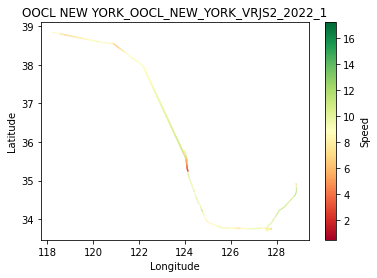

보간법 전 일반 평균 속도 : 9.433653846153845
보간법 전 일반 속도 표준편차: 1.577918659655788
보간법 전 저속 제거 평균 속도 : 9.433653846153845
보간법 전 저속 제거 속도 표준편차: 1.577918659655788
-
보간법 후 일반 평균 속도 : 9.054481690214997
보간법 후 일반 속도 표준편차: 1.5075044677617286
보간법 후 저속 제거 평균 속도 : 9.054481690214997
보간법 후 저속 제거 속도 표준편차: 1.5075044677617286


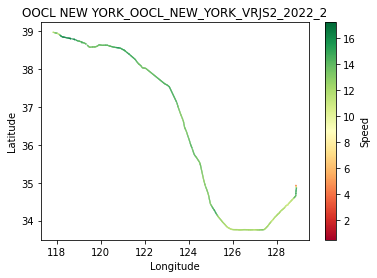

보간법 전 일반 평균 속도 : 13.148247978436657
보간법 전 일반 속도 표준편차: 1.421016686831533
보간법 전 저속 제거 평균 속도 : 13.148247978436657
보간법 전 저속 제거 속도 표준편차: 1.421016686831533
-
보간법 후 일반 평균 속도 : 13.333493189292614
보간법 후 일반 속도 표준편차: 1.3130638529059455
보간법 후 저속 제거 평균 속도 : 13.333493189292614
보간법 후 저속 제거 속도 표준편차: 1.3130638529059455


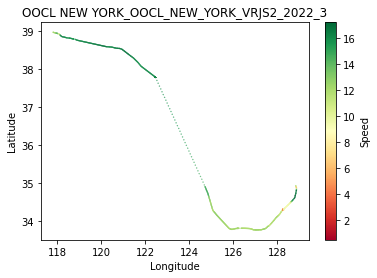

보간법 전 일반 평균 속도 : 12.789285714285715
보간법 전 일반 속도 표준편차: 2.479073208239914
보간법 전 저속 제거 평균 속도 : 12.789285714285715
보간법 전 저속 제거 속도 표준편차: 2.479073208239914
-
보간법 후 일반 평균 속도 : 13.858070026891257
보간법 후 일반 속도 표준편차: 2.9170001988566634
보간법 후 저속 제거 평균 속도 : 13.858070026891257
보간법 후 저속 제거 속도 표준편차: 2.9170001988566634


In [17]:
max_speed_list = []
min_speed_list = []
for i in OOCL_NEW_YORK_voyages_list:
    df = pd.read_csv(upper_china_path_dir + i + ".csv")
    data = df
    min_speed = data["speed"].min()
    max_speed = data["speed"].max()
    max_speed_list.append(max_speed)
    min_speed_list.append(min_speed)
min_speed = np.min(min_speed_list)
max_speed = np.max(max_speed_list)

norm = plt.Normalize(min_speed, max_speed)
cmap = plt.get_cmap('RdYlGn')
sm = plt.cm.ScalarMappable(cmap=cmap, norm=norm)
# Create a ScalarMappable with the colormap and normalization

mean_speed_dict = {"voyage" : [],"mean_speed" : []}

for i in OOCL_NEW_YORK_voyages_list:
    fig, ax = plt.subplots()
    
    df = pd.read_csv(upper_china_path_dir + i + ".csv")
    data = df
    # 3노트 이하 데이터 삭제
    data = data[data["speed"] >= 3]
    data.reset_index(inplace=True, drop=True)
    min_speed = data["speed"].min()
    max_speed = data["speed"].max()
    vessel_name = data["vessel_name"].values[0]
    voyage_name = i.split('processed')[0]
    speed_std = data["speed"].std()
    
    
    
    data['timestamp'] = pd.to_datetime(data['timestamp'])
    data['timestamp_seconds'] = (data['timestamp'] - pd.Timestamp("1970-01-01")) / pd.Timedelta(seconds=1)

    # Create a function that performs the interpolation
    interp_longitude = interpolate.interp1d(data['timestamp_seconds'], data['longitude'])
    interp_latitude = interpolate.interp1d(data['timestamp_seconds'], data['latitude'])
    interp_speed = interpolate.interp1d(data['timestamp_seconds'], data['speed'])

    # Specify the range of new x values for the interpolation
    new_x = np.linspace(data['timestamp_seconds'].min(), data['timestamp_seconds'].max(), num=int(interpolation_number))

    # Use the interpolation function to estimate y values for the new x values
    interp_longitude_y = interp_longitude(new_x)
    interp_latitude_y = interp_latitude(new_x)
    interp_speed_y = interp_speed(new_x)
    # Create new DataFrame with the interpolated values
    interp_data = pd.DataFrame({'timestamp': new_x, 'longitude': interp_longitude_y, 'latitude': interp_latitude_y, 'speed': interp_speed_y})
#     i = i.split("processed")[0]
    interp_data.to_csv(upper_china_path_dir + 'interpolated/'+ f"interpolated_{i}_below_3knot_{interpolation_number}.csv", encoding="utf-8 sig", header=True, index=False)
    
    # plot the data
    sc = ax.scatter(interp_data['longitude'], interp_data['latitude'],c = interp_data['speed'], cmap = cmap, norm = norm, s=0.1)

#     Add axis labels
    ax.set_xlabel('Longitude')
    ax.set_ylabel('Latitude')
    ax.set_title(f"{vessel_name}_{voyage_name}")
    # Add a colorbar
    cbar = plt.colorbar(sc,label='Speed')

#         Show the plot
    plt.show()
        
    check = data["speed"].apply(lambda x : True if x < 3 else False)
    s = data.drop(data[check].index)["speed"]
    print(f"보간법 전 일반 평균 속도 : {data['speed'].mean()}")
    print(f"보간법 전 일반 속도 표준편차: {data['speed'].std()}")
    print(f"보간법 전 저속 제거 평균 속도 : {s.mean()}")
    print(f'보간법 전 저속 제거 속도 표준편차: {s.std()}')
    print('-')
    check = interp_data["speed"].apply(lambda x : True if x < 3 else False)
    s = interp_data.drop(interp_data[check].index)["speed"]
    print(f"보간법 후 일반 평균 속도 : {interp_data['speed'].mean()}")
    print(f"보간법 후 일반 속도 표준편차: {interp_data['speed'].std()}")
    print(f"보간법 후 저속 제거 평균 속도 : {s.mean()}")
    mean_speed_dict['voyage'].append(voyage_name)
    mean_speed_dict['mean_speed'].append(s.mean())
    print(f'보간법 후 저속 제거 속도 표준편차: {s.std()}')

In [18]:
mean_speed_df = pd.DataFrame(mean_speed_dict)
list(mean_speed_df[mean_speed_df["mean_speed"] < 14].voyage)

['OOCL_NEW_YORK_VRJS2_2022_1',
 'OOCL_NEW_YORK_VRJS2_2022_2',
 'OOCL_NEW_YORK_VRJS2_2022_3']

In [19]:
high_speed_path_data =[]
low_speed_path_data =[]
for i in OOCL_NEW_YORK_voyages_list:
    i = i.split("processed")[0]
    if i in list(mean_speed_df[mean_speed_df["mean_speed"] < 14].voyage):
        i = "interpolated/interpolated_" + i + f'processed_below_3knot_{interpolation_number}'
        df = pd.read_csv(upper_china_path_dir + i + ".csv")
        low_speed_path_data.append(df)
    elif i in list(mean_speed_df[mean_speed_df["mean_speed"] >= 14].voyage):
        i = "interpolated/interpolated_" + i + f'processed_below_3knot_{interpolation_number}'
        df = pd.read_csv(upper_china_path_dir + i + ".csv")
        high_speed_path_data.append(df)

In [20]:
all_data = pd.concat(low_speed_path_data)

# Add a new index column representing the row number
all_data['index'] = range(len(all_data))
all_data["index"] = all_data.index
concaternated_df = all_data.groupby('index').mean()
concaternated_df.to_csv(f"실험/upper_china_{vessel_name}_low_speed_below_3_knot_{interpolation_number}_concaternated_df.csv", encoding="utf-8 sig",header=True, index=False)

## below 3 knot 제거

In [21]:
interpolation_number = "2000"

### interpolation 2000

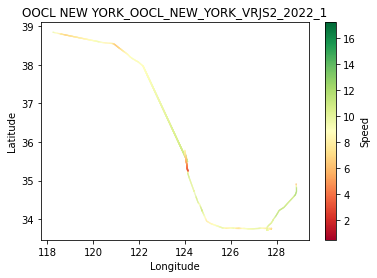

보간법 전 일반 평균 속도 : 9.433653846153845
보간법 전 일반 속도 표준편차: 1.577918659655788
보간법 전 저속 제거 평균 속도 : 9.433653846153845
보간법 전 저속 제거 속도 표준편차: 1.577918659655788
-
보간법 후 일반 평균 속도 : 9.055060851234295
보간법 후 일반 속도 표준편차: 1.5068284261246045
보간법 후 저속 제거 평균 속도 : 9.055060851234295
보간법 후 저속 제거 속도 표준편차: 1.5068284261246045


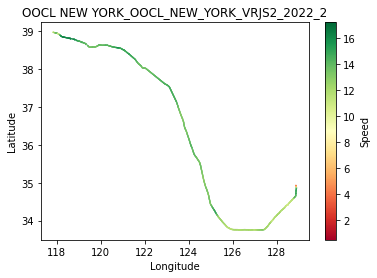

보간법 전 일반 평균 속도 : 13.148247978436657
보간법 전 일반 속도 표준편차: 1.421016686831533
보간법 전 저속 제거 평균 속도 : 13.148247978436657
보간법 전 저속 제거 속도 표준편차: 1.421016686831533
-
보간법 후 일반 평균 속도 : 13.336259410642818
보간법 후 일반 속도 표준편차: 1.304434315939391
보간법 후 저속 제거 평균 속도 : 13.336259410642818
보간법 후 저속 제거 속도 표준편차: 1.304434315939391


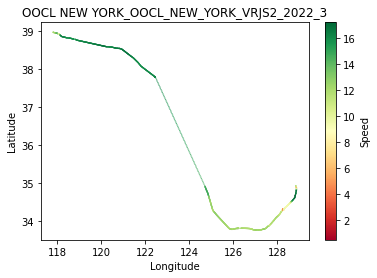

보간법 전 일반 평균 속도 : 12.789285714285715
보간법 전 일반 속도 표준편차: 2.479073208239914
보간법 전 저속 제거 평균 속도 : 12.789285714285715
보간법 전 저속 제거 속도 표준편차: 2.479073208239914
-
보간법 후 일반 평균 속도 : 13.859110928864379
보간법 후 일반 속도 표준편차: 2.9169778389505647
보간법 후 저속 제거 평균 속도 : 13.859110928864379
보간법 후 저속 제거 속도 표준편차: 2.9169778389505647


In [22]:
max_speed_list = []
min_speed_list = []
for i in OOCL_NEW_YORK_voyages_list:
    df = pd.read_csv(upper_china_path_dir + i + ".csv")
    data = df
    min_speed = data["speed"].min()
    max_speed = data["speed"].max()
    max_speed_list.append(max_speed)
    min_speed_list.append(min_speed)
min_speed = np.min(min_speed_list)
max_speed = np.max(max_speed_list)

norm = plt.Normalize(min_speed, max_speed)
cmap = plt.get_cmap('RdYlGn')
sm = plt.cm.ScalarMappable(cmap=cmap, norm=norm)
# Create a ScalarMappable with the colormap and normalization

mean_speed_dict = {"voyage" : [],"mean_speed" : []}

for i in OOCL_NEW_YORK_voyages_list:
    fig, ax = plt.subplots()
    
    df = pd.read_csv(upper_china_path_dir + i + ".csv")
    data = df
    # 3노트 이하 데이터 삭제
    data = data[data["speed"] >= 3]
    data.reset_index(inplace=True, drop=True)
    min_speed = data["speed"].min()
    max_speed = data["speed"].max()
    vessel_name = data["vessel_name"].values[0]
    voyage_name = i.split('processed')[0]
    speed_std = data["speed"].std()
    
    
    
    data['timestamp'] = pd.to_datetime(data['timestamp'])
    data['timestamp_seconds'] = (data['timestamp'] - pd.Timestamp("1970-01-01")) / pd.Timedelta(seconds=1)

    # Create a function that performs the interpolation
    interp_longitude = interpolate.interp1d(data['timestamp_seconds'], data['longitude'])
    interp_latitude = interpolate.interp1d(data['timestamp_seconds'], data['latitude'])
    interp_speed = interpolate.interp1d(data['timestamp_seconds'], data['speed'])

    # Specify the range of new x values for the interpolation
    new_x = np.linspace(data['timestamp_seconds'].min(), data['timestamp_seconds'].max(), num=int(interpolation_number))

    # Use the interpolation function to estimate y values for the new x values
    interp_longitude_y = interp_longitude(new_x)
    interp_latitude_y = interp_latitude(new_x)
    interp_speed_y = interp_speed(new_x)
    # Create new DataFrame with the interpolated values
    interp_data = pd.DataFrame({'timestamp': new_x, 'longitude': interp_longitude_y, 'latitude': interp_latitude_y, 'speed': interp_speed_y})
#     i = i.split("processed")[0]
    interp_data.to_csv(upper_china_path_dir + 'interpolated/'+ f"interpolated_{i}_below_3knot_{interpolation_number}.csv", encoding="utf-8 sig", header=True, index=False)
    
    # plot the data
    sc = ax.scatter(interp_data['longitude'], interp_data['latitude'],c = interp_data['speed'], cmap = cmap, norm = norm, s=0.1)

#     Add axis labels
    ax.set_xlabel('Longitude')
    ax.set_ylabel('Latitude')
    ax.set_title(f"{vessel_name}_{voyage_name}")
    # Add a colorbar
    cbar = plt.colorbar(sc,label='Speed')

#         Show the plot
    plt.show()
        
    check = data["speed"].apply(lambda x : True if x < 3 else False)
    s = data.drop(data[check].index)["speed"]
    print(f"보간법 전 일반 평균 속도 : {data['speed'].mean()}")
    print(f"보간법 전 일반 속도 표준편차: {data['speed'].std()}")
    print(f"보간법 전 저속 제거 평균 속도 : {s.mean()}")
    print(f'보간법 전 저속 제거 속도 표준편차: {s.std()}')
    print('-')
    check = interp_data["speed"].apply(lambda x : True if x < 3 else False)
    s = interp_data.drop(interp_data[check].index)["speed"]
    print(f"보간법 후 일반 평균 속도 : {interp_data['speed'].mean()}")
    print(f"보간법 후 일반 속도 표준편차: {interp_data['speed'].std()}")
    print(f"보간법 후 저속 제거 평균 속도 : {s.mean()}")
    mean_speed_dict['voyage'].append(voyage_name)
    mean_speed_dict['mean_speed'].append(s.mean())
    print(f'보간법 후 저속 제거 속도 표준편차: {s.std()}')

In [23]:
mean_speed_df = pd.DataFrame(mean_speed_dict)
list(mean_speed_df[mean_speed_df["mean_speed"] < 14].voyage)

['OOCL_NEW_YORK_VRJS2_2022_1',
 'OOCL_NEW_YORK_VRJS2_2022_2',
 'OOCL_NEW_YORK_VRJS2_2022_3']

In [24]:
high_speed_path_data =[]
low_speed_path_data =[]
for i in OOCL_NEW_YORK_voyages_list:
    i = i.split("processed")[0]
    if i in list(mean_speed_df[mean_speed_df["mean_speed"] < 14].voyage):
        i = "interpolated/interpolated_" + i + f'processed_below_3knot_{interpolation_number}'
        df = pd.read_csv(upper_china_path_dir + i + ".csv")
        low_speed_path_data.append(df)
    elif i in list(mean_speed_df[mean_speed_df["mean_speed"] >= 14].voyage):
        i = "interpolated/interpolated_" + i + f'processed_below_3knot_{interpolation_number}'
        df = pd.read_csv(upper_china_path_dir + i + ".csv")
        high_speed_path_data.append(df)

In [25]:
all_data = pd.concat(low_speed_path_data)

# Add a new index column representing the row number
all_data['index'] = range(len(all_data))
all_data["index"] = all_data.index
concaternated_df = all_data.groupby('index').mean()
concaternated_df.to_csv(f"실험/upper_china_{vessel_name}_low_speed_below_3_knot_{interpolation_number}_concaternated_df.csv", encoding="utf-8 sig",header=True, index=False)

## below 3 knot 제거

In [26]:
interpolation_number = "2500"

### interpolation 2500

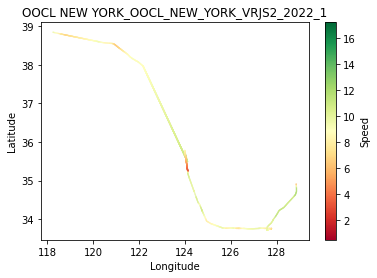

보간법 전 일반 평균 속도 : 9.433653846153845
보간법 전 일반 속도 표준편차: 1.577918659655788
보간법 전 저속 제거 평균 속도 : 9.433653846153845
보간법 전 저속 제거 속도 표준편차: 1.577918659655788
-
보간법 후 일반 평균 속도 : 9.055251847981097
보간법 후 일반 속도 표준편차: 1.506510474428143
보간법 후 저속 제거 평균 속도 : 9.055251847981097
보간법 후 저속 제거 속도 표준편차: 1.506510474428143


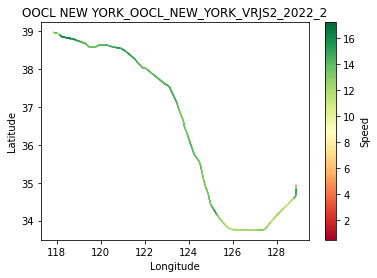

보간법 전 일반 평균 속도 : 13.148247978436657
보간법 전 일반 속도 표준편차: 1.421016686831533
보간법 전 저속 제거 평균 속도 : 13.148247978436657
보간법 전 저속 제거 속도 표준편차: 1.421016686831533
-
보간법 후 일반 평균 속도 : 13.33693212351469
보간법 후 일반 속도 표준편차: 1.3026303949105156
보간법 후 저속 제거 평균 속도 : 13.33693212351469
보간법 후 저속 제거 속도 표준편차: 1.3026303949105156


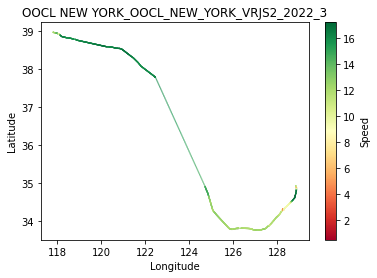

보간법 전 일반 평균 속도 : 12.789285714285715
보간법 전 일반 속도 표준편차: 2.479073208239914
보간법 전 저속 제거 평균 속도 : 12.789285714285715
보간법 전 저속 제거 속도 표준편차: 2.479073208239914
-
보간법 후 일반 평균 속도 : 13.85926811356064
보간법 후 일반 속도 표준편차: 2.917170200519676
보간법 후 저속 제거 평균 속도 : 13.85926811356064
보간법 후 저속 제거 속도 표준편차: 2.917170200519676


In [27]:
max_speed_list = []
min_speed_list = []
for i in OOCL_NEW_YORK_voyages_list:
    df = pd.read_csv(upper_china_path_dir + i + ".csv")
    data = df
    min_speed = data["speed"].min()
    max_speed = data["speed"].max()
    max_speed_list.append(max_speed)
    min_speed_list.append(min_speed)
min_speed = np.min(min_speed_list)
max_speed = np.max(max_speed_list)

norm = plt.Normalize(min_speed, max_speed)
cmap = plt.get_cmap('RdYlGn')
sm = plt.cm.ScalarMappable(cmap=cmap, norm=norm)
# Create a ScalarMappable with the colormap and normalization

mean_speed_dict = {"voyage" : [],"mean_speed" : []}

for i in OOCL_NEW_YORK_voyages_list:
    fig, ax = plt.subplots()
    
    df = pd.read_csv(upper_china_path_dir + i + ".csv")
    data = df
    # 3노트 이하 데이터 삭제
    data = data[data["speed"] >= 3]
    data.reset_index(inplace=True, drop=True)
    min_speed = data["speed"].min()
    max_speed = data["speed"].max()
    vessel_name = data["vessel_name"].values[0]
    voyage_name = i.split('processed')[0]
    speed_std = data["speed"].std()
    
    
    
    data['timestamp'] = pd.to_datetime(data['timestamp'])
    data['timestamp_seconds'] = (data['timestamp'] - pd.Timestamp("1970-01-01")) / pd.Timedelta(seconds=1)

    # Create a function that performs the interpolation
    interp_longitude = interpolate.interp1d(data['timestamp_seconds'], data['longitude'])
    interp_latitude = interpolate.interp1d(data['timestamp_seconds'], data['latitude'])
    interp_speed = interpolate.interp1d(data['timestamp_seconds'], data['speed'])

    # Specify the range of new x values for the interpolation
    new_x = np.linspace(data['timestamp_seconds'].min(), data['timestamp_seconds'].max(), num=int(interpolation_number))

    # Use the interpolation function to estimate y values for the new x values
    interp_longitude_y = interp_longitude(new_x)
    interp_latitude_y = interp_latitude(new_x)
    interp_speed_y = interp_speed(new_x)
    # Create new DataFrame with the interpolated values
    interp_data = pd.DataFrame({'timestamp': new_x, 'longitude': interp_longitude_y, 'latitude': interp_latitude_y, 'speed': interp_speed_y})
#     i = i.split("processed")[0]
    interp_data.to_csv(upper_china_path_dir + 'interpolated/'+ f"interpolated_{i}_below_3knot_{interpolation_number}.csv", encoding="utf-8 sig", header=True, index=False)
    
    # plot the data
    sc = ax.scatter(interp_data['longitude'], interp_data['latitude'],c = interp_data['speed'], cmap = cmap, norm = norm, s=0.1)

#     Add axis labels
    ax.set_xlabel('Longitude')
    ax.set_ylabel('Latitude')
    ax.set_title(f"{vessel_name}_{voyage_name}")
    # Add a colorbar
    cbar = plt.colorbar(sc,label='Speed')

#         Show the plot
    plt.show()
        
    check = data["speed"].apply(lambda x : True if x < 3 else False)
    s = data.drop(data[check].index)["speed"]
    print(f"보간법 전 일반 평균 속도 : {data['speed'].mean()}")
    print(f"보간법 전 일반 속도 표준편차: {data['speed'].std()}")
    print(f"보간법 전 저속 제거 평균 속도 : {s.mean()}")
    print(f'보간법 전 저속 제거 속도 표준편차: {s.std()}')
    print('-')
    check = interp_data["speed"].apply(lambda x : True if x < 3 else False)
    s = interp_data.drop(interp_data[check].index)["speed"]
    print(f"보간법 후 일반 평균 속도 : {interp_data['speed'].mean()}")
    print(f"보간법 후 일반 속도 표준편차: {interp_data['speed'].std()}")
    print(f"보간법 후 저속 제거 평균 속도 : {s.mean()}")
    mean_speed_dict['voyage'].append(voyage_name)
    mean_speed_dict['mean_speed'].append(s.mean())
    print(f'보간법 후 저속 제거 속도 표준편차: {s.std()}')

In [28]:
mean_speed_df = pd.DataFrame(mean_speed_dict)
list(mean_speed_df[mean_speed_df["mean_speed"] < 14].voyage)

['OOCL_NEW_YORK_VRJS2_2022_1',
 'OOCL_NEW_YORK_VRJS2_2022_2',
 'OOCL_NEW_YORK_VRJS2_2022_3']

In [29]:
high_speed_path_data =[]
low_speed_path_data =[]
for i in OOCL_NEW_YORK_voyages_list:
    i = i.split("processed")[0]
    if i in list(mean_speed_df[mean_speed_df["mean_speed"] < 14].voyage):
        i = "interpolated/interpolated_" + i + f'processed_below_3knot_{interpolation_number}'
        df = pd.read_csv(upper_china_path_dir + i + ".csv")
        low_speed_path_data.append(df)
    elif i in list(mean_speed_df[mean_speed_df["mean_speed"] >= 14].voyage):
        i = "interpolated/interpolated_" + i + f'processed_below_3knot_{interpolation_number}'
        df = pd.read_csv(upper_china_path_dir + i + ".csv")
        high_speed_path_data.append(df)

In [30]:
all_data = pd.concat(low_speed_path_data)

# Add a new index column representing the row number
all_data['index'] = range(len(all_data))
all_data["index"] = all_data.index
concaternated_df = all_data.groupby('index').mean()
concaternated_df.to_csv(f"실험/upper_china_{vessel_name}_low_speed_below_3_knot_{interpolation_number}_concaternated_df.csv", encoding="utf-8 sig",header=True, index=False)

## below 3 knot 제거

In [31]:
interpolation_number = "3000"

### interpolation 3000

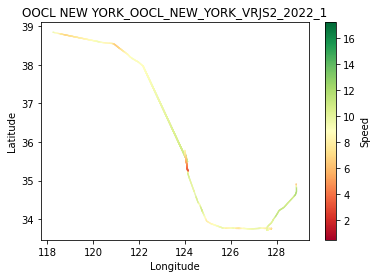

보간법 전 일반 평균 속도 : 9.433653846153845
보간법 전 일반 속도 표준편차: 1.577918659655788
보간법 전 저속 제거 평균 속도 : 9.433653846153845
보간법 전 저속 제거 속도 표준편차: 1.577918659655788
-
보간법 후 일반 평균 속도 : 9.055304941981145
보간법 후 일반 속도 표준편차: 1.5064722257700867
보간법 후 저속 제거 평균 속도 : 9.055304941981145
보간법 후 저속 제거 속도 표준편차: 1.5064722257700867


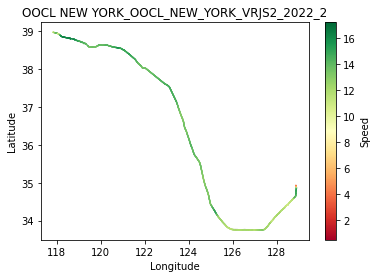

보간법 전 일반 평균 속도 : 13.148247978436657
보간법 전 일반 속도 표준편차: 1.421016686831533
보간법 전 저속 제거 평균 속도 : 13.148247978436657
보간법 전 저속 제거 속도 표준편차: 1.421016686831533
-
보간법 후 일반 평균 속도 : 13.337232281462253
보간법 후 일반 속도 표준편차: 1.3014972816787438
보간법 후 저속 제거 평균 속도 : 13.337232281462253
보간법 후 저속 제거 속도 표준편차: 1.3014972816787438


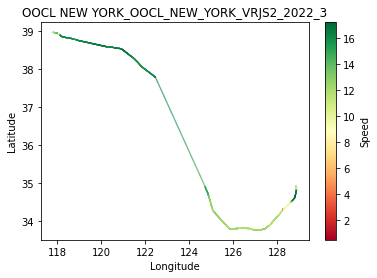

보간법 전 일반 평균 속도 : 12.789285714285715
보간법 전 일반 속도 표준편차: 2.479073208239914
보간법 전 저속 제거 평균 속도 : 12.789285714285715
보간법 전 저속 제거 속도 표준편차: 2.479073208239914
-
보간법 후 일반 평균 속도 : 13.859412449011378
보간법 후 일반 속도 표준편차: 2.917078713530605
보간법 후 저속 제거 평균 속도 : 13.859412449011378
보간법 후 저속 제거 속도 표준편차: 2.917078713530605


In [32]:
max_speed_list = []
min_speed_list = []
for i in OOCL_NEW_YORK_voyages_list:
    df = pd.read_csv(upper_china_path_dir + i + ".csv")
    data = df
    min_speed = data["speed"].min()
    max_speed = data["speed"].max()
    max_speed_list.append(max_speed)
    min_speed_list.append(min_speed)
min_speed = np.min(min_speed_list)
max_speed = np.max(max_speed_list)

norm = plt.Normalize(min_speed, max_speed)
cmap = plt.get_cmap('RdYlGn')
sm = plt.cm.ScalarMappable(cmap=cmap, norm=norm)
# Create a ScalarMappable with the colormap and normalization

mean_speed_dict = {"voyage" : [],"mean_speed" : []}

for i in OOCL_NEW_YORK_voyages_list:
    fig, ax = plt.subplots()
    
    df = pd.read_csv(upper_china_path_dir + i + ".csv")
    data = df
    # 3노트 이하 데이터 삭제
    data = data[data["speed"] >= 3]
    data.reset_index(inplace=True, drop=True)
    min_speed = data["speed"].min()
    max_speed = data["speed"].max()
    vessel_name = data["vessel_name"].values[0]
    voyage_name = i.split('processed')[0]
    speed_std = data["speed"].std()
    
    
    
    data['timestamp'] = pd.to_datetime(data['timestamp'])
    data['timestamp_seconds'] = (data['timestamp'] - pd.Timestamp("1970-01-01")) / pd.Timedelta(seconds=1)

    # Create a function that performs the interpolation
    interp_longitude = interpolate.interp1d(data['timestamp_seconds'], data['longitude'])
    interp_latitude = interpolate.interp1d(data['timestamp_seconds'], data['latitude'])
    interp_speed = interpolate.interp1d(data['timestamp_seconds'], data['speed'])

    # Specify the range of new x values for the interpolation
    new_x = np.linspace(data['timestamp_seconds'].min(), data['timestamp_seconds'].max(), num=int(interpolation_number))

    # Use the interpolation function to estimate y values for the new x values
    interp_longitude_y = interp_longitude(new_x)
    interp_latitude_y = interp_latitude(new_x)
    interp_speed_y = interp_speed(new_x)
    # Create new DataFrame with the interpolated values
    interp_data = pd.DataFrame({'timestamp': new_x, 'longitude': interp_longitude_y, 'latitude': interp_latitude_y, 'speed': interp_speed_y})
#     i = i.split("processed")[0]
    interp_data.to_csv(upper_china_path_dir + 'interpolated/'+ f"interpolated_{i}_below_3knot_{interpolation_number}.csv", encoding="utf-8 sig", header=True, index=False)
    
    # plot the data
    sc = ax.scatter(interp_data['longitude'], interp_data['latitude'],c = interp_data['speed'], cmap = cmap, norm = norm, s=0.1)

#     Add axis labels
    ax.set_xlabel('Longitude')
    ax.set_ylabel('Latitude')
    ax.set_title(f"{vessel_name}_{voyage_name}")
    # Add a colorbar
    cbar = plt.colorbar(sc,label='Speed')

#         Show the plot
    plt.show()
        
    check = data["speed"].apply(lambda x : True if x < 3 else False)
    s = data.drop(data[check].index)["speed"]
    print(f"보간법 전 일반 평균 속도 : {data['speed'].mean()}")
    print(f"보간법 전 일반 속도 표준편차: {data['speed'].std()}")
    print(f"보간법 전 저속 제거 평균 속도 : {s.mean()}")
    print(f'보간법 전 저속 제거 속도 표준편차: {s.std()}')
    print('-')
    check = interp_data["speed"].apply(lambda x : True if x < 3 else False)
    s = interp_data.drop(interp_data[check].index)["speed"]
    print(f"보간법 후 일반 평균 속도 : {interp_data['speed'].mean()}")
    print(f"보간법 후 일반 속도 표준편차: {interp_data['speed'].std()}")
    print(f"보간법 후 저속 제거 평균 속도 : {s.mean()}")
    mean_speed_dict['voyage'].append(voyage_name)
    mean_speed_dict['mean_speed'].append(s.mean())
    print(f'보간법 후 저속 제거 속도 표준편차: {s.std()}')

In [33]:
mean_speed_df = pd.DataFrame(mean_speed_dict)
list(mean_speed_df[mean_speed_df["mean_speed"] < 14].voyage)

['OOCL_NEW_YORK_VRJS2_2022_1',
 'OOCL_NEW_YORK_VRJS2_2022_2',
 'OOCL_NEW_YORK_VRJS2_2022_3']

In [34]:
high_speed_path_data =[]
low_speed_path_data =[]
for i in OOCL_NEW_YORK_voyages_list:
    i = i.split("processed")[0]
    if i in list(mean_speed_df[mean_speed_df["mean_speed"] < 14].voyage):
        i = "interpolated/interpolated_" + i + f'processed_below_3knot_{interpolation_number}'
        df = pd.read_csv(upper_china_path_dir + i + ".csv")
        low_speed_path_data.append(df)
    elif i in list(mean_speed_df[mean_speed_df["mean_speed"] >= 14].voyage):
        i = "interpolated/interpolated_" + i + f'processed_below_3knot_{interpolation_number}'
        df = pd.read_csv(upper_china_path_dir + i + ".csv")
        high_speed_path_data.append(df)

In [35]:
all_data = pd.concat(low_speed_path_data)

# Add a new index column representing the row number
all_data['index'] = range(len(all_data))
all_data["index"] = all_data.index
concaternated_df = all_data.groupby('index').mean()
concaternated_df.to_csv(f"실험/upper_china_{vessel_name}_low_speed_below_3_knot_{interpolation_number}_concaternated_df.csv", encoding="utf-8 sig",header=True, index=False)

## below 3 knot 제거

In [36]:
interpolation_number = "4000"

### interpolation 4000

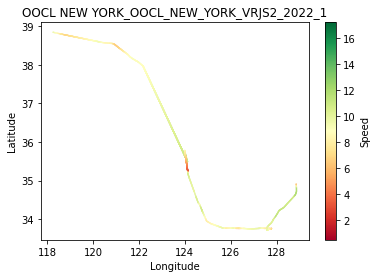

보간법 전 일반 평균 속도 : 9.433653846153845
보간법 전 일반 속도 표준편차: 1.577918659655788
보간법 전 저속 제거 평균 속도 : 9.433653846153845
보간법 전 저속 제거 속도 표준편차: 1.577918659655788
-
보간법 후 일반 평균 속도 : 9.055450741749999
보간법 후 일반 속도 표준편차: 1.5062855938181696
보간법 후 저속 제거 평균 속도 : 9.055450741749999
보간법 후 저속 제거 속도 표준편차: 1.5062855938181696


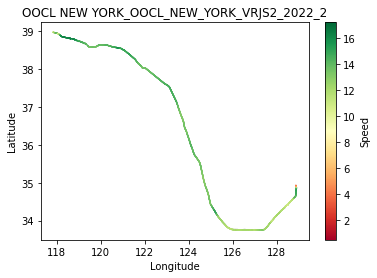

보간법 전 일반 평균 속도 : 13.148247978436657
보간법 전 일반 속도 표준편차: 1.421016686831533
보간법 전 저속 제거 평균 속도 : 13.148247978436657
보간법 전 저속 제거 속도 표준편차: 1.421016686831533
-
보간법 후 일반 평균 속도 : 13.337730424923933
보간법 후 일반 속도 표준편차: 1.300136904636589
보간법 후 저속 제거 평균 속도 : 13.337730424923933
보간법 후 저속 제거 속도 표준편차: 1.300136904636589


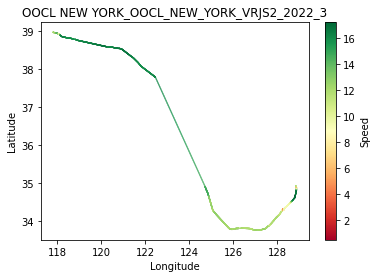

보간법 전 일반 평균 속도 : 12.789285714285715
보간법 전 일반 속도 표준편차: 2.479073208239914
보간법 전 저속 제거 평균 속도 : 12.789285714285715
보간법 전 저속 제거 속도 표준편차: 2.479073208239914
-
보간법 후 일반 평균 속도 : 13.859568875072318
보간법 후 일반 속도 표준편차: 2.917057985832714
보간법 후 저속 제거 평균 속도 : 13.859568875072318
보간법 후 저속 제거 속도 표준편차: 2.917057985832714


In [37]:
max_speed_list = []
min_speed_list = []
for i in OOCL_NEW_YORK_voyages_list:
    df = pd.read_csv(upper_china_path_dir + i + ".csv")
    data = df
    min_speed = data["speed"].min()
    max_speed = data["speed"].max()
    max_speed_list.append(max_speed)
    min_speed_list.append(min_speed)
min_speed = np.min(min_speed_list)
max_speed = np.max(max_speed_list)

norm = plt.Normalize(min_speed, max_speed)
cmap = plt.get_cmap('RdYlGn')
sm = plt.cm.ScalarMappable(cmap=cmap, norm=norm)
# Create a ScalarMappable with the colormap and normalization

mean_speed_dict = {"voyage" : [],"mean_speed" : []}

for i in OOCL_NEW_YORK_voyages_list:
    fig, ax = plt.subplots()
    
    df = pd.read_csv(upper_china_path_dir + i + ".csv")
    data = df
    # 3노트 이하 데이터 삭제
    data = data[data["speed"] >= 3]
    data.reset_index(inplace=True, drop=True)
    min_speed = data["speed"].min()
    max_speed = data["speed"].max()
    vessel_name = data["vessel_name"].values[0]
    voyage_name = i.split('processed')[0]
    speed_std = data["speed"].std()
    
    
    
    data['timestamp'] = pd.to_datetime(data['timestamp'])
    data['timestamp_seconds'] = (data['timestamp'] - pd.Timestamp("1970-01-01")) / pd.Timedelta(seconds=1)

    # Create a function that performs the interpolation
    interp_longitude = interpolate.interp1d(data['timestamp_seconds'], data['longitude'])
    interp_latitude = interpolate.interp1d(data['timestamp_seconds'], data['latitude'])
    interp_speed = interpolate.interp1d(data['timestamp_seconds'], data['speed'])

    # Specify the range of new x values for the interpolation
    new_x = np.linspace(data['timestamp_seconds'].min(), data['timestamp_seconds'].max(), num=int(interpolation_number))

    # Use the interpolation function to estimate y values for the new x values
    interp_longitude_y = interp_longitude(new_x)
    interp_latitude_y = interp_latitude(new_x)
    interp_speed_y = interp_speed(new_x)
    # Create new DataFrame with the interpolated values
    interp_data = pd.DataFrame({'timestamp': new_x, 'longitude': interp_longitude_y, 'latitude': interp_latitude_y, 'speed': interp_speed_y})
#     i = i.split("processed")[0]
    interp_data.to_csv(upper_china_path_dir + 'interpolated/'+ f"interpolated_{i}_below_3knot_{interpolation_number}.csv", encoding="utf-8 sig", header=True, index=False)
    
    # plot the data
    sc = ax.scatter(interp_data['longitude'], interp_data['latitude'],c = interp_data['speed'], cmap = cmap, norm = norm, s=0.1)

#     Add axis labels
    ax.set_xlabel('Longitude')
    ax.set_ylabel('Latitude')
    ax.set_title(f"{vessel_name}_{voyage_name}")
    # Add a colorbar
    cbar = plt.colorbar(sc,label='Speed')

#         Show the plot
    plt.show()
        
    check = data["speed"].apply(lambda x : True if x < 3 else False)
    s = data.drop(data[check].index)["speed"]
    print(f"보간법 전 일반 평균 속도 : {data['speed'].mean()}")
    print(f"보간법 전 일반 속도 표준편차: {data['speed'].std()}")
    print(f"보간법 전 저속 제거 평균 속도 : {s.mean()}")
    print(f'보간법 전 저속 제거 속도 표준편차: {s.std()}')
    print('-')
    check = interp_data["speed"].apply(lambda x : True if x < 3 else False)
    s = interp_data.drop(interp_data[check].index)["speed"]
    print(f"보간법 후 일반 평균 속도 : {interp_data['speed'].mean()}")
    print(f"보간법 후 일반 속도 표준편차: {interp_data['speed'].std()}")
    print(f"보간법 후 저속 제거 평균 속도 : {s.mean()}")
    mean_speed_dict['voyage'].append(voyage_name)
    mean_speed_dict['mean_speed'].append(s.mean())
    print(f'보간법 후 저속 제거 속도 표준편차: {s.std()}')

In [38]:
mean_speed_df = pd.DataFrame(mean_speed_dict)
list(mean_speed_df[mean_speed_df["mean_speed"] < 14].voyage)

['OOCL_NEW_YORK_VRJS2_2022_1',
 'OOCL_NEW_YORK_VRJS2_2022_2',
 'OOCL_NEW_YORK_VRJS2_2022_3']

In [39]:
high_speed_path_data =[]
low_speed_path_data =[]
for i in OOCL_NEW_YORK_voyages_list:
    i = i.split("processed")[0]
    if i in list(mean_speed_df[mean_speed_df["mean_speed"] < 14].voyage):
        i = "interpolated/interpolated_" + i + f'processed_below_3knot_{interpolation_number}'
        df = pd.read_csv(upper_china_path_dir + i + ".csv")
        low_speed_path_data.append(df)
    elif i in list(mean_speed_df[mean_speed_df["mean_speed"] >= 14].voyage):
        i = "interpolated/interpolated_" + i + f'processed_below_3knot_{interpolation_number}'
        df = pd.read_csv(upper_china_path_dir + i + ".csv")
        high_speed_path_data.append(df)

In [40]:
all_data = pd.concat(low_speed_path_data)

# Add a new index column representing the row number
all_data['index'] = range(len(all_data))
all_data["index"] = all_data.index
concaternated_df = all_data.groupby('index').mean()
concaternated_df.to_csv(f"실험/upper_china_{vessel_name}_low_speed_below_3_knot_{interpolation_number}_concaternated_df.csv", encoding="utf-8 sig",header=True, index=False)

## below 3 knot 제거

In [41]:
interpolation_number = "5000"

### interpolation 5000

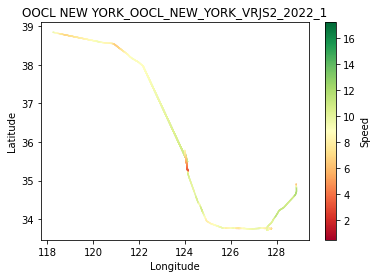

보간법 전 일반 평균 속도 : 9.433653846153845
보간법 전 일반 속도 표준편차: 1.577918659655788
보간법 전 저속 제거 평균 속도 : 9.433653846153845
보간법 전 저속 제거 속도 표준편차: 1.577918659655788
-
보간법 후 일반 평균 속도 : 9.055503623014964
보간법 후 일반 속도 표준편차: 1.5061987129502004
보간법 후 저속 제거 평균 속도 : 9.055503623014964
보간법 후 저속 제거 속도 표준편차: 1.5061987129502004


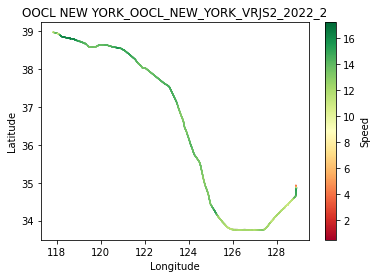

보간법 전 일반 평균 속도 : 13.148247978436657
보간법 전 일반 속도 표준편차: 1.421016686831533
보간법 전 저속 제거 평균 속도 : 13.148247978436657
보간법 전 저속 제거 속도 표준편차: 1.421016686831533
-
보간법 후 일반 평균 속도 : 13.3380090960634
보간법 후 일반 속도 표준편차: 1.2992768101232952
보간법 후 저속 제거 평균 속도 : 13.3380090960634
보간법 후 저속 제거 속도 표준편차: 1.2992768101232952


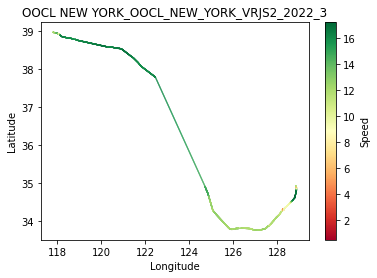

보간법 전 일반 평균 속도 : 12.789285714285715
보간법 전 일반 속도 표준편차: 2.479073208239914
보간법 전 저속 제거 평균 속도 : 12.789285714285715
보간법 전 저속 제거 속도 표준편차: 2.479073208239914
-
보간법 후 일반 평균 속도 : 13.859685799190634
보간법 후 일반 속도 표준편차: 2.9169913111196952
보간법 후 저속 제거 평균 속도 : 13.859685799190634
보간법 후 저속 제거 속도 표준편차: 2.9169913111196952


In [42]:
max_speed_list = []
min_speed_list = []
for i in OOCL_NEW_YORK_voyages_list:
    df = pd.read_csv(upper_china_path_dir + i + ".csv")
    data = df
    min_speed = data["speed"].min()
    max_speed = data["speed"].max()
    max_speed_list.append(max_speed)
    min_speed_list.append(min_speed)
min_speed = np.min(min_speed_list)
max_speed = np.max(max_speed_list)

norm = plt.Normalize(min_speed, max_speed)
cmap = plt.get_cmap('RdYlGn')
sm = plt.cm.ScalarMappable(cmap=cmap, norm=norm)
# Create a ScalarMappable with the colormap and normalization

mean_speed_dict = {"voyage" : [],"mean_speed" : []}

for i in OOCL_NEW_YORK_voyages_list:
    fig, ax = plt.subplots()
    
    df = pd.read_csv(upper_china_path_dir + i + ".csv")
    data = df
    # 3노트 이하 데이터 삭제
    data = data[data["speed"] >= 3]
    data.reset_index(inplace=True, drop=True)
    min_speed = data["speed"].min()
    max_speed = data["speed"].max()
    vessel_name = data["vessel_name"].values[0]
    voyage_name = i.split('processed')[0]
    speed_std = data["speed"].std()
    
    
    
    data['timestamp'] = pd.to_datetime(data['timestamp'])
    data['timestamp_seconds'] = (data['timestamp'] - pd.Timestamp("1970-01-01")) / pd.Timedelta(seconds=1)

    # Create a function that performs the interpolation
    interp_longitude = interpolate.interp1d(data['timestamp_seconds'], data['longitude'])
    interp_latitude = interpolate.interp1d(data['timestamp_seconds'], data['latitude'])
    interp_speed = interpolate.interp1d(data['timestamp_seconds'], data['speed'])

    # Specify the range of new x values for the interpolation
    new_x = np.linspace(data['timestamp_seconds'].min(), data['timestamp_seconds'].max(), num=int(interpolation_number))

    # Use the interpolation function to estimate y values for the new x values
    interp_longitude_y = interp_longitude(new_x)
    interp_latitude_y = interp_latitude(new_x)
    interp_speed_y = interp_speed(new_x)
    # Create new DataFrame with the interpolated values
    interp_data = pd.DataFrame({'timestamp': new_x, 'longitude': interp_longitude_y, 'latitude': interp_latitude_y, 'speed': interp_speed_y})
#     i = i.split("processed")[0]
    interp_data.to_csv(upper_china_path_dir + 'interpolated/'+ f"interpolated_{i}_below_3knot_{interpolation_number}.csv", encoding="utf-8 sig", header=True, index=False)
    
    # plot the data
    sc = ax.scatter(interp_data['longitude'], interp_data['latitude'],c = interp_data['speed'], cmap = cmap, norm = norm, s=0.1)

#     Add axis labels
    ax.set_xlabel('Longitude')
    ax.set_ylabel('Latitude')
    ax.set_title(f"{vessel_name}_{voyage_name}")
    # Add a colorbar
    cbar = plt.colorbar(sc,label='Speed')

#         Show the plot
    plt.show()
        
    check = data["speed"].apply(lambda x : True if x < 3 else False)
    s = data.drop(data[check].index)["speed"]
    print(f"보간법 전 일반 평균 속도 : {data['speed'].mean()}")
    print(f"보간법 전 일반 속도 표준편차: {data['speed'].std()}")
    print(f"보간법 전 저속 제거 평균 속도 : {s.mean()}")
    print(f'보간법 전 저속 제거 속도 표준편차: {s.std()}')
    print('-')
    check = interp_data["speed"].apply(lambda x : True if x < 3 else False)
    s = interp_data.drop(interp_data[check].index)["speed"]
    print(f"보간법 후 일반 평균 속도 : {interp_data['speed'].mean()}")
    print(f"보간법 후 일반 속도 표준편차: {interp_data['speed'].std()}")
    print(f"보간법 후 저속 제거 평균 속도 : {s.mean()}")
    mean_speed_dict['voyage'].append(voyage_name)
    mean_speed_dict['mean_speed'].append(s.mean())
    print(f'보간법 후 저속 제거 속도 표준편차: {s.std()}')

In [43]:
mean_speed_df = pd.DataFrame(mean_speed_dict)
list(mean_speed_df[mean_speed_df["mean_speed"] < 14].voyage)

['OOCL_NEW_YORK_VRJS2_2022_1',
 'OOCL_NEW_YORK_VRJS2_2022_2',
 'OOCL_NEW_YORK_VRJS2_2022_3']

In [44]:
high_speed_path_data =[]
low_speed_path_data =[]
for i in OOCL_NEW_YORK_voyages_list:
    i = i.split("processed")[0]
    if i in list(mean_speed_df[mean_speed_df["mean_speed"] < 14].voyage):
        i = "interpolated/interpolated_" + i + f'processed_below_3knot_{interpolation_number}'
        df = pd.read_csv(upper_china_path_dir + i + ".csv")
        low_speed_path_data.append(df)
    elif i in list(mean_speed_df[mean_speed_df["mean_speed"] >= 14].voyage):
        i = "interpolated/interpolated_" + i + f'processed_below_3knot_{interpolation_number}'
        df = pd.read_csv(upper_china_path_dir + i + ".csv")
        high_speed_path_data.append(df)

In [45]:
all_data = pd.concat(low_speed_path_data)

# Add a new index column representing the row number
all_data['index'] = range(len(all_data))
all_data["index"] = all_data.index
concaternated_df = all_data.groupby('index').mean()
concaternated_df.to_csv(f"실험/upper_china_{vessel_name}_low_speed_below_3_knot_{interpolation_number}_concaternated_df.csv", encoding="utf-8 sig",header=True, index=False)

## below 3 knot 제거

In [46]:
interpolation_number = "7500"

### interpolation 7500

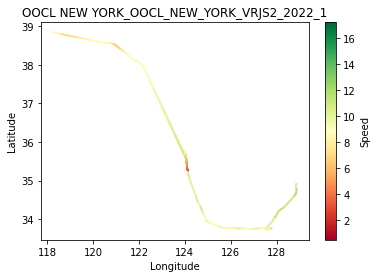

보간법 전 일반 평균 속도 : 9.433653846153845
보간법 전 일반 속도 표준편차: 1.577918659655788
보간법 전 저속 제거 평균 속도 : 9.433653846153845
보간법 전 저속 제거 속도 표준편차: 1.577918659655788
-
보간법 후 일반 평균 속도 : 9.05559129593926
보간법 후 일반 속도 표준편차: 1.5060971184258631
보간법 후 저속 제거 평균 속도 : 9.05559129593926
보간법 후 저속 제거 속도 표준편차: 1.5060971184258631


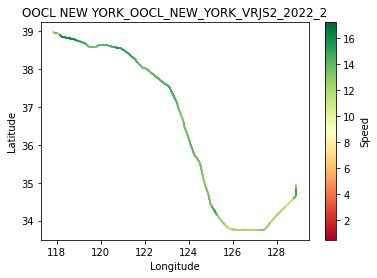

보간법 전 일반 평균 속도 : 13.148247978436657
보간법 전 일반 속도 표준편차: 1.421016686831533
보간법 전 저속 제거 평균 속도 : 13.148247978436657
보간법 전 저속 제거 속도 표준편차: 1.421016686831533
-
보간법 후 일반 평균 속도 : 13.338380567997717
보간법 후 일반 속도 표준편차: 1.2981343696095669
보간법 후 저속 제거 평균 속도 : 13.338380567997717
보간법 후 저속 제거 속도 표준편차: 1.2981343696095669


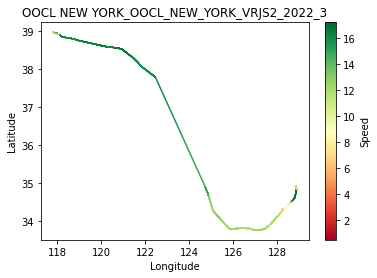

보간법 전 일반 평균 속도 : 12.789285714285715
보간법 전 일반 속도 표준편차: 2.479073208239914
보간법 전 저속 제거 평균 속도 : 12.789285714285715
보간법 전 저속 제거 속도 표준편차: 2.479073208239914
-
보간법 후 일반 평균 속도 : 13.859835056011756
보간법 후 일반 속도 표준편차: 2.91692772335305
보간법 후 저속 제거 평균 속도 : 13.859835056011756
보간법 후 저속 제거 속도 표준편차: 2.91692772335305


In [47]:
max_speed_list = []
min_speed_list = []
for i in OOCL_NEW_YORK_voyages_list:
    df = pd.read_csv(upper_china_path_dir + i + ".csv")
    data = df
    min_speed = data["speed"].min()
    max_speed = data["speed"].max()
    max_speed_list.append(max_speed)
    min_speed_list.append(min_speed)
min_speed = np.min(min_speed_list)
max_speed = np.max(max_speed_list)

norm = plt.Normalize(min_speed, max_speed)
cmap = plt.get_cmap('RdYlGn')
sm = plt.cm.ScalarMappable(cmap=cmap, norm=norm)
# Create a ScalarMappable with the colormap and normalization

mean_speed_dict = {"voyage" : [],"mean_speed" : []}

for i in OOCL_NEW_YORK_voyages_list:
    fig, ax = plt.subplots()
    
    df = pd.read_csv(upper_china_path_dir + i + ".csv")
    data = df
    # 3노트 이하 데이터 삭제
    data = data[data["speed"] >= 3]
    data.reset_index(inplace=True, drop=True)
    min_speed = data["speed"].min()
    max_speed = data["speed"].max()
    vessel_name = data["vessel_name"].values[0]
    voyage_name = i.split('processed')[0]
    speed_std = data["speed"].std()
    
    
    
    data['timestamp'] = pd.to_datetime(data['timestamp'])
    data['timestamp_seconds'] = (data['timestamp'] - pd.Timestamp("1970-01-01")) / pd.Timedelta(seconds=1)

    # Create a function that performs the interpolation
    interp_longitude = interpolate.interp1d(data['timestamp_seconds'], data['longitude'])
    interp_latitude = interpolate.interp1d(data['timestamp_seconds'], data['latitude'])
    interp_speed = interpolate.interp1d(data['timestamp_seconds'], data['speed'])

    # Specify the range of new x values for the interpolation
    new_x = np.linspace(data['timestamp_seconds'].min(), data['timestamp_seconds'].max(), num=int(interpolation_number))

    # Use the interpolation function to estimate y values for the new x values
    interp_longitude_y = interp_longitude(new_x)
    interp_latitude_y = interp_latitude(new_x)
    interp_speed_y = interp_speed(new_x)
    # Create new DataFrame with the interpolated values
    interp_data = pd.DataFrame({'timestamp': new_x, 'longitude': interp_longitude_y, 'latitude': interp_latitude_y, 'speed': interp_speed_y})
#     i = i.split("processed")[0]
    interp_data.to_csv(upper_china_path_dir + 'interpolated/'+ f"interpolated_{i}_below_3knot_{interpolation_number}.csv", encoding="utf-8 sig", header=True, index=False)
    
    # plot the data
    sc = ax.scatter(interp_data['longitude'], interp_data['latitude'],c = interp_data['speed'], cmap = cmap, norm = norm, s=0.1)

#     Add axis labels
    ax.set_xlabel('Longitude')
    ax.set_ylabel('Latitude')
    ax.set_title(f"{vessel_name}_{voyage_name}")
    # Add a colorbar
    cbar = plt.colorbar(sc,label='Speed')

#         Show the plot
    plt.show()
        
    check = data["speed"].apply(lambda x : True if x < 3 else False)
    s = data.drop(data[check].index)["speed"]
    print(f"보간법 전 일반 평균 속도 : {data['speed'].mean()}")
    print(f"보간법 전 일반 속도 표준편차: {data['speed'].std()}")
    print(f"보간법 전 저속 제거 평균 속도 : {s.mean()}")
    print(f'보간법 전 저속 제거 속도 표준편차: {s.std()}')
    print('-')
    check = interp_data["speed"].apply(lambda x : True if x < 3 else False)
    s = interp_data.drop(interp_data[check].index)["speed"]
    print(f"보간법 후 일반 평균 속도 : {interp_data['speed'].mean()}")
    print(f"보간법 후 일반 속도 표준편차: {interp_data['speed'].std()}")
    print(f"보간법 후 저속 제거 평균 속도 : {s.mean()}")
    mean_speed_dict['voyage'].append(voyage_name)
    mean_speed_dict['mean_speed'].append(s.mean())
    print(f'보간법 후 저속 제거 속도 표준편차: {s.std()}')

In [48]:
mean_speed_df = pd.DataFrame(mean_speed_dict)
list(mean_speed_df[mean_speed_df["mean_speed"] < 14].voyage)

['OOCL_NEW_YORK_VRJS2_2022_1',
 'OOCL_NEW_YORK_VRJS2_2022_2',
 'OOCL_NEW_YORK_VRJS2_2022_3']

In [49]:
high_speed_path_data =[]
low_speed_path_data =[]
for i in OOCL_NEW_YORK_voyages_list:
    i = i.split("processed")[0]
    if i in list(mean_speed_df[mean_speed_df["mean_speed"] < 14].voyage):
        i = "interpolated/interpolated_" + i + f'processed_below_3knot_{interpolation_number}'
        df = pd.read_csv(upper_china_path_dir + i + ".csv")
        low_speed_path_data.append(df)
    elif i in list(mean_speed_df[mean_speed_df["mean_speed"] >= 14].voyage):
        i = "interpolated/interpolated_" + i + f'processed_below_3knot_{interpolation_number}'
        df = pd.read_csv(upper_china_path_dir + i + ".csv")
        high_speed_path_data.append(df)

In [50]:
all_data = pd.concat(low_speed_path_data)

# Add a new index column representing the row number
all_data['index'] = range(len(all_data))
all_data["index"] = all_data.index
concaternated_df = all_data.groupby('index').mean()
concaternated_df.to_csv(f"실험/upper_china_{vessel_name}_low_speed_below_3_knot_{interpolation_number}_concaternated_df.csv", encoding="utf-8 sig",header=True, index=False)

## below 3 knot 제거

In [51]:
interpolation_number = "9000"

### interpolation 9000

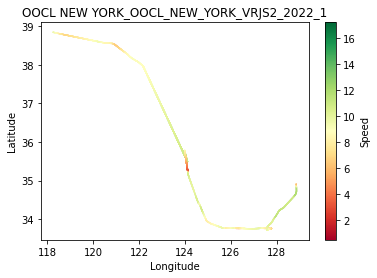

보간법 전 일반 평균 속도 : 9.433653846153845
보간법 전 일반 속도 표준편차: 1.577918659655788
보간법 전 저속 제거 평균 속도 : 9.433653846153845
보간법 전 저속 제거 속도 표준편차: 1.577918659655788
-
보간법 후 일반 평균 속도 : 9.05562759210115
보간법 후 일반 속도 표준편차: 1.5060555227052788
보간법 후 저속 제거 평균 속도 : 9.05562759210115
보간법 후 저속 제거 속도 표준편차: 1.5060555227052788


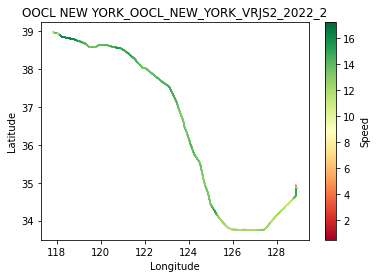

보간법 전 일반 평균 속도 : 13.148247978436657
보간법 전 일반 속도 표준편차: 1.421016686831533
보간법 전 저속 제거 평균 속도 : 13.148247978436657
보간법 전 저속 제거 속도 표준편차: 1.421016686831533
-
보간법 후 일반 평균 속도 : 13.33849446422826
보간법 후 일반 속도 표준편차: 1.2977705462679645
보간법 후 저속 제거 평균 속도 : 13.33849446422826
보간법 후 저속 제거 속도 표준편차: 1.2977705462679645


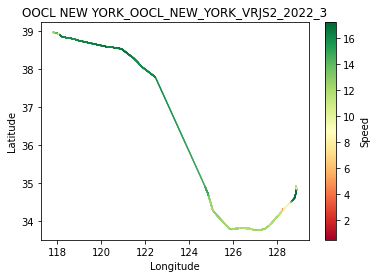

보간법 전 일반 평균 속도 : 12.789285714285715
보간법 전 일반 속도 표준편차: 2.479073208239914
보간법 전 저속 제거 평균 속도 : 12.789285714285715
보간법 전 저속 제거 속도 표준편차: 2.479073208239914
-
보간법 후 일반 평균 속도 : 13.859870846717211
보간법 후 일반 속도 표준편차: 2.9169185779366678
보간법 후 저속 제거 평균 속도 : 13.859870846717211
보간법 후 저속 제거 속도 표준편차: 2.9169185779366678


In [52]:
max_speed_list = []
min_speed_list = []
for i in OOCL_NEW_YORK_voyages_list:
    df = pd.read_csv(upper_china_path_dir + i + ".csv")
    data = df
    min_speed = data["speed"].min()
    max_speed = data["speed"].max()
    max_speed_list.append(max_speed)
    min_speed_list.append(min_speed)
min_speed = np.min(min_speed_list)
max_speed = np.max(max_speed_list)

norm = plt.Normalize(min_speed, max_speed)
cmap = plt.get_cmap('RdYlGn')
sm = plt.cm.ScalarMappable(cmap=cmap, norm=norm)
# Create a ScalarMappable with the colormap and normalization

mean_speed_dict = {"voyage" : [],"mean_speed" : []}

for i in OOCL_NEW_YORK_voyages_list:
    fig, ax = plt.subplots()
    
    df = pd.read_csv(upper_china_path_dir + i + ".csv")
    data = df
    # 3노트 이하 데이터 삭제
    data = data[data["speed"] >= 3]
    data.reset_index(inplace=True, drop=True)
    min_speed = data["speed"].min()
    max_speed = data["speed"].max()
    vessel_name = data["vessel_name"].values[0]
    voyage_name = i.split('processed')[0]
    speed_std = data["speed"].std()
    
    
    
    data['timestamp'] = pd.to_datetime(data['timestamp'])
    data['timestamp_seconds'] = (data['timestamp'] - pd.Timestamp("1970-01-01")) / pd.Timedelta(seconds=1)

    # Create a function that performs the interpolation
    interp_longitude = interpolate.interp1d(data['timestamp_seconds'], data['longitude'])
    interp_latitude = interpolate.interp1d(data['timestamp_seconds'], data['latitude'])
    interp_speed = interpolate.interp1d(data['timestamp_seconds'], data['speed'])

    # Specify the range of new x values for the interpolation
    new_x = np.linspace(data['timestamp_seconds'].min(), data['timestamp_seconds'].max(), num=int(interpolation_number))

    # Use the interpolation function to estimate y values for the new x values
    interp_longitude_y = interp_longitude(new_x)
    interp_latitude_y = interp_latitude(new_x)
    interp_speed_y = interp_speed(new_x)
    # Create new DataFrame with the interpolated values
    interp_data = pd.DataFrame({'timestamp': new_x, 'longitude': interp_longitude_y, 'latitude': interp_latitude_y, 'speed': interp_speed_y})
#     i = i.split("processed")[0]
    interp_data.to_csv(upper_china_path_dir + 'interpolated/'+ f"interpolated_{i}_below_3knot_{interpolation_number}.csv", encoding="utf-8 sig", header=True, index=False)
    
    # plot the data
    sc = ax.scatter(interp_data['longitude'], interp_data['latitude'],c = interp_data['speed'], cmap = cmap, norm = norm, s=0.1)

#     Add axis labels
    ax.set_xlabel('Longitude')
    ax.set_ylabel('Latitude')
    ax.set_title(f"{vessel_name}_{voyage_name}")
    # Add a colorbar
    cbar = plt.colorbar(sc,label='Speed')

#         Show the plot
    plt.show()
        
    check = data["speed"].apply(lambda x : True if x < 3 else False)
    s = data.drop(data[check].index)["speed"]
    print(f"보간법 전 일반 평균 속도 : {data['speed'].mean()}")
    print(f"보간법 전 일반 속도 표준편차: {data['speed'].std()}")
    print(f"보간법 전 저속 제거 평균 속도 : {s.mean()}")
    print(f'보간법 전 저속 제거 속도 표준편차: {s.std()}')
    print('-')
    check = interp_data["speed"].apply(lambda x : True if x < 3 else False)
    s = interp_data.drop(interp_data[check].index)["speed"]
    print(f"보간법 후 일반 평균 속도 : {interp_data['speed'].mean()}")
    print(f"보간법 후 일반 속도 표준편차: {interp_data['speed'].std()}")
    print(f"보간법 후 저속 제거 평균 속도 : {s.mean()}")
    mean_speed_dict['voyage'].append(voyage_name)
    mean_speed_dict['mean_speed'].append(s.mean())
    print(f'보간법 후 저속 제거 속도 표준편차: {s.std()}')

In [53]:
mean_speed_df = pd.DataFrame(mean_speed_dict)
list(mean_speed_df[mean_speed_df["mean_speed"] < 14].voyage)

['OOCL_NEW_YORK_VRJS2_2022_1',
 'OOCL_NEW_YORK_VRJS2_2022_2',
 'OOCL_NEW_YORK_VRJS2_2022_3']

In [54]:
high_speed_path_data =[]
low_speed_path_data =[]
for i in OOCL_NEW_YORK_voyages_list:
    i = i.split("processed")[0]
    if i in list(mean_speed_df[mean_speed_df["mean_speed"] < 14].voyage):
        i = "interpolated/interpolated_" + i + f'processed_below_3knot_{interpolation_number}'
        df = pd.read_csv(upper_china_path_dir + i + ".csv")
        low_speed_path_data.append(df)
    elif i in list(mean_speed_df[mean_speed_df["mean_speed"] >= 14].voyage):
        i = "interpolated/interpolated_" + i + f'processed_below_3knot_{interpolation_number}'
        df = pd.read_csv(upper_china_path_dir + i + ".csv")
        high_speed_path_data.append(df)

In [55]:
all_data = pd.concat(low_speed_path_data)

# Add a new index column representing the row number
all_data['index'] = range(len(all_data))
all_data["index"] = all_data.index
concaternated_df = all_data.groupby('index').mean()
concaternated_df.to_csv(f"실험/upper_china_{vessel_name}_low_speed_below_3_knot_{interpolation_number}_concaternated_df.csv", encoding="utf-8 sig",header=True, index=False)

## below 3 knot 제거

In [56]:
interpolation_number = "10000"

### interpolation 10000

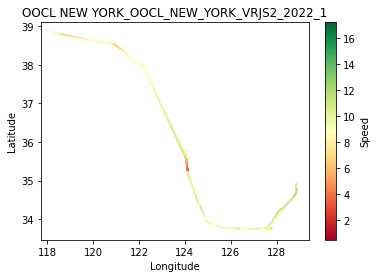

보간법 전 일반 평균 속도 : 9.433653846153845
보간법 전 일반 속도 표준편차: 1.577918659655788
보간법 전 저속 제거 평균 속도 : 9.433653846153845
보간법 전 저속 제거 속도 표준편차: 1.577918659655788
-
보간법 후 일반 평균 속도 : 9.055640593787365
보간법 후 일반 속도 표준편차: 1.5060267546189285
보간법 후 저속 제거 평균 속도 : 9.055640593787365
보간법 후 저속 제거 속도 표준편차: 1.5060267546189285


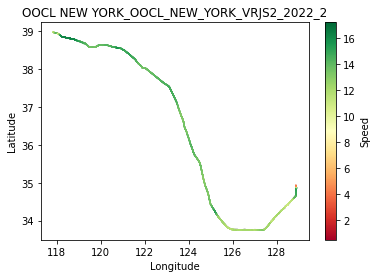

보간법 전 일반 평균 속도 : 13.148247978436657
보간법 전 일반 속도 표준편차: 1.421016686831533
보간법 전 저속 제거 평균 속도 : 13.148247978436657
보간법 전 저속 제거 속도 표준편차: 1.421016686831533
-
보간법 후 일반 평균 속도 : 13.338561397420184
보간법 후 일반 속도 표준편차: 1.297581838906322
보간법 후 저속 제거 평균 속도 : 13.338561397420184
보간법 후 저속 제거 속도 표준편차: 1.297581838906322


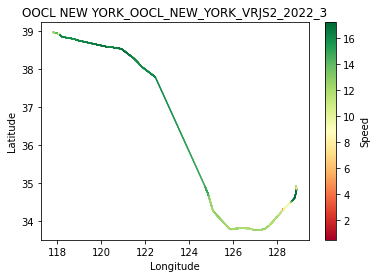

보간법 전 일반 평균 속도 : 12.789285714285715
보간법 전 일반 속도 표준편차: 2.479073208239914
보간법 전 저속 제거 평균 속도 : 12.789285714285715
보간법 전 저속 제거 속도 표준편차: 2.479073208239914
-
보간법 후 일반 평균 속도 : 13.859898151289153
보간법 후 일반 속도 표준편차: 2.9169058866671738
보간법 후 저속 제거 평균 속도 : 13.859898151289153
보간법 후 저속 제거 속도 표준편차: 2.9169058866671738


In [57]:
max_speed_list = []
min_speed_list = []
for i in OOCL_NEW_YORK_voyages_list:
    df = pd.read_csv(upper_china_path_dir + i + ".csv")
    data = df
    min_speed = data["speed"].min()
    max_speed = data["speed"].max()
    max_speed_list.append(max_speed)
    min_speed_list.append(min_speed)
min_speed = np.min(min_speed_list)
max_speed = np.max(max_speed_list)

norm = plt.Normalize(min_speed, max_speed)
cmap = plt.get_cmap('RdYlGn')
sm = plt.cm.ScalarMappable(cmap=cmap, norm=norm)
# Create a ScalarMappable with the colormap and normalization

mean_speed_dict = {"voyage" : [],"mean_speed" : []}

for i in OOCL_NEW_YORK_voyages_list:
    fig, ax = plt.subplots()
    
    df = pd.read_csv(upper_china_path_dir + i + ".csv")
    data = df
    # 3노트 이하 데이터 삭제
    data = data[data["speed"] >= 3]
    data.reset_index(inplace=True, drop=True)
    min_speed = data["speed"].min()
    max_speed = data["speed"].max()
    vessel_name = data["vessel_name"].values[0]
    voyage_name = i.split('processed')[0]
    speed_std = data["speed"].std()
    
    
    
    data['timestamp'] = pd.to_datetime(data['timestamp'])
    data['timestamp_seconds'] = (data['timestamp'] - pd.Timestamp("1970-01-01")) / pd.Timedelta(seconds=1)

    # Create a function that performs the interpolation
    interp_longitude = interpolate.interp1d(data['timestamp_seconds'], data['longitude'])
    interp_latitude = interpolate.interp1d(data['timestamp_seconds'], data['latitude'])
    interp_speed = interpolate.interp1d(data['timestamp_seconds'], data['speed'])

    # Specify the range of new x values for the interpolation
    new_x = np.linspace(data['timestamp_seconds'].min(), data['timestamp_seconds'].max(), num=int(interpolation_number))

    # Use the interpolation function to estimate y values for the new x values
    interp_longitude_y = interp_longitude(new_x)
    interp_latitude_y = interp_latitude(new_x)
    interp_speed_y = interp_speed(new_x)
    # Create new DataFrame with the interpolated values
    interp_data = pd.DataFrame({'timestamp': new_x, 'longitude': interp_longitude_y, 'latitude': interp_latitude_y, 'speed': interp_speed_y})
#     i = i.split("processed")[0]
    interp_data.to_csv(upper_china_path_dir + 'interpolated/'+ f"interpolated_{i}_below_3knot_{interpolation_number}.csv", encoding="utf-8 sig", header=True, index=False)
    
    # plot the data
    sc = ax.scatter(interp_data['longitude'], interp_data['latitude'],c = interp_data['speed'], cmap = cmap, norm = norm, s=0.1)

#     Add axis labels
    ax.set_xlabel('Longitude')
    ax.set_ylabel('Latitude')
    ax.set_title(f"{vessel_name}_{voyage_name}")
    # Add a colorbar
    cbar = plt.colorbar(sc,label='Speed')

#         Show the plot
    plt.show()
        
    check = data["speed"].apply(lambda x : True if x < 3 else False)
    s = data.drop(data[check].index)["speed"]
    print(f"보간법 전 일반 평균 속도 : {data['speed'].mean()}")
    print(f"보간법 전 일반 속도 표준편차: {data['speed'].std()}")
    print(f"보간법 전 저속 제거 평균 속도 : {s.mean()}")
    print(f'보간법 전 저속 제거 속도 표준편차: {s.std()}')
    print('-')
    check = interp_data["speed"].apply(lambda x : True if x < 3 else False)
    s = interp_data.drop(interp_data[check].index)["speed"]
    print(f"보간법 후 일반 평균 속도 : {interp_data['speed'].mean()}")
    print(f"보간법 후 일반 속도 표준편차: {interp_data['speed'].std()}")
    print(f"보간법 후 저속 제거 평균 속도 : {s.mean()}")
    mean_speed_dict['voyage'].append(voyage_name)
    mean_speed_dict['mean_speed'].append(s.mean())
    print(f'보간법 후 저속 제거 속도 표준편차: {s.std()}')

In [58]:
mean_speed_df = pd.DataFrame(mean_speed_dict)
list(mean_speed_df[mean_speed_df["mean_speed"] < 14].voyage)

['OOCL_NEW_YORK_VRJS2_2022_1',
 'OOCL_NEW_YORK_VRJS2_2022_2',
 'OOCL_NEW_YORK_VRJS2_2022_3']

In [59]:
high_speed_path_data =[]
low_speed_path_data =[]
for i in OOCL_NEW_YORK_voyages_list:
    i = i.split("processed")[0]
    if i in list(mean_speed_df[mean_speed_df["mean_speed"] < 14].voyage):
        i = "interpolated/interpolated_" + i + f'processed_below_3knot_{interpolation_number}'
        df = pd.read_csv(upper_china_path_dir + i + ".csv")
        low_speed_path_data.append(df)
    elif i in list(mean_speed_df[mean_speed_df["mean_speed"] >= 14].voyage):
        i = "interpolated/interpolated_" + i + f'processed_below_3knot_{interpolation_number}'
        df = pd.read_csv(upper_china_path_dir + i + ".csv")
        high_speed_path_data.append(df)

In [60]:
all_data = pd.concat(low_speed_path_data)

# Add a new index column representing the row number
all_data['index'] = range(len(all_data))
all_data["index"] = all_data.index
concaternated_df = all_data.groupby('index').mean()
concaternated_df.to_csv(f"실험/upper_china_{vessel_name}_low_speed_below_3_knot_{interpolation_number}_concaternated_df.csv", encoding="utf-8 sig",header=True, index=False)

## below 3 knot 제거

In [61]:
interpolation_number = "11000"

### interpolation 11000

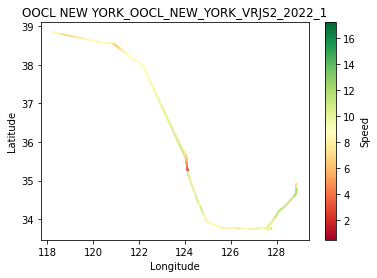

보간법 전 일반 평균 속도 : 9.433653846153845
보간법 전 일반 속도 표준편차: 1.577918659655788
보간법 전 저속 제거 평균 속도 : 9.433653846153845
보간법 전 저속 제거 속도 표준편차: 1.577918659655788
-
보간법 후 일반 평균 속도 : 9.055653098868016
보간법 후 일반 속도 표준편차: 1.5060084256447488
보간법 후 저속 제거 평균 속도 : 9.055653098868016
보간법 후 저속 제거 속도 표준편차: 1.5060084256447488


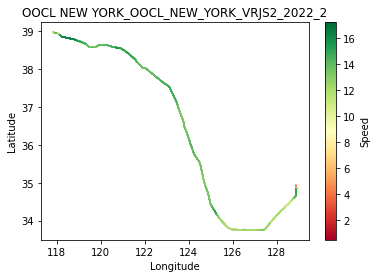

보간법 전 일반 평균 속도 : 13.148247978436657
보간법 전 일반 속도 표준편차: 1.421016686831533
보간법 전 저속 제거 평균 속도 : 13.148247978436657
보간법 전 저속 제거 속도 표준편차: 1.421016686831533
-
보간법 후 일반 평균 속도 : 13.338608499799262
보간법 후 일반 속도 표준편차: 1.2974386358524308
보간법 후 저속 제거 평균 속도 : 13.338608499799262
보간법 후 저속 제거 속도 표준편차: 1.2974386358524308


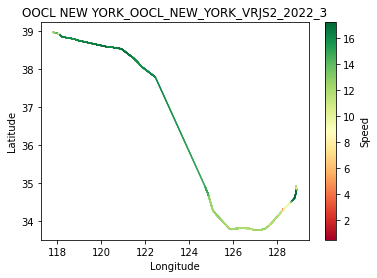

보간법 전 일반 평균 속도 : 12.789285714285715
보간법 전 일반 속도 표준편차: 2.479073208239914
보간법 전 저속 제거 평균 속도 : 12.789285714285715
보간법 전 저속 제거 속도 표준편차: 2.479073208239914
-
보간법 후 일반 평균 속도 : 13.859918342752515
보간법 후 일반 속도 표준편차: 2.916899650751766
보간법 후 저속 제거 평균 속도 : 13.859918342752515
보간법 후 저속 제거 속도 표준편차: 2.916899650751766


In [62]:
max_speed_list = []
min_speed_list = []
for i in OOCL_NEW_YORK_voyages_list:
    df = pd.read_csv(upper_china_path_dir + i + ".csv")
    data = df
    min_speed = data["speed"].min()
    max_speed = data["speed"].max()
    max_speed_list.append(max_speed)
    min_speed_list.append(min_speed)
min_speed = np.min(min_speed_list)
max_speed = np.max(max_speed_list)

norm = plt.Normalize(min_speed, max_speed)
cmap = plt.get_cmap('RdYlGn')
sm = plt.cm.ScalarMappable(cmap=cmap, norm=norm)
# Create a ScalarMappable with the colormap and normalization

mean_speed_dict = {"voyage" : [],"mean_speed" : []}

for i in OOCL_NEW_YORK_voyages_list:
    fig, ax = plt.subplots()
    
    df = pd.read_csv(upper_china_path_dir + i + ".csv")
    data = df
    # 3노트 이하 데이터 삭제
    data = data[data["speed"] >= 3]
    data.reset_index(inplace=True, drop=True)
    min_speed = data["speed"].min()
    max_speed = data["speed"].max()
    vessel_name = data["vessel_name"].values[0]
    voyage_name = i.split('processed')[0]
    speed_std = data["speed"].std()
    
    
    
    data['timestamp'] = pd.to_datetime(data['timestamp'])
    data['timestamp_seconds'] = (data['timestamp'] - pd.Timestamp("1970-01-01")) / pd.Timedelta(seconds=1)

    # Create a function that performs the interpolation
    interp_longitude = interpolate.interp1d(data['timestamp_seconds'], data['longitude'])
    interp_latitude = interpolate.interp1d(data['timestamp_seconds'], data['latitude'])
    interp_speed = interpolate.interp1d(data['timestamp_seconds'], data['speed'])

    # Specify the range of new x values for the interpolation
    new_x = np.linspace(data['timestamp_seconds'].min(), data['timestamp_seconds'].max(), num=int(interpolation_number))

    # Use the interpolation function to estimate y values for the new x values
    interp_longitude_y = interp_longitude(new_x)
    interp_latitude_y = interp_latitude(new_x)
    interp_speed_y = interp_speed(new_x)
    # Create new DataFrame with the interpolated values
    interp_data = pd.DataFrame({'timestamp': new_x, 'longitude': interp_longitude_y, 'latitude': interp_latitude_y, 'speed': interp_speed_y})
#     i = i.split("processed")[0]
    interp_data.to_csv(upper_china_path_dir + 'interpolated/'+ f"interpolated_{i}_below_3knot_{interpolation_number}.csv", encoding="utf-8 sig", header=True, index=False)
    
    # plot the data
    sc = ax.scatter(interp_data['longitude'], interp_data['latitude'],c = interp_data['speed'], cmap = cmap, norm = norm, s=0.1)

#     Add axis labels
    ax.set_xlabel('Longitude')
    ax.set_ylabel('Latitude')
    ax.set_title(f"{vessel_name}_{voyage_name}")
    # Add a colorbar
    cbar = plt.colorbar(sc,label='Speed')

#         Show the plot
    plt.show()
        
    check = data["speed"].apply(lambda x : True if x < 3 else False)
    s = data.drop(data[check].index)["speed"]
    print(f"보간법 전 일반 평균 속도 : {data['speed'].mean()}")
    print(f"보간법 전 일반 속도 표준편차: {data['speed'].std()}")
    print(f"보간법 전 저속 제거 평균 속도 : {s.mean()}")
    print(f'보간법 전 저속 제거 속도 표준편차: {s.std()}')
    print('-')
    check = interp_data["speed"].apply(lambda x : True if x < 3 else False)
    s = interp_data.drop(interp_data[check].index)["speed"]
    print(f"보간법 후 일반 평균 속도 : {interp_data['speed'].mean()}")
    print(f"보간법 후 일반 속도 표준편차: {interp_data['speed'].std()}")
    print(f"보간법 후 저속 제거 평균 속도 : {s.mean()}")
    mean_speed_dict['voyage'].append(voyage_name)
    mean_speed_dict['mean_speed'].append(s.mean())
    print(f'보간법 후 저속 제거 속도 표준편차: {s.std()}')

In [63]:
mean_speed_df = pd.DataFrame(mean_speed_dict)
list(mean_speed_df[mean_speed_df["mean_speed"] < 14].voyage)

['OOCL_NEW_YORK_VRJS2_2022_1',
 'OOCL_NEW_YORK_VRJS2_2022_2',
 'OOCL_NEW_YORK_VRJS2_2022_3']

In [64]:
high_speed_path_data =[]
low_speed_path_data =[]
for i in OOCL_NEW_YORK_voyages_list:
    i = i.split("processed")[0]
    if i in list(mean_speed_df[mean_speed_df["mean_speed"] < 14].voyage):
        i = "interpolated/interpolated_" + i + f'processed_below_3knot_{interpolation_number}'
        df = pd.read_csv(upper_china_path_dir + i + ".csv")
        low_speed_path_data.append(df)
    elif i in list(mean_speed_df[mean_speed_df["mean_speed"] >= 14].voyage):
        i = "interpolated/interpolated_" + i + f'processed_below_3knot_{interpolation_number}'
        df = pd.read_csv(upper_china_path_dir + i + ".csv")
        high_speed_path_data.append(df)

In [65]:
all_data = pd.concat(low_speed_path_data)

# Add a new index column representing the row number
all_data['index'] = range(len(all_data))
all_data["index"] = all_data.index
concaternated_df = all_data.groupby('index').mean()
concaternated_df.to_csv(f"실험/upper_china_{vessel_name}_low_speed_below_3_knot_{interpolation_number}_concaternated_df.csv", encoding="utf-8 sig",header=True, index=False)

## below 3 knot 제거

In [66]:
interpolation_number = "12000"

### interpolation 12000

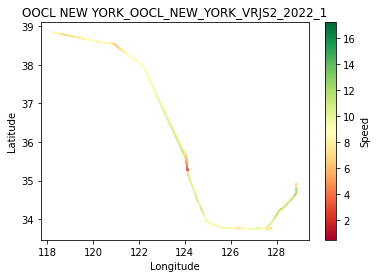

보간법 전 일반 평균 속도 : 9.433653846153845
보간법 전 일반 속도 표준편차: 1.577918659655788
보간법 전 저속 제거 평균 속도 : 9.433653846153845
보간법 전 저속 제거 속도 표준편차: 1.577918659655788
-
보간법 후 일반 평균 속도 : 9.055660669757376
보간법 후 일반 속도 표준편차: 1.50599649786788
보간법 후 저속 제거 평균 속도 : 9.055660669757376
보간법 후 저속 제거 속도 표준편차: 1.50599649786788


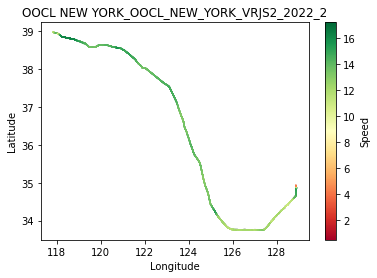

보간법 전 일반 평균 속도 : 13.148247978436657
보간법 전 일반 속도 표준편차: 1.421016686831533
보간법 전 저속 제거 평균 속도 : 13.148247978436657
보간법 전 저속 제거 속도 표준편차: 1.421016686831533
-
보간법 후 일반 평균 속도 : 13.338651461660888
보간법 후 일반 속도 표준편차: 1.2973025990553133
보간법 후 저속 제거 평균 속도 : 13.338651461660888
보간법 후 저속 제거 속도 표준편차: 1.2973025990553133


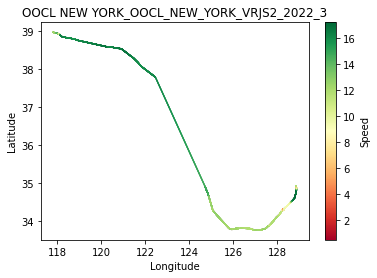

보간법 전 일반 평균 속도 : 12.789285714285715
보간법 전 일반 속도 표준편차: 2.479073208239914
보간법 전 저속 제거 평균 속도 : 12.789285714285715
보간법 전 저속 제거 속도 표준편차: 2.479073208239914
-
보간법 후 일반 평균 속도 : 13.859932111114835
보간법 후 일반 속도 표준편차: 2.916896101285841
보간법 후 저속 제거 평균 속도 : 13.859932111114835
보간법 후 저속 제거 속도 표준편차: 2.916896101285841


In [67]:
max_speed_list = []
min_speed_list = []
for i in OOCL_NEW_YORK_voyages_list:
    df = pd.read_csv(upper_china_path_dir + i + ".csv")
    data = df
    min_speed = data["speed"].min()
    max_speed = data["speed"].max()
    max_speed_list.append(max_speed)
    min_speed_list.append(min_speed)
min_speed = np.min(min_speed_list)
max_speed = np.max(max_speed_list)

norm = plt.Normalize(min_speed, max_speed)
cmap = plt.get_cmap('RdYlGn')
sm = plt.cm.ScalarMappable(cmap=cmap, norm=norm)
# Create a ScalarMappable with the colormap and normalization

mean_speed_dict = {"voyage" : [],"mean_speed" : []}

for i in OOCL_NEW_YORK_voyages_list:
    fig, ax = plt.subplots()
    
    df = pd.read_csv(upper_china_path_dir + i + ".csv")
    data = df
    # 3노트 이하 데이터 삭제
    data = data[data["speed"] >= 3]
    data.reset_index(inplace=True, drop=True)
    min_speed = data["speed"].min()
    max_speed = data["speed"].max()
    vessel_name = data["vessel_name"].values[0]
    voyage_name = i.split('processed')[0]
    speed_std = data["speed"].std()
    
    
    
    data['timestamp'] = pd.to_datetime(data['timestamp'])
    data['timestamp_seconds'] = (data['timestamp'] - pd.Timestamp("1970-01-01")) / pd.Timedelta(seconds=1)

    # Create a function that performs the interpolation
    interp_longitude = interpolate.interp1d(data['timestamp_seconds'], data['longitude'])
    interp_latitude = interpolate.interp1d(data['timestamp_seconds'], data['latitude'])
    interp_speed = interpolate.interp1d(data['timestamp_seconds'], data['speed'])

    # Specify the range of new x values for the interpolation
    new_x = np.linspace(data['timestamp_seconds'].min(), data['timestamp_seconds'].max(), num=int(interpolation_number))

    # Use the interpolation function to estimate y values for the new x values
    interp_longitude_y = interp_longitude(new_x)
    interp_latitude_y = interp_latitude(new_x)
    interp_speed_y = interp_speed(new_x)
    # Create new DataFrame with the interpolated values
    interp_data = pd.DataFrame({'timestamp': new_x, 'longitude': interp_longitude_y, 'latitude': interp_latitude_y, 'speed': interp_speed_y})
#     i = i.split("processed")[0]
    interp_data.to_csv(upper_china_path_dir + 'interpolated/'+ f"interpolated_{i}_below_3knot_{interpolation_number}.csv", encoding="utf-8 sig", header=True, index=False)
    
    # plot the data
    sc = ax.scatter(interp_data['longitude'], interp_data['latitude'],c = interp_data['speed'], cmap = cmap, norm = norm, s=0.1)

#     Add axis labels
    ax.set_xlabel('Longitude')
    ax.set_ylabel('Latitude')
    ax.set_title(f"{vessel_name}_{voyage_name}")
    # Add a colorbar
    cbar = plt.colorbar(sc,label='Speed')

#         Show the plot
    plt.show()
        
    check = data["speed"].apply(lambda x : True if x < 3 else False)
    s = data.drop(data[check].index)["speed"]
    print(f"보간법 전 일반 평균 속도 : {data['speed'].mean()}")
    print(f"보간법 전 일반 속도 표준편차: {data['speed'].std()}")
    print(f"보간법 전 저속 제거 평균 속도 : {s.mean()}")
    print(f'보간법 전 저속 제거 속도 표준편차: {s.std()}')
    print('-')
    check = interp_data["speed"].apply(lambda x : True if x < 3 else False)
    s = interp_data.drop(interp_data[check].index)["speed"]
    print(f"보간법 후 일반 평균 속도 : {interp_data['speed'].mean()}")
    print(f"보간법 후 일반 속도 표준편차: {interp_data['speed'].std()}")
    print(f"보간법 후 저속 제거 평균 속도 : {s.mean()}")
    mean_speed_dict['voyage'].append(voyage_name)
    mean_speed_dict['mean_speed'].append(s.mean())
    print(f'보간법 후 저속 제거 속도 표준편차: {s.std()}')

In [68]:
mean_speed_df = pd.DataFrame(mean_speed_dict)
list(mean_speed_df[mean_speed_df["mean_speed"] < 14].voyage)

['OOCL_NEW_YORK_VRJS2_2022_1',
 'OOCL_NEW_YORK_VRJS2_2022_2',
 'OOCL_NEW_YORK_VRJS2_2022_3']

In [69]:
high_speed_path_data =[]
low_speed_path_data =[]
for i in OOCL_NEW_YORK_voyages_list:
    i = i.split("processed")[0]
    if i in list(mean_speed_df[mean_speed_df["mean_speed"] < 14].voyage):
        i = "interpolated/interpolated_" + i + f'processed_below_3knot_{interpolation_number}'
        df = pd.read_csv(upper_china_path_dir + i + ".csv")
        low_speed_path_data.append(df)
    elif i in list(mean_speed_df[mean_speed_df["mean_speed"] >= 14].voyage):
        i = "interpolated/interpolated_" + i + f'processed_below_3knot_{interpolation_number}'
        df = pd.read_csv(upper_china_path_dir + i + ".csv")
        high_speed_path_data.append(df)

In [70]:
all_data = pd.concat(low_speed_path_data)

# Add a new index column representing the row number
all_data['index'] = range(len(all_data))
all_data["index"] = all_data.index
concaternated_df = all_data.groupby('index').mean()
concaternated_df.to_csv(f"실험/upper_china_{vessel_name}_low_speed_below_3_knot_{interpolation_number}_concaternated_df.csv", encoding="utf-8 sig",header=True, index=False)

In [71]:
# all_data = pd.concat(high_speed_path_data)

# # Add a new index column representing the row number
# all_data['index'] = range(len(all_data))
# all_data["index"] = all_data.index
# concaternated_df = all_data.groupby('index').mean()
# concaternated_df.to_csv(f"실험/upper_china_cosco_fos_high_speed_below_3_knot_{interpolation_number}_concaternated_df.csv", encoding="utf-8 sig",header=True, index=False)

In [72]:
result_df_dict=  {
    "experiment_no" : [],
    "mean_speed" : [],
    "max_speed" : []
}

# ETA 실험 (interpolation 1000), AKA BHUM 7항차 저속

In [73]:
interpolation_number = 1000

In [74]:
low_speed_interpolated_df = pd.read_csv(f"실험/upper_china_{vessel_name}_low_speed_below_3_knot_{interpolation_number}_concaternated_df.csv")
low_speed_interpolated_df

,timestamp,longitude,latitude,speed
0,1.667818e+09,117.963300,38.925933,11.000000
1,1.667819e+09,117.991588,38.921932,11.168559
2,1.667819e+09,118.019457,38.917979,11.188179
3,1.667819e+09,118.046738,38.914094,10.999106
4,1.667819e+09,118.074019,38.910210,10.810033
...,...,...,...,...
995,1.668137e+09,128.871897,34.867470,8.797255
996,1.668137e+09,128.869902,34.881222,8.912767
997,1.668138e+09,128.866995,34.894310,8.503413
998,1.668138e+09,128.862612,34.908987,7.941449


In [75]:
test_df_26 = pd.read_csv("voy_path/upper_china/processed/OOCL_NEW_YORK_VRJS2_2022_2processed.csv")
test_df_26['timestamp'] = pd.to_datetime(test_df_26['timestamp'])
test_df_26['timestamp'] = pd.to_datetime(test_df_26['timestamp'])
test_df_26['time_voyage_data_received'] = pd.to_datetime(test_df_26['time_voyage_data_received'])
test_df_26.drop('index', axis=1, inplace=True)
test_df_26 = test_df_26.loc[test_df_26[['longitude','latitude','timestamp']].drop_duplicates().index]
test_df_26.reset_index(inplace=True, drop=True)

## 저속 (7knot 미만 제거)

### segment

In [76]:
seg_length = int(len(low_speed_interpolated_df) / the_number_of_segment)

In [77]:
low_speed_df_list = []
for i in range(the_number_of_segment):
    idx = seg_length * (i + 1)
    if i == 0:
        df = low_speed_interpolated_df.loc[0:idx - 1]
        df.reset_index(inplace=True)
    else:
        df = low_speed_interpolated_df.loc[idx - seg_length:idx - 1]
        df.reset_index(inplace=True)
    low_speed_df_list.append(df)

In [78]:
for df in low_speed_df_list:
    d = df["speed"].mean()
    print(d)

11.05681485797913
10.884729724880742
11.96980459171289
13.32919256385927
13.351901180120922
13.512302367920526
13.330312286025299
13.036190367149805
12.658578786734328
12.410543853763036
12.462841738297236
12.883041765539684
13.022186597475471
13.121276019876063
13.033375405278601
13.03800316748893
13.084151659674223
13.323121878928848
13.651996436824305
13.515870694423702
13.449672657223164
13.37627319687959
13.307462556490188
13.215797776755128
13.10118676566369
13.015243981458008
12.985333244651397
13.026217205643068
13.093734121372885
13.151915643499573
13.209604009073221
13.267292374647894
13.324980740222117
13.38110843092544
13.406246544718309
13.483865111968981
13.486840205231772
13.484356363697305
13.480705058889729
13.339830443568038
13.228409280459601
13.116644075418197
13.112291374489288
13.159968678457162
13.261097720108856
13.253972657646736
13.29072293945346
13.39983209378843
13.504118441333034
13.515827818019684
13.36288037090516
13.231153983740068
13.023728597725333
12.

### segment로 평균 속도 적용 ETA 계산

#### 3. 순간 속력 이용 + 알고리즘 x  +  감속 계수 x

In [79]:
test_df_26 = pd.read_csv("voy_path/upper_china/processed/OOCL_NEW_YORK_VRJS2_2022_2processed.csv")
test_df_26['timestamp'] = pd.to_datetime(test_df_26['timestamp'])
test_df_26['timestamp'] = pd.to_datetime(test_df_26['timestamp'])
test_df_26['time_voyage_data_received'] = pd.to_datetime(test_df_26['time_voyage_data_received'])
test_df_26.drop('index', axis=1, inplace=True)
test_df_26 = test_df_26.loc[test_df_26[['longitude','latitude','timestamp']].drop_duplicates().index]
test_df_26.reset_index(inplace=True, drop=True)

In [80]:
for col in test_df_26.index:
    if col == test_df_26.index[-8]:
        break
    # 테스트 데이터
    re_sample = test_df_26.loc[col,:]
    longitude = re_sample["longitude"]
    latitude = re_sample["latitude"]
    current_point = (latitude, longitude)
    
    # 1. 순간 속력 (AIS) 
    current_speed = re_sample["speed"]
    current_position_timestamp = re_sample["timestamp"]
    if current_speed < 7:
        continue
    # 현재 위치에서 가장 짧은 segment 찾기
    shortest_distance = 9999
    for seg_no, seg_df in enumerate(low_speed_df_list):
        for idx in seg_df.index:
            LONGITUDE = seg_df.loc[idx, "longitude"]
            LATITUDE = seg_df.loc[idx, "latitude"]

            ais_point = (LATITUDE, LONGITUDE)
            distance = haversine(current_point, ais_point, unit="km")
            # 가장 짧은 segment 간의 거리, segment 번호, 인덱스 저장
            if distance <= shortest_distance:
                shortest_distance = distance 
                shortest_point_idx = seg_df.loc[idx, "index"]
                shortest_seg_no = seg_no
                
    # 다음 인덱스
#     optimal_point_idx = optimal_next_point(current_point, shortest_point_idx, shortest_distance, low_speed_interpolated_df)
    optimal_point_idx = low_speed_interpolated_df.query(f'index == {shortest_point_idx}').index[0] + 1
    lon_optimal = low_speed_interpolated_df.loc[optimal_point_idx, "longitude"]
    lat_optimal = low_speed_interpolated_df.loc[optimal_point_idx, "latitude"]
    
    optimal_point = (lat_optimal, lon_optimal)
    optimal_distance = haversine(current_point, optimal_point, unit="km")
    km_h = current_speed * 1.852
    init_duration = cal_duration(km_h, optimal_distance)
    
    
    # 가장 가까운 segment 찾기
    
    optimal_seg_no = find_segment_no(optimal_point_idx, low_speed_interpolated_df,the_number_of_segment)
    if optimal_seg_no == the_number_of_segment:
        continue
    initial_seg_df = low_speed_df_list[optimal_seg_no]
    # speed_damping_ratio는 각 segment에 맞게
#     speed_damping_ratio = current_speed / initial_seg_df["speed"].mean()
    speed_damping_ratio = 1
    km_h = current_speed * 1.852 * speed_damping_ratio
    
    
    remaining_initial_seg_df = initial_seg_df.loc[optimal_point_idx:,:]
    remaining_initial_seg_df.reset_index(inplace=True, drop=True)
    accu_distance = 0
    for idx in remaining_initial_seg_df.index:
        if idx != 0:
            LONGITUDE = remaining_initial_seg_df.loc[idx, "longitude"]
            LATITUDE = remaining_initial_seg_df.loc[idx, "latitude"]
            current_coord = (LATITUDE, LONGITUDE)

            LONGITUDE = remaining_initial_seg_df.loc[idx - 1, "longitude"]
            LATITUDE = remaining_initial_seg_df.loc[idx - 1, "latitude"]
            previous_current_coord = (LATITUDE, LONGITUDE)
            
            accu_distance += haversine(current_coord, previous_current_coord, unit="km")
            
    duration_0 = cal_duration(km_h, accu_distance)
    duration_0 = duration_0 + init_duration
    
    
        
    dura_list = []  
    for next_seg_no in range(optimal_seg_no + 1, the_number_of_segment):
        next_seg_df = low_speed_df_list[next_seg_no]
        
        seg_mean_speed = next_seg_df['speed'].mean()
#         speed_damping_ratio = current_speed / seg_mean_speed
        speed_damping_ratio = 1
        damped_mean_speed = seg_mean_speed * speed_damping_ratio
        km_h = damped_mean_speed * 1.852
        distance = reckon_point_lengths(next_seg_df)
        dura_list.append(cal_duration(km_h, distance))
    
    accu_timedelta = datetime.timedelta(seconds=0)
    for i in dura_list:
        accu_timedelta += i
    # 현재 시간 + duration = ETA
    ETA = current_position_timestamp + accu_timedelta
    test_df_26.loc[col,'ETA'] = ETA
    optimal_seg_no = 0

test_df_26['ATA'] = test_df_26.loc[test_df_26.index[-1],"timestamp"]
test_df_26['error'] = abs(test_df_26['ATA'] - test_df_26['ETA'])

experiment_no = f"4.1.2.3_{interpolation_number}_{vessel_name}".replace(".","_")
result_df_dict['experiment_no'].append(experiment_no)
result_df_dict['mean_speed'].append(test_df_26.loc[test_df_26.index[:-20]]["error"].mean())
result_df_dict['max_speed'].append(test_df_26.loc[test_df_26.index[:-20]]["error"].max())

globals()[f"exp_result_df_{experiment_no}"] = test_df_26

In [81]:
print("최대:", test_df_26.loc[test_df_26.index[:-20]]["error"].max())
print("평균:", test_df_26.loc[test_df_26.index[:-20]]["error"].mean())

최대: 0 days 03:05:41.456115
평균: 0 days 01:11:30.890728524


In [82]:
test_df_26.loc[test_df_26['error'].dropna(axis=0).index].sort_values(by="error")

,vessel_name,mmsi,imo,CAPACITY,destination,eta,longitude,latitude,speed,heading,timestamp,time_position_data_received,time_voyage_data_received,navigation_info,remained_distance,estimated_fuel_consumption,ETA,ATA,error
167,OOCL NEW YORK,477274700,9198109.0,5770,KRBNP,11110200,124.6879,35.0561,12.8,160.0,2022-11-10 13:28:08.033860,2022-11-10 04:26:34,2022-11-09 10:19:51,under way using engine,376.361914,659.625489,2022-11-11 12:27:58.274113,2022-11-11 12:29:16.869978,0 days 00:01:18.595865
166,OOCL NEW YORK,477274700,9198109.0,5770,KRBNP,11110200,124.6805,35.0721,12.8,160.0,2022-11-10 13:23:05.823758,2022-11-10 04:21:43,2022-11-09 10:19:51,under way using engine,377.048157,660.828225,2022-11-11 12:22:56.064011,2022-11-11 12:29:16.869978,0 days 00:06:20.805967
362,OOCL NEW YORK,477274700,9198109.0,5770,KRBNP,11110345,128.8737,34.7153,14.8,4.0,2022-11-11 11:23:40.010251,2022-11-11 02:23:06,2022-11-11 02:07:50,under way using engine,28.707052,55.640287,2022-11-11 12:13:59.321700,2022-11-11 12:29:16.869978,0 days 00:15:17.548278
169,OOCL NEW YORK,477274700,9198109.0,5770,KRBNP,11110200,124.7015,35.0265,13.0,160.0,2022-11-10 13:38:13.802539,2022-11-10 04:35:24,2022-11-09 10:19:51,under way using engine,375.121960,663.073928,2022-11-11 12:12:21.132727,2022-11-11 12:29:16.869978,0 days 00:16:55.737251
164,OOCL NEW YORK,477274700,9198109.0,5770,KRBNP,11110200,124.5246,35.4843,13.3,155.0,2022-11-10 11:26:59.815618,2022-11-10 02:22:45,2022-11-09 10:19:51,under way using engine,394.253762,706.370624,2022-11-11 12:11:31.180710,2022-11-11 12:29:16.869978,0 days 00:17:45.689268
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
48,OOCL NEW YORK,477274700,9198109.0,5770,KRBNP,11110330,120.0126,38.6243,13.8,100.0,2022-11-09 13:34:41.354647,2022-11-09 04:29:23,2022-11-09 04:31:53,under way using engine,882.653791,1620.341673,2022-11-11 09:55:25.028723,2022-11-11 12:29:16.869978,0 days 02:33:51.841255
51,OOCL NEW YORK,477274700,9198109.0,5770,KRBNP,11110330,120.1953,38.6230,14.1,89.0,2022-11-09 14:10:01.201102,2022-11-09 05:06:43.000000,2022-11-09 04:56:02,under way using engine,868.204942,1618.809968,2022-11-11 09:51:34.504653,2022-11-11 12:29:16.869978,0 days 02:37:42.365325
43,OOCL NEW YORK,477274700,9198109.0,5770,KRBNP,11110330,119.8076,38.5893,13.6,71.0,2022-11-09 12:49:15.752153,2022-11-09 03:44:35.000000,2022-11-09 03:31:54,under way using engine,897.289168,1630.850982,2022-11-11 09:48:49.984020,2022-11-11 12:29:16.869978,0 days 02:40:26.885958
42,OOCL NEW YORK,477274700,9198109.0,5770,KRBNP,11110330,119.7350,38.5791,13.5,87.0,2022-11-09 12:34:07.211827,2022-11-09 03:28:57,2022-11-09 03:31:54,under way using engine,902.608812,1632.557475,2022-11-11 09:33:41.443694,2022-11-11 12:29:16.869978,0 days 02:55:35.426284


## 저속 (7knot 미만 포함)

### segment로 평균 속도 적용 ETA 계산

#### 3. 순간 속력 이용 + 알고리즘 x  +  감속 계수 x

In [83]:
test_df_26 = pd.read_csv("voy_path/upper_china/processed/OOCL_NEW_YORK_VRJS2_2022_2processed.csv")
test_df_26['timestamp'] = pd.to_datetime(test_df_26['timestamp'])
test_df_26['timestamp'] = pd.to_datetime(test_df_26['timestamp'])
test_df_26['time_voyage_data_received'] = pd.to_datetime(test_df_26['time_voyage_data_received'])
test_df_26.drop('index', axis=1, inplace=True)
test_df_26 = test_df_26.loc[test_df_26[['longitude','latitude','timestamp']].drop_duplicates().index]
test_df_26.reset_index(inplace=True, drop=True)

In [84]:
for col in test_df_26.index:
    if col == test_df_26.index[-8]:
        break
    # 테스트 데이터
    re_sample = test_df_26.loc[col,:]
    longitude = re_sample["longitude"]
    latitude = re_sample["latitude"]
    current_point = (latitude, longitude)
    
    # 1. 순간 속력 (AIS) 
    current_speed = re_sample["speed"]
    current_position_timestamp = re_sample["timestamp"]
#     if current_speed < 7:
#         continue
    # 현재 위치에서 가장 짧은 segment 찾기
    shortest_distance = 9999
    for seg_no, seg_df in enumerate(low_speed_df_list):
        for idx in seg_df.index:
            LONGITUDE = seg_df.loc[idx, "longitude"]
            LATITUDE = seg_df.loc[idx, "latitude"]

            ais_point = (LATITUDE, LONGITUDE)
            distance = haversine(current_point, ais_point, unit="km")
            # 가장 짧은 segment 간의 거리, segment 번호, 인덱스 저장
            if distance <= shortest_distance:
                shortest_distance = distance 
                shortest_point_idx = seg_df.loc[idx, "index"]
                shortest_seg_no = seg_no
                
    # 다음 인덱스
#     optimal_point_idx = optimal_next_point(current_point, shortest_point_idx, shortest_distance, low_speed_interpolated_df)
    optimal_point_idx = low_speed_interpolated_df.query(f'index == {shortest_point_idx}').index[0] + 1
    lon_optimal = low_speed_interpolated_df.loc[optimal_point_idx, "longitude"]
    lat_optimal = low_speed_interpolated_df.loc[optimal_point_idx, "latitude"]
    
    optimal_point = (lat_optimal, lon_optimal)
    optimal_distance = haversine(current_point, optimal_point, unit="km")
    km_h = current_speed * 1.852
    init_duration = cal_duration(km_h, optimal_distance)
    
    
    # 가장 가까운 segment 찾기
    
    optimal_seg_no = find_segment_no(optimal_point_idx, low_speed_interpolated_df,the_number_of_segment)
    if optimal_seg_no == the_number_of_segment:
        continue
    initial_seg_df = low_speed_df_list[optimal_seg_no]
    # speed_damping_ratio는 각 segment에 맞게
#     speed_damping_ratio = current_speed / initial_seg_df["speed"].mean()
    speed_damping_ratio = 1
    km_h = current_speed * 1.852 * speed_damping_ratio
    
    
    remaining_initial_seg_df = initial_seg_df.loc[optimal_point_idx:,:]
    remaining_initial_seg_df.reset_index(inplace=True, drop=True)
    accu_distance = 0
    for idx in remaining_initial_seg_df.index:
        if idx != 0:
            LONGITUDE = remaining_initial_seg_df.loc[idx, "longitude"]
            LATITUDE = remaining_initial_seg_df.loc[idx, "latitude"]
            current_coord = (LATITUDE, LONGITUDE)

            LONGITUDE = remaining_initial_seg_df.loc[idx - 1, "longitude"]
            LATITUDE = remaining_initial_seg_df.loc[idx - 1, "latitude"]
            previous_current_coord = (LATITUDE, LONGITUDE)
            
            accu_distance += haversine(current_coord, previous_current_coord, unit="km")
            
    duration_0 = cal_duration(km_h, accu_distance)
    duration_0 = duration_0 + init_duration
    
    
        
    dura_list = []  
    for next_seg_no in range(optimal_seg_no + 1, the_number_of_segment):
        next_seg_df = low_speed_df_list[next_seg_no]
        
        seg_mean_speed = next_seg_df['speed'].mean()
#         speed_damping_ratio = current_speed / seg_mean_speed
        speed_damping_ratio = 1
        damped_mean_speed = seg_mean_speed * speed_damping_ratio
        km_h = damped_mean_speed * 1.852
        distance = reckon_point_lengths(next_seg_df)
        dura_list.append(cal_duration(km_h, distance))
    
    accu_timedelta = datetime.timedelta(seconds=0)
    for i in dura_list:
        accu_timedelta += i
    # 현재 시간 + duration = ETA
    ETA = current_position_timestamp + accu_timedelta
    test_df_26.loc[col,'ETA'] = ETA
    optimal_seg_no = 0

test_df_26['ATA'] = test_df_26.loc[test_df_26.index[-1],"timestamp"]
test_df_26['error'] = abs(test_df_26['ATA'] - test_df_26['ETA'])

experiment_no = f"4.2.1.3_{interpolation_number}_{vessel_name}".replace(".","_")
result_df_dict['experiment_no'].append(experiment_no)
result_df_dict['mean_speed'].append(test_df_26.loc[test_df_26.index[:-20]]["error"].mean())
result_df_dict['max_speed'].append(test_df_26.loc[test_df_26.index[:-20]]["error"].max())

globals()[f"exp_result_df_{experiment_no}"] = test_df_26

In [85]:
print("최대:", test_df_26.loc[test_df_26.index[:-20]]["error"].max())
print("평균:", test_df_26.loc[test_df_26.index[:-20]]["error"].mean())

최대: 0 days 03:05:41.456115
평균: 0 days 01:11:30.890728524


In [86]:
test_df_26.loc[test_df_26['error'].dropna(axis=0).index].sort_values(by="error")

,vessel_name,mmsi,imo,CAPACITY,destination,eta,longitude,latitude,speed,heading,timestamp,time_position_data_received,time_voyage_data_received,navigation_info,remained_distance,estimated_fuel_consumption,ETA,ATA,error
167,OOCL NEW YORK,477274700,9198109.0,5770,KRBNP,11110200,124.6879,35.0561,12.8,160.0,2022-11-10 13:28:08.033860,2022-11-10 04:26:34,2022-11-09 10:19:51,under way using engine,376.361914,659.625489,2022-11-11 12:27:58.274113,2022-11-11 12:29:16.869978,0 days 00:01:18.595865
166,OOCL NEW YORK,477274700,9198109.0,5770,KRBNP,11110200,124.6805,35.0721,12.8,160.0,2022-11-10 13:23:05.823758,2022-11-10 04:21:43,2022-11-09 10:19:51,under way using engine,377.048157,660.828225,2022-11-11 12:22:56.064011,2022-11-11 12:29:16.869978,0 days 00:06:20.805967
362,OOCL NEW YORK,477274700,9198109.0,5770,KRBNP,11110345,128.8737,34.7153,14.8,4.0,2022-11-11 11:23:40.010251,2022-11-11 02:23:06,2022-11-11 02:07:50,under way using engine,28.707052,55.640287,2022-11-11 12:13:59.321700,2022-11-11 12:29:16.869978,0 days 00:15:17.548278
169,OOCL NEW YORK,477274700,9198109.0,5770,KRBNP,11110200,124.7015,35.0265,13.0,160.0,2022-11-10 13:38:13.802539,2022-11-10 04:35:24,2022-11-09 10:19:51,under way using engine,375.121960,663.073928,2022-11-11 12:12:21.132727,2022-11-11 12:29:16.869978,0 days 00:16:55.737251
164,OOCL NEW YORK,477274700,9198109.0,5770,KRBNP,11110200,124.5246,35.4843,13.3,155.0,2022-11-10 11:26:59.815618,2022-11-10 02:22:45,2022-11-09 10:19:51,under way using engine,394.253762,706.370624,2022-11-11 12:11:31.180710,2022-11-11 12:29:16.869978,0 days 00:17:45.689268
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
48,OOCL NEW YORK,477274700,9198109.0,5770,KRBNP,11110330,120.0126,38.6243,13.8,100.0,2022-11-09 13:34:41.354647,2022-11-09 04:29:23,2022-11-09 04:31:53,under way using engine,882.653791,1620.341673,2022-11-11 09:55:25.028723,2022-11-11 12:29:16.869978,0 days 02:33:51.841255
51,OOCL NEW YORK,477274700,9198109.0,5770,KRBNP,11110330,120.1953,38.6230,14.1,89.0,2022-11-09 14:10:01.201102,2022-11-09 05:06:43.000000,2022-11-09 04:56:02,under way using engine,868.204942,1618.809968,2022-11-11 09:51:34.504653,2022-11-11 12:29:16.869978,0 days 02:37:42.365325
43,OOCL NEW YORK,477274700,9198109.0,5770,KRBNP,11110330,119.8076,38.5893,13.6,71.0,2022-11-09 12:49:15.752153,2022-11-09 03:44:35.000000,2022-11-09 03:31:54,under way using engine,897.289168,1630.850982,2022-11-11 09:48:49.984020,2022-11-11 12:29:16.869978,0 days 02:40:26.885958
42,OOCL NEW YORK,477274700,9198109.0,5770,KRBNP,11110330,119.7350,38.5791,13.5,87.0,2022-11-09 12:34:07.211827,2022-11-09 03:28:57,2022-11-09 03:31:54,under way using engine,902.608812,1632.557475,2022-11-11 09:33:41.443694,2022-11-11 12:29:16.869978,0 days 02:55:35.426284


# ETA 실험 (interpolation 2000), AKA BHUM 7항차 저속

In [87]:
interpolation_number = 2000

In [88]:
low_speed_interpolated_df = pd.read_csv(f"실험/upper_china_{vessel_name}_low_speed_below_3_knot_{interpolation_number}_concaternated_df.csv")
low_speed_interpolated_df

,timestamp,longitude,latitude,speed
0,1.667818e+09,117.963300,38.925933,11.000000
1,1.667818e+09,117.977437,38.923934,11.084237
2,1.667819e+09,117.991574,38.921934,11.168474
3,1.667819e+09,118.005711,38.919934,11.252711
4,1.667819e+09,118.019430,38.917983,11.188368
...,...,...,...,...
1995,1.668138e+09,128.866992,34.894323,8.503004
1996,1.668138e+09,128.865347,34.901075,8.261692
1997,1.668138e+09,128.862609,34.908995,7.941128
1998,1.668138e+09,128.859871,34.916914,7.620564


In [89]:
test_df_26 = pd.read_csv("voy_path/upper_china/processed/OOCL_NEW_YORK_VRJS2_2022_2processed.csv")
test_df_26['timestamp'] = pd.to_datetime(test_df_26['timestamp'])
test_df_26['timestamp'] = pd.to_datetime(test_df_26['timestamp'])
test_df_26['time_voyage_data_received'] = pd.to_datetime(test_df_26['time_voyage_data_received'])
test_df_26.drop('index', axis=1, inplace=True)
test_df_26 = test_df_26.loc[test_df_26[['longitude','latitude','timestamp']].drop_duplicates().index]
test_df_26.reset_index(inplace=True, drop=True)

## 저속 (7knot 미만 제거)

### segment

In [90]:
seg_length = int(len(low_speed_interpolated_df) / the_number_of_segment)

In [91]:
low_speed_df_list = []
for i in range(the_number_of_segment):
    idx = seg_length * (i + 1)
    if i == 0:
        df = low_speed_interpolated_df.loc[0:idx - 1]
        df.reset_index(inplace=True)
    else:
        df = low_speed_interpolated_df.loc[idx - seg_length:idx - 1]
        df.reset_index(inplace=True)
    low_speed_df_list.append(df)

In [92]:
for df in low_speed_df_list:
    d = df["speed"].mean()
    print(d)

11.080124690699986
10.837115594991397
12.05116254339965
13.329731097530493
13.355050841819686
13.512199421313863
13.32537522318473
13.03018204960846
12.64581754329949
12.40580778019306
12.471016295363729
12.887713690880869
13.023287449831267
13.123151283321226
13.0305755542033
13.039353652382099
13.08846507197191
13.325160919541593
13.656383090785118
13.514909939040422
13.447126335077382
13.376392518582392
13.305631369544619
13.215341702160817
13.098696692753762
13.015922921833056
12.984886350411546
13.026977696341254
13.094382013310085
13.152507245047627
13.210166752009371
13.267826258971137
13.32548576593438
13.381400668999873
13.406495388347036
13.484203871421801
13.48682343091426
13.4843408319214
13.480461898457056
13.340020522504691
13.227922868054858
13.115943989328079
13.112485065494434
13.161398438725382
13.261160899430333
13.254002767189636
13.290998560253636
13.39983488486919
13.504060752673857
13.515588711356752
13.3618853265672
13.231404163939885
13.023893255766286
12.88992

### segment로 평균 속도 적용 ETA 계산

#### 3. 순간 속력 이용 + 알고리즘 x  +  감속 계수 x

In [93]:
test_df_26 = pd.read_csv("voy_path/upper_china/processed/OOCL_NEW_YORK_VRJS2_2022_2processed.csv")
test_df_26['timestamp'] = pd.to_datetime(test_df_26['timestamp'])
test_df_26['timestamp'] = pd.to_datetime(test_df_26['timestamp'])
test_df_26['time_voyage_data_received'] = pd.to_datetime(test_df_26['time_voyage_data_received'])
test_df_26.drop('index', axis=1, inplace=True)
test_df_26 = test_df_26.loc[test_df_26[['longitude','latitude','timestamp']].drop_duplicates().index]
test_df_26.reset_index(inplace=True, drop=True)

In [94]:
for col in test_df_26.index:
    if col == test_df_26.index[-8]:
        break
    # 테스트 데이터
    re_sample = test_df_26.loc[col,:]
    longitude = re_sample["longitude"]
    latitude = re_sample["latitude"]
    current_point = (latitude, longitude)
    
    # 1. 순간 속력 (AIS) 
    current_speed = re_sample["speed"]
    current_position_timestamp = re_sample["timestamp"]
    if current_speed < 7:
        continue
    # 현재 위치에서 가장 짧은 segment 찾기
    shortest_distance = 9999
    for seg_no, seg_df in enumerate(low_speed_df_list):
        for idx in seg_df.index:
            LONGITUDE = seg_df.loc[idx, "longitude"]
            LATITUDE = seg_df.loc[idx, "latitude"]

            ais_point = (LATITUDE, LONGITUDE)
            distance = haversine(current_point, ais_point, unit="km")
            # 가장 짧은 segment 간의 거리, segment 번호, 인덱스 저장
            if distance <= shortest_distance:
                shortest_distance = distance 
                shortest_point_idx = seg_df.loc[idx, "index"]
                shortest_seg_no = seg_no
                
    # 다음 인덱스
#     optimal_point_idx = optimal_next_point(current_point, shortest_point_idx, shortest_distance, low_speed_interpolated_df)
    optimal_point_idx = low_speed_interpolated_df.query(f'index == {shortest_point_idx}').index[0] + 1
    lon_optimal = low_speed_interpolated_df.loc[optimal_point_idx, "longitude"]
    lat_optimal = low_speed_interpolated_df.loc[optimal_point_idx, "latitude"]
    
    optimal_point = (lat_optimal, lon_optimal)
    optimal_distance = haversine(current_point, optimal_point, unit="km")
    km_h = current_speed * 1.852
    init_duration = cal_duration(km_h, optimal_distance)
    
    
    # 가장 가까운 segment 찾기
    
    optimal_seg_no = find_segment_no(optimal_point_idx, low_speed_interpolated_df,the_number_of_segment)
    if optimal_seg_no == the_number_of_segment:
        continue
    initial_seg_df = low_speed_df_list[optimal_seg_no]
    # speed_damping_ratio는 각 segment에 맞게
#     speed_damping_ratio = current_speed / initial_seg_df["speed"].mean()
    speed_damping_ratio = 1
    km_h = current_speed * 1.852 * speed_damping_ratio
    
    
    remaining_initial_seg_df = initial_seg_df.loc[optimal_point_idx:,:]
    remaining_initial_seg_df.reset_index(inplace=True, drop=True)
    accu_distance = 0
    for idx in remaining_initial_seg_df.index:
        if idx != 0:
            LONGITUDE = remaining_initial_seg_df.loc[idx, "longitude"]
            LATITUDE = remaining_initial_seg_df.loc[idx, "latitude"]
            current_coord = (LATITUDE, LONGITUDE)

            LONGITUDE = remaining_initial_seg_df.loc[idx - 1, "longitude"]
            LATITUDE = remaining_initial_seg_df.loc[idx - 1, "latitude"]
            previous_current_coord = (LATITUDE, LONGITUDE)
            
            accu_distance += haversine(current_coord, previous_current_coord, unit="km")
            
    duration_0 = cal_duration(km_h, accu_distance)
    duration_0 = duration_0 + init_duration
    
    
        
    dura_list = []  
    for next_seg_no in range(optimal_seg_no + 1, the_number_of_segment):
        next_seg_df = low_speed_df_list[next_seg_no]
        
        seg_mean_speed = next_seg_df['speed'].mean()
#         speed_damping_ratio = current_speed / seg_mean_speed
        speed_damping_ratio = 1
        damped_mean_speed = seg_mean_speed * speed_damping_ratio
        km_h = damped_mean_speed * 1.852
        distance = reckon_point_lengths(next_seg_df)
        dura_list.append(cal_duration(km_h, distance))
    
    accu_timedelta = datetime.timedelta(seconds=0)
    for i in dura_list:
        accu_timedelta += i
    # 현재 시간 + duration = ETA
    ETA = current_position_timestamp + accu_timedelta
    test_df_26.loc[col,'ETA'] = ETA
    optimal_seg_no = 0

test_df_26['ATA'] = test_df_26.loc[test_df_26.index[-1],"timestamp"]
test_df_26['error'] = abs(test_df_26['ATA'] - test_df_26['ETA'])

experiment_no = f"4.1.2.3_{interpolation_number}_{vessel_name}".replace(".","_")
result_df_dict['experiment_no'].append(experiment_no)
result_df_dict['mean_speed'].append(test_df_26.loc[test_df_26.index[:-20]]["error"].mean())
result_df_dict['max_speed'].append(test_df_26.loc[test_df_26.index[:-20]]["error"].max())

globals()[f"exp_result_df_{experiment_no}"] = test_df_26

In [95]:
print("최대:", test_df_26.loc[test_df_26.index[:-20]]["error"].max())
print("평균:", test_df_26.loc[test_df_26.index[:-20]]["error"].mean())

최대: 0 days 03:05:54.167196
평균: 0 days 00:33:47.224706541


In [96]:
test_df_26.loc[test_df_26['error'].dropna(axis=0).index].sort_values(by="error")

,vessel_name,mmsi,imo,CAPACITY,destination,eta,longitude,latitude,speed,heading,timestamp,time_position_data_received,time_voyage_data_received,navigation_info,remained_distance,estimated_fuel_consumption,ETA,ATA,error
249,OOCL NEW YORK,477274700,9198109.0,5770,KRBNP,11110200,126.1312,33.7626,11.9,90.0,2022-11-10 22:11:14.294078,2022-11-10 13:11:01,2022-11-09 10:19:51,under way using engine,280.866690,476.376602,2022-11-11 12:28:39.991409,2022-11-11 12:29:16.869978,0 days 00:00:36.878569
127,OOCL NEW YORK,477274700,9198109.0,5770,KRBNP,11110200,124.0363,36.1006,13.9,152.0,2022-11-10 08:10:08.726083,2022-11-09 23:09:43.000000,2022-11-09 10:19:51,under way using engine,450.651716,831.527455,2022-11-11 12:30:18.209853,2022-11-11 12:29:16.869978,0 days 00:01:01.339875
79,OOCL NEW YORK,477274700,9198109.0,5770,KRBNP,11110200,121.4717,38.2962,14.6,122.0,2022-11-09 18:32:28.919310,2022-11-09 09:31:31,2022-11-09 09:19:55,under way using engine,752.443859,1441.875840,2022-11-11 12:28:02.318025,2022-11-11 12:29:16.869978,0 days 00:01:14.551953
292,OOCL NEW YORK,477274700,9198109.0,5770,KRBNP,11110200,127.5763,33.8458,12.3,48.0,2022-11-11 04:14:38.899645,2022-11-10 19:14:01,2022-11-10 04:19:51,under way using engine,169.176679,290.807943,2022-11-11 12:30:31.881114,2022-11-11 12:29:16.869978,0 days 00:01:15.011136
275,OOCL NEW YORK,477274700,9198109.0,5770,KRBNP,11110200,127.2272,33.7572,12.6,85.0,2022-11-11 02:43:48.905924,2022-11-10 17:43:21,2022-11-10 04:19:51,under way using engine,198.826914,345.661761,2022-11-11 12:27:58.543033,2022-11-11 12:29:16.869978,0 days 00:01:18.326945
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5,OOCL NEW YORK,477274700,9198109.0,5770,KRBNP,11110400,118.0727,38.9204,9.6,110.0,2022-11-09 06:55:56.381146,2022-11-08 21:52:55.000000,2022-11-08 09:49:53,under way using engine,1050.317326,1729.938706,2022-11-11 14:16:04.074986,2022-11-11 12:29:16.869978,0 days 01:46:47.205008
10,OOCL NEW YORK,477274700,9198109.0,5770,KRBNP,11110400,118.2927,38.8381,16.1,98.0,2022-11-09 07:46:24.942596,2022-11-08 22:41:12.000000,2022-11-08 10:38:07,under way using engine,1029.246888,2159.058471,2022-11-11 14:20:36.602527,2022-11-11 12:29:16.869978,0 days 01:51:19.732549
6,OOCL NEW YORK,477274700,9198109.0,5770,KRBNP,11110400,118.0837,38.9171,11.2,110.0,2022-11-09 07:00:59.599647,2022-11-08 21:56:01,2022-11-08 09:49:53,under way using engine,1049.297394,1747.546115,2022-11-11 14:21:07.293487,2022-11-11 12:29:16.869978,0 days 01:51:50.423509
7,OOCL NEW YORK,477274700,9198109.0,5770,KRBNP,11110400,118.1593,38.8824,15.0,128.0,2022-11-09 07:16:08.399822,2022-11-08 22:13:45,2022-11-08 10:07:54,under way using engine,1041.798490,2042.831803,2022-11-11 14:36:16.093662,2022-11-11 12:29:16.869978,0 days 02:06:59.223684


## 저속 (7knot 미만 포함)

### segment로 평균 속도 적용 ETA 계산

#### 3. 순간 속력 이용 + 알고리즘 x  +  감속 계수 x

In [97]:
test_df_26 = pd.read_csv("voy_path/upper_china/processed/OOCL_NEW_YORK_VRJS2_2022_2processed.csv")
test_df_26['timestamp'] = pd.to_datetime(test_df_26['timestamp'])
test_df_26['timestamp'] = pd.to_datetime(test_df_26['timestamp'])
test_df_26['time_voyage_data_received'] = pd.to_datetime(test_df_26['time_voyage_data_received'])
test_df_26.drop('index', axis=1, inplace=True)
test_df_26 = test_df_26.loc[test_df_26[['longitude','latitude','timestamp']].drop_duplicates().index]
test_df_26.reset_index(inplace=True, drop=True)

In [98]:
for col in test_df_26.index:
    if col == test_df_26.index[-8]:
        break
    # 테스트 데이터
    re_sample = test_df_26.loc[col,:]
    longitude = re_sample["longitude"]
    latitude = re_sample["latitude"]
    current_point = (latitude, longitude)
    
    # 1. 순간 속력 (AIS) 
    current_speed = re_sample["speed"]
    current_position_timestamp = re_sample["timestamp"]
#     if current_speed < 7:
#         continue
    # 현재 위치에서 가장 짧은 segment 찾기
    shortest_distance = 9999
    for seg_no, seg_df in enumerate(low_speed_df_list):
        for idx in seg_df.index:
            LONGITUDE = seg_df.loc[idx, "longitude"]
            LATITUDE = seg_df.loc[idx, "latitude"]

            ais_point = (LATITUDE, LONGITUDE)
            distance = haversine(current_point, ais_point, unit="km")
            # 가장 짧은 segment 간의 거리, segment 번호, 인덱스 저장
            if distance <= shortest_distance:
                shortest_distance = distance 
                shortest_point_idx = seg_df.loc[idx, "index"]
                shortest_seg_no = seg_no
                
    # 다음 인덱스
#     optimal_point_idx = optimal_next_point(current_point, shortest_point_idx, shortest_distance, low_speed_interpolated_df)
    optimal_point_idx = low_speed_interpolated_df.query(f'index == {shortest_point_idx}').index[0] + 1
    lon_optimal = low_speed_interpolated_df.loc[optimal_point_idx, "longitude"]
    lat_optimal = low_speed_interpolated_df.loc[optimal_point_idx, "latitude"]
    
    optimal_point = (lat_optimal, lon_optimal)
    optimal_distance = haversine(current_point, optimal_point, unit="km")
    km_h = current_speed * 1.852
    init_duration = cal_duration(km_h, optimal_distance)
    
    
    # 가장 가까운 segment 찾기
    
    optimal_seg_no = find_segment_no(optimal_point_idx, low_speed_interpolated_df,the_number_of_segment)
    if optimal_seg_no == the_number_of_segment:
        continue
    initial_seg_df = low_speed_df_list[optimal_seg_no]
    # speed_damping_ratio는 각 segment에 맞게
#     speed_damping_ratio = current_speed / initial_seg_df["speed"].mean()
    speed_damping_ratio = 1
    km_h = current_speed * 1.852 * speed_damping_ratio
    
    
    remaining_initial_seg_df = initial_seg_df.loc[optimal_point_idx:,:]
    remaining_initial_seg_df.reset_index(inplace=True, drop=True)
    accu_distance = 0
    for idx in remaining_initial_seg_df.index:
        if idx != 0:
            LONGITUDE = remaining_initial_seg_df.loc[idx, "longitude"]
            LATITUDE = remaining_initial_seg_df.loc[idx, "latitude"]
            current_coord = (LATITUDE, LONGITUDE)

            LONGITUDE = remaining_initial_seg_df.loc[idx - 1, "longitude"]
            LATITUDE = remaining_initial_seg_df.loc[idx - 1, "latitude"]
            previous_current_coord = (LATITUDE, LONGITUDE)
            
            accu_distance += haversine(current_coord, previous_current_coord, unit="km")
            
    duration_0 = cal_duration(km_h, accu_distance)
    duration_0 = duration_0 + init_duration
    
    
        
    dura_list = []  
    for next_seg_no in range(optimal_seg_no + 1, the_number_of_segment):
        next_seg_df = low_speed_df_list[next_seg_no]
        
        seg_mean_speed = next_seg_df['speed'].mean()
#         speed_damping_ratio = current_speed / seg_mean_speed
        speed_damping_ratio = 1
        damped_mean_speed = seg_mean_speed * speed_damping_ratio
        km_h = damped_mean_speed * 1.852
        distance = reckon_point_lengths(next_seg_df)
        dura_list.append(cal_duration(km_h, distance))
    
    accu_timedelta = datetime.timedelta(seconds=0)
    for i in dura_list:
        accu_timedelta += i
    # 현재 시간 + duration = ETA
    ETA = current_position_timestamp + accu_timedelta
    test_df_26.loc[col,'ETA'] = ETA
    optimal_seg_no = 0

test_df_26['ATA'] = test_df_26.loc[test_df_26.index[-1],"timestamp"]
test_df_26['error'] = abs(test_df_26['ATA'] - test_df_26['ETA'])

experiment_no = f"4.2.1.3_{interpolation_number}_{vessel_name}".replace(".","_")
result_df_dict['experiment_no'].append(experiment_no)
result_df_dict['mean_speed'].append(test_df_26.loc[test_df_26.index[:-20]]["error"].mean())
result_df_dict['max_speed'].append(test_df_26.loc[test_df_26.index[:-20]]["error"].max())

globals()[f"exp_result_df_{experiment_no}"] = test_df_26

In [99]:
print("최대:", test_df_26.loc[test_df_26.index[:-20]]["error"].max())
print("평균:", test_df_26.loc[test_df_26.index[:-20]]["error"].mean())

최대: 0 days 03:05:54.167196
평균: 0 days 00:33:47.224706541


In [100]:
test_df_26.loc[test_df_26['error'].dropna(axis=0).index].sort_values(by="error")

,vessel_name,mmsi,imo,CAPACITY,destination,eta,longitude,latitude,speed,heading,timestamp,time_position_data_received,time_voyage_data_received,navigation_info,remained_distance,estimated_fuel_consumption,ETA,ATA,error
249,OOCL NEW YORK,477274700,9198109.0,5770,KRBNP,11110200,126.1312,33.7626,11.9,90.0,2022-11-10 22:11:14.294078,2022-11-10 13:11:01,2022-11-09 10:19:51,under way using engine,280.866690,476.376602,2022-11-11 12:28:39.991409,2022-11-11 12:29:16.869978,0 days 00:00:36.878569
127,OOCL NEW YORK,477274700,9198109.0,5770,KRBNP,11110200,124.0363,36.1006,13.9,152.0,2022-11-10 08:10:08.726083,2022-11-09 23:09:43.000000,2022-11-09 10:19:51,under way using engine,450.651716,831.527455,2022-11-11 12:30:18.209853,2022-11-11 12:29:16.869978,0 days 00:01:01.339875
79,OOCL NEW YORK,477274700,9198109.0,5770,KRBNP,11110200,121.4717,38.2962,14.6,122.0,2022-11-09 18:32:28.919310,2022-11-09 09:31:31,2022-11-09 09:19:55,under way using engine,752.443859,1441.875840,2022-11-11 12:28:02.318025,2022-11-11 12:29:16.869978,0 days 00:01:14.551953
292,OOCL NEW YORK,477274700,9198109.0,5770,KRBNP,11110200,127.5763,33.8458,12.3,48.0,2022-11-11 04:14:38.899645,2022-11-10 19:14:01,2022-11-10 04:19:51,under way using engine,169.176679,290.807943,2022-11-11 12:30:31.881114,2022-11-11 12:29:16.869978,0 days 00:01:15.011136
275,OOCL NEW YORK,477274700,9198109.0,5770,KRBNP,11110200,127.2272,33.7572,12.6,85.0,2022-11-11 02:43:48.905924,2022-11-10 17:43:21,2022-11-10 04:19:51,under way using engine,198.826914,345.661761,2022-11-11 12:27:58.543033,2022-11-11 12:29:16.869978,0 days 00:01:18.326945
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5,OOCL NEW YORK,477274700,9198109.0,5770,KRBNP,11110400,118.0727,38.9204,9.6,110.0,2022-11-09 06:55:56.381146,2022-11-08 21:52:55.000000,2022-11-08 09:49:53,under way using engine,1050.317326,1729.938706,2022-11-11 14:16:04.074986,2022-11-11 12:29:16.869978,0 days 01:46:47.205008
10,OOCL NEW YORK,477274700,9198109.0,5770,KRBNP,11110400,118.2927,38.8381,16.1,98.0,2022-11-09 07:46:24.942596,2022-11-08 22:41:12.000000,2022-11-08 10:38:07,under way using engine,1029.246888,2159.058471,2022-11-11 14:20:36.602527,2022-11-11 12:29:16.869978,0 days 01:51:19.732549
6,OOCL NEW YORK,477274700,9198109.0,5770,KRBNP,11110400,118.0837,38.9171,11.2,110.0,2022-11-09 07:00:59.599647,2022-11-08 21:56:01,2022-11-08 09:49:53,under way using engine,1049.297394,1747.546115,2022-11-11 14:21:07.293487,2022-11-11 12:29:16.869978,0 days 01:51:50.423509
7,OOCL NEW YORK,477274700,9198109.0,5770,KRBNP,11110400,118.1593,38.8824,15.0,128.0,2022-11-09 07:16:08.399822,2022-11-08 22:13:45,2022-11-08 10:07:54,under way using engine,1041.798490,2042.831803,2022-11-11 14:36:16.093662,2022-11-11 12:29:16.869978,0 days 02:06:59.223684


# ETA 실험 (interpolation 2500), AKA BHUM 7항차 저속

In [101]:
interpolation_number = 2500

In [102]:
low_speed_interpolated_df = pd.read_csv(f"실험/upper_china_{vessel_name}_low_speed_below_3_knot_{interpolation_number}_concaternated_df.csv")
low_speed_interpolated_df

,timestamp,longitude,latitude,speed
0,1.667818e+09,117.963300,38.925933,11.000000
1,1.667818e+09,117.974608,38.924334,11.067383
2,1.667818e+09,117.985917,38.922734,11.134766
3,1.667819e+09,117.997225,38.921134,11.202149
4,1.667819e+09,118.008518,38.919537,11.263989
...,...,...,...,...
2495,1.668138e+09,128.865830,34.899557,8.339279
2496,1.668138e+09,128.863704,34.905829,8.069276
2497,1.668138e+09,128.861514,34.912164,7.812851
2498,1.668138e+09,128.859323,34.918499,7.556425


In [103]:
test_df_26 = pd.read_csv("voy_path/upper_china/processed/OOCL_NEW_YORK_VRJS2_2022_2processed.csv")
test_df_26['timestamp'] = pd.to_datetime(test_df_26['timestamp'])
test_df_26['timestamp'] = pd.to_datetime(test_df_26['timestamp'])
test_df_26['time_voyage_data_received'] = pd.to_datetime(test_df_26['time_voyage_data_received'])
test_df_26.drop('index', axis=1, inplace=True)
test_df_26 = test_df_26.loc[test_df_26[['longitude','latitude','timestamp']].drop_duplicates().index]
test_df_26.reset_index(inplace=True, drop=True)

## 저속 (7knot 미만 제거)

### segment

In [104]:
seg_length = int(len(low_speed_interpolated_df) / the_number_of_segment)

In [105]:
low_speed_df_list = []
for i in range(the_number_of_segment):
    idx = seg_length * (i + 1)
    if i == 0:
        df = low_speed_interpolated_df.loc[0:idx - 1]
        df.reset_index(inplace=True)
    else:
        df = low_speed_interpolated_df.loc[idx - seg_length:idx - 1]
        df.reset_index(inplace=True)
    low_speed_df_list.append(df)

In [106]:
for df in low_speed_df_list:
    d = df["speed"].mean()
    print(d)

11.083692131877807
10.828855926671825
12.068823152868342
13.329818581495594
13.355755488953045
13.51209725742455
13.324513454033145
13.028836020488438
12.643155053351661
12.406007348476669
12.472590255073323
12.888652025907385
13.023546832078285
13.123575702101263
13.03017730835865
13.039566161069535
13.089176301453715
13.325641463870763
13.657274383515187
13.51472749143991
13.446583953050219
13.376366596755382
13.305289310457242
13.215134636397268
13.098198977100497
13.016086099931137
12.984797025217215
13.027128892443972
13.094514152052144
13.152625494335949
13.210279233040424
13.267932971744699
13.325586710448329
13.381450183949964
13.40658502399706
13.484248593718512
13.486820078064545
13.484337727431042
13.48037067911567
13.3399160301066
13.22782564396462
13.1158640684714
13.11251820630794
13.161487046880934
13.261117771403297
13.253973179813029
13.291132860409759
13.399860791663935
13.504096416648197
13.515628132704647
13.361843791076474
13.231522793251886
13.023959983225415
12.8

### segment로 평균 속도 적용 ETA 계산

#### 3. 순간 속력 이용 + 알고리즘 x  +  감속 계수 x

In [107]:
test_df_26 = pd.read_csv("voy_path/upper_china/processed/OOCL_NEW_YORK_VRJS2_2022_2processed.csv")
test_df_26['timestamp'] = pd.to_datetime(test_df_26['timestamp'])
test_df_26['timestamp'] = pd.to_datetime(test_df_26['timestamp'])
test_df_26['time_voyage_data_received'] = pd.to_datetime(test_df_26['time_voyage_data_received'])
test_df_26.drop('index', axis=1, inplace=True)
test_df_26 = test_df_26.loc[test_df_26[['longitude','latitude','timestamp']].drop_duplicates().index]
test_df_26.reset_index(inplace=True, drop=True)

In [108]:
for col in test_df_26.index:
    if col == test_df_26.index[-8]:
        break
    # 테스트 데이터
    re_sample = test_df_26.loc[col,:]
    longitude = re_sample["longitude"]
    latitude = re_sample["latitude"]
    current_point = (latitude, longitude)
    
    # 1. 순간 속력 (AIS) 
    current_speed = re_sample["speed"]
    current_position_timestamp = re_sample["timestamp"]
    if current_speed < 7:
        continue
    # 현재 위치에서 가장 짧은 segment 찾기
    shortest_distance = 9999
    for seg_no, seg_df in enumerate(low_speed_df_list):
        for idx in seg_df.index:
            LONGITUDE = seg_df.loc[idx, "longitude"]
            LATITUDE = seg_df.loc[idx, "latitude"]

            ais_point = (LATITUDE, LONGITUDE)
            distance = haversine(current_point, ais_point, unit="km")
            # 가장 짧은 segment 간의 거리, segment 번호, 인덱스 저장
            if distance <= shortest_distance:
                shortest_distance = distance 
                shortest_point_idx = seg_df.loc[idx, "index"]
                shortest_seg_no = seg_no
                
    # 다음 인덱스
#     optimal_point_idx = optimal_next_point(current_point, shortest_point_idx, shortest_distance, low_speed_interpolated_df)
    optimal_point_idx = low_speed_interpolated_df.query(f'index == {shortest_point_idx}').index[0] + 1
    lon_optimal = low_speed_interpolated_df.loc[optimal_point_idx, "longitude"]
    lat_optimal = low_speed_interpolated_df.loc[optimal_point_idx, "latitude"]
    
    optimal_point = (lat_optimal, lon_optimal)
    optimal_distance = haversine(current_point, optimal_point, unit="km")
    km_h = current_speed * 1.852
    init_duration = cal_duration(km_h, optimal_distance)
    
    
    # 가장 가까운 segment 찾기
    
    optimal_seg_no = find_segment_no(optimal_point_idx, low_speed_interpolated_df,the_number_of_segment)
    if optimal_seg_no == the_number_of_segment:
        continue
    initial_seg_df = low_speed_df_list[optimal_seg_no]
    # speed_damping_ratio는 각 segment에 맞게
#     speed_damping_ratio = current_speed / initial_seg_df["speed"].mean()
    speed_damping_ratio = 1
    km_h = current_speed * 1.852 * speed_damping_ratio
    
    
    remaining_initial_seg_df = initial_seg_df.loc[optimal_point_idx:,:]
    remaining_initial_seg_df.reset_index(inplace=True, drop=True)
    accu_distance = 0
    for idx in remaining_initial_seg_df.index:
        if idx != 0:
            LONGITUDE = remaining_initial_seg_df.loc[idx, "longitude"]
            LATITUDE = remaining_initial_seg_df.loc[idx, "latitude"]
            current_coord = (LATITUDE, LONGITUDE)

            LONGITUDE = remaining_initial_seg_df.loc[idx - 1, "longitude"]
            LATITUDE = remaining_initial_seg_df.loc[idx - 1, "latitude"]
            previous_current_coord = (LATITUDE, LONGITUDE)
            
            accu_distance += haversine(current_coord, previous_current_coord, unit="km")
            
    duration_0 = cal_duration(km_h, accu_distance)
    duration_0 = duration_0 + init_duration
    
    
        
    dura_list = []  
    for next_seg_no in range(optimal_seg_no + 1, the_number_of_segment):
        next_seg_df = low_speed_df_list[next_seg_no]
        
        seg_mean_speed = next_seg_df['speed'].mean()
#         speed_damping_ratio = current_speed / seg_mean_speed
        speed_damping_ratio = 1
        damped_mean_speed = seg_mean_speed * speed_damping_ratio
        km_h = damped_mean_speed * 1.852
        distance = reckon_point_lengths(next_seg_df)
        dura_list.append(cal_duration(km_h, distance))
    
    accu_timedelta = datetime.timedelta(seconds=0)
    for i in dura_list:
        accu_timedelta += i
    # 현재 시간 + duration = ETA
    ETA = current_position_timestamp + accu_timedelta
    test_df_26.loc[col,'ETA'] = ETA
    optimal_seg_no = 0

test_df_26['ATA'] = test_df_26.loc[test_df_26.index[-1],"timestamp"]
test_df_26['error'] = abs(test_df_26['ATA'] - test_df_26['ETA'])

experiment_no = f"4.1.2.3_{interpolation_number}_{vessel_name}".replace(".","_")
result_df_dict['experiment_no'].append(experiment_no)
result_df_dict['mean_speed'].append(test_df_26.loc[test_df_26.index[:-20]]["error"].mean())
result_df_dict['max_speed'].append(test_df_26.loc[test_df_26.index[:-20]]["error"].max())

globals()[f"exp_result_df_{experiment_no}"] = test_df_26

In [109]:
print("최대:", test_df_26.loc[test_df_26.index[:-20]]["error"].max())
print("평균:", test_df_26.loc[test_df_26.index[:-20]]["error"].mean())

최대: 0 days 03:36:10.283645
평균: 0 days 00:43:35.516920031


In [110]:
test_df_26.loc[test_df_26['error'].dropna(axis=0).index].sort_values(by="error")

,vessel_name,mmsi,imo,CAPACITY,destination,eta,longitude,latitude,speed,heading,timestamp,time_position_data_received,time_voyage_data_received,navigation_info,remained_distance,estimated_fuel_consumption,ETA,ATA,error
282,OOCL NEW YORK,477274700,9198109.0,5770,KRBNP,11110200,127.3956,33.7623,13.2,87.0,2022-11-11 03:24:10.230972,2022-11-10 18:22:29,2022-11-10 04:19:51,under way using engine,187.349516,334.127601,2022-11-11 12:29:17.713150,2022-11-11 12:29:16.869978,0 days 00:00:00.843172
237,OOCL NEW YORK,477274700,9198109.0,5770,KRBNP,11110200,125.8952,33.7835,11.6,107.0,2022-11-10 21:10:41.139270,2022-11-10 12:10:11.000000,2022-11-09 10:19:51,under way using engine,299.008932,502.768956,2022-11-11 12:28:46.272474,2022-11-11 12:29:16.869978,0 days 00:00:30.597504
311,OOCL NEW YORK,477274700,9198109.0,5770,KRBNP,11110200,127.8585,34.0447,11.8,48.0,2022-11-11 05:50:32.416908,2022-11-10 20:47:50,2022-11-10 08:31:50,under way using engine,135.387496,228.936160,2022-11-11 12:29:48.518256,2022-11-11 12:29:16.869978,0 days 00:00:31.648278
274,OOCL NEW YORK,477274700,9198109.0,5770,KRBNP,11110200,127.2062,33.7562,12.7,88.0,2022-11-11 02:38:45.556679,2022-11-10 17:38:20,2022-11-10 04:19:51,under way using engine,200.323397,349.657034,2022-11-11 12:28:43.463967,2022-11-11 12:29:16.869978,0 days 00:00:33.406011
221,OOCL NEW YORK,477274700,9198109.0,5770,KRBNP,11110200,125.6215,33.9121,12.2,125.0,2022-11-10 19:49:54.820112,2022-11-10 10:49:32.000000,2022-11-09 10:19:51,under way using engine,315.939665,541.171613,2022-11-11 12:28:35.686067,2022-11-11 12:29:16.869978,0 days 00:00:41.183911
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5,OOCL NEW YORK,477274700,9198109.0,5770,KRBNP,11110400,118.0727,38.9204,9.6,110.0,2022-11-09 06:55:56.381146,2022-11-08 21:52:55.000000,2022-11-08 09:49:53,under way using engine,1050.317326,1729.938706,2022-11-11 14:47:59.396179,2022-11-11 12:29:16.869978,0 days 02:18:42.526201
10,OOCL NEW YORK,477274700,9198109.0,5770,KRBNP,11110400,118.2927,38.8381,16.1,98.0,2022-11-09 07:46:24.942596,2022-11-08 22:41:12.000000,2022-11-08 10:38:07,under way using engine,1029.246888,2159.058471,2022-11-11 14:51:59.555151,2022-11-11 12:29:16.869978,0 days 02:22:42.685173
6,OOCL NEW YORK,477274700,9198109.0,5770,KRBNP,11110400,118.0837,38.9171,11.2,110.0,2022-11-09 07:00:59.599647,2022-11-08 21:56:01,2022-11-08 09:49:53,under way using engine,1049.297394,1747.546115,2022-11-11 14:53:02.614680,2022-11-11 12:29:16.869978,0 days 02:23:45.744702
7,OOCL NEW YORK,477274700,9198109.0,5770,KRBNP,11110400,118.1593,38.8824,15.0,128.0,2022-11-09 07:16:08.399822,2022-11-08 22:13:45,2022-11-08 10:07:54,under way using engine,1041.798490,2042.831803,2022-11-11 15:08:11.414855,2022-11-11 12:29:16.869978,0 days 02:38:54.544877


## 저속 (7knot 미만 포함)

### segment로 평균 속도 적용 ETA 계산

#### 3. 순간 속력 이용 + 알고리즘 x  +  감속 계수 x

In [111]:
test_df_26 = pd.read_csv("voy_path/upper_china/processed/OOCL_NEW_YORK_VRJS2_2022_2processed.csv")
test_df_26['timestamp'] = pd.to_datetime(test_df_26['timestamp'])
test_df_26['timestamp'] = pd.to_datetime(test_df_26['timestamp'])
test_df_26['time_voyage_data_received'] = pd.to_datetime(test_df_26['time_voyage_data_received'])
test_df_26.drop('index', axis=1, inplace=True)
test_df_26 = test_df_26.loc[test_df_26[['longitude','latitude','timestamp']].drop_duplicates().index]
test_df_26.reset_index(inplace=True, drop=True)

In [112]:
for col in test_df_26.index:
    if col == test_df_26.index[-8]:
        break
    # 테스트 데이터
    re_sample = test_df_26.loc[col,:]
    longitude = re_sample["longitude"]
    latitude = re_sample["latitude"]
    current_point = (latitude, longitude)
    
    # 1. 순간 속력 (AIS) 
    current_speed = re_sample["speed"]
    current_position_timestamp = re_sample["timestamp"]
#     if current_speed < 7:
#         continue
    # 현재 위치에서 가장 짧은 segment 찾기
    shortest_distance = 9999
    for seg_no, seg_df in enumerate(low_speed_df_list):
        for idx in seg_df.index:
            LONGITUDE = seg_df.loc[idx, "longitude"]
            LATITUDE = seg_df.loc[idx, "latitude"]

            ais_point = (LATITUDE, LONGITUDE)
            distance = haversine(current_point, ais_point, unit="km")
            # 가장 짧은 segment 간의 거리, segment 번호, 인덱스 저장
            if distance <= shortest_distance:
                shortest_distance = distance 
                shortest_point_idx = seg_df.loc[idx, "index"]
                shortest_seg_no = seg_no
                
    # 다음 인덱스
#     optimal_point_idx = optimal_next_point(current_point, shortest_point_idx, shortest_distance, low_speed_interpolated_df)
    optimal_point_idx = low_speed_interpolated_df.query(f'index == {shortest_point_idx}').index[0] + 1
    lon_optimal = low_speed_interpolated_df.loc[optimal_point_idx, "longitude"]
    lat_optimal = low_speed_interpolated_df.loc[optimal_point_idx, "latitude"]
    
    optimal_point = (lat_optimal, lon_optimal)
    optimal_distance = haversine(current_point, optimal_point, unit="km")
    km_h = current_speed * 1.852
    init_duration = cal_duration(km_h, optimal_distance)
    
    
    # 가장 가까운 segment 찾기
    
    optimal_seg_no = find_segment_no(optimal_point_idx, low_speed_interpolated_df,the_number_of_segment)
    if optimal_seg_no == the_number_of_segment:
        continue
    initial_seg_df = low_speed_df_list[optimal_seg_no]
    # speed_damping_ratio는 각 segment에 맞게
#     speed_damping_ratio = current_speed / initial_seg_df["speed"].mean()
    speed_damping_ratio = 1
    km_h = current_speed * 1.852 * speed_damping_ratio
    
    
    remaining_initial_seg_df = initial_seg_df.loc[optimal_point_idx:,:]
    remaining_initial_seg_df.reset_index(inplace=True, drop=True)
    accu_distance = 0
    for idx in remaining_initial_seg_df.index:
        if idx != 0:
            LONGITUDE = remaining_initial_seg_df.loc[idx, "longitude"]
            LATITUDE = remaining_initial_seg_df.loc[idx, "latitude"]
            current_coord = (LATITUDE, LONGITUDE)

            LONGITUDE = remaining_initial_seg_df.loc[idx - 1, "longitude"]
            LATITUDE = remaining_initial_seg_df.loc[idx - 1, "latitude"]
            previous_current_coord = (LATITUDE, LONGITUDE)
            
            accu_distance += haversine(current_coord, previous_current_coord, unit="km")
            
    duration_0 = cal_duration(km_h, accu_distance)
    duration_0 = duration_0 + init_duration
    
    
        
    dura_list = []  
    for next_seg_no in range(optimal_seg_no + 1, the_number_of_segment):
        next_seg_df = low_speed_df_list[next_seg_no]
        
        seg_mean_speed = next_seg_df['speed'].mean()
#         speed_damping_ratio = current_speed / seg_mean_speed
        speed_damping_ratio = 1
        damped_mean_speed = seg_mean_speed * speed_damping_ratio
        km_h = damped_mean_speed * 1.852
        distance = reckon_point_lengths(next_seg_df)
        dura_list.append(cal_duration(km_h, distance))
    
    accu_timedelta = datetime.timedelta(seconds=0)
    for i in dura_list:
        accu_timedelta += i
    # 현재 시간 + duration = ETA
    ETA = current_position_timestamp + accu_timedelta
    test_df_26.loc[col,'ETA'] = ETA
    optimal_seg_no = 0

test_df_26['ATA'] = test_df_26.loc[test_df_26.index[-1],"timestamp"]
test_df_26['error'] = abs(test_df_26['ATA'] - test_df_26['ETA'])

experiment_no = f"4.2.1.3_{interpolation_number}_{vessel_name}".replace(".","_")
result_df_dict['experiment_no'].append(experiment_no)
result_df_dict['mean_speed'].append(test_df_26.loc[test_df_26.index[:-20]]["error"].mean())
result_df_dict['max_speed'].append(test_df_26.loc[test_df_26.index[:-20]]["error"].max())

globals()[f"exp_result_df_{experiment_no}"] = test_df_26

In [113]:
print("최대:", test_df_26.loc[test_df_26.index[:-20]]["error"].max())
print("평균:", test_df_26.loc[test_df_26.index[:-20]]["error"].mean())

최대: 0 days 03:36:10.283645
평균: 0 days 00:43:35.516920031


In [114]:
test_df_26.loc[test_df_26['error'].dropna(axis=0).index].sort_values(by="error")

,vessel_name,mmsi,imo,CAPACITY,destination,eta,longitude,latitude,speed,heading,timestamp,time_position_data_received,time_voyage_data_received,navigation_info,remained_distance,estimated_fuel_consumption,ETA,ATA,error
282,OOCL NEW YORK,477274700,9198109.0,5770,KRBNP,11110200,127.3956,33.7623,13.2,87.0,2022-11-11 03:24:10.230972,2022-11-10 18:22:29,2022-11-10 04:19:51,under way using engine,187.349516,334.127601,2022-11-11 12:29:17.713150,2022-11-11 12:29:16.869978,0 days 00:00:00.843172
237,OOCL NEW YORK,477274700,9198109.0,5770,KRBNP,11110200,125.8952,33.7835,11.6,107.0,2022-11-10 21:10:41.139270,2022-11-10 12:10:11.000000,2022-11-09 10:19:51,under way using engine,299.008932,502.768956,2022-11-11 12:28:46.272474,2022-11-11 12:29:16.869978,0 days 00:00:30.597504
311,OOCL NEW YORK,477274700,9198109.0,5770,KRBNP,11110200,127.8585,34.0447,11.8,48.0,2022-11-11 05:50:32.416908,2022-11-10 20:47:50,2022-11-10 08:31:50,under way using engine,135.387496,228.936160,2022-11-11 12:29:48.518256,2022-11-11 12:29:16.869978,0 days 00:00:31.648278
274,OOCL NEW YORK,477274700,9198109.0,5770,KRBNP,11110200,127.2062,33.7562,12.7,88.0,2022-11-11 02:38:45.556679,2022-11-10 17:38:20,2022-11-10 04:19:51,under way using engine,200.323397,349.657034,2022-11-11 12:28:43.463967,2022-11-11 12:29:16.869978,0 days 00:00:33.406011
221,OOCL NEW YORK,477274700,9198109.0,5770,KRBNP,11110200,125.6215,33.9121,12.2,125.0,2022-11-10 19:49:54.820112,2022-11-10 10:49:32.000000,2022-11-09 10:19:51,under way using engine,315.939665,541.171613,2022-11-11 12:28:35.686067,2022-11-11 12:29:16.869978,0 days 00:00:41.183911
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5,OOCL NEW YORK,477274700,9198109.0,5770,KRBNP,11110400,118.0727,38.9204,9.6,110.0,2022-11-09 06:55:56.381146,2022-11-08 21:52:55.000000,2022-11-08 09:49:53,under way using engine,1050.317326,1729.938706,2022-11-11 14:47:59.396179,2022-11-11 12:29:16.869978,0 days 02:18:42.526201
10,OOCL NEW YORK,477274700,9198109.0,5770,KRBNP,11110400,118.2927,38.8381,16.1,98.0,2022-11-09 07:46:24.942596,2022-11-08 22:41:12.000000,2022-11-08 10:38:07,under way using engine,1029.246888,2159.058471,2022-11-11 14:51:59.555151,2022-11-11 12:29:16.869978,0 days 02:22:42.685173
6,OOCL NEW YORK,477274700,9198109.0,5770,KRBNP,11110400,118.0837,38.9171,11.2,110.0,2022-11-09 07:00:59.599647,2022-11-08 21:56:01,2022-11-08 09:49:53,under way using engine,1049.297394,1747.546115,2022-11-11 14:53:02.614680,2022-11-11 12:29:16.869978,0 days 02:23:45.744702
7,OOCL NEW YORK,477274700,9198109.0,5770,KRBNP,11110400,118.1593,38.8824,15.0,128.0,2022-11-09 07:16:08.399822,2022-11-08 22:13:45,2022-11-08 10:07:54,under way using engine,1041.798490,2042.831803,2022-11-11 15:08:11.414855,2022-11-11 12:29:16.869978,0 days 02:38:54.544877


# ETA 실험 (interpolation 3000), AKA BHUM 7항차 저속

In [115]:
interpolation_number = 3000

In [116]:
low_speed_interpolated_df = pd.read_csv(f"실험/upper_china_{vessel_name}_low_speed_below_3_knot_{interpolation_number}_concaternated_df.csv")
low_speed_interpolated_df

,timestamp,longitude,latitude,speed
0,1.667818e+09,117.963300,38.925933,11.000000
1,1.667818e+09,117.972723,38.924600,11.056149
2,1.667818e+09,117.982146,38.923267,11.112297
3,1.667819e+09,117.991569,38.921934,11.168446
4,1.667819e+09,118.000992,38.920602,11.224595
...,...,...,...,...
2995,1.668138e+09,128.864433,34.903719,8.154694
2996,1.668138e+09,128.862608,34.908997,7.941021
2997,1.668138e+09,128.860783,34.914276,7.727347
2998,1.668138e+09,128.858958,34.919555,7.513674


In [117]:
test_df_26 = pd.read_csv("voy_path/upper_china/processed/OOCL_NEW_YORK_VRJS2_2022_2processed.csv")
test_df_26['timestamp'] = pd.to_datetime(test_df_26['timestamp'])
test_df_26['timestamp'] = pd.to_datetime(test_df_26['timestamp'])
test_df_26['time_voyage_data_received'] = pd.to_datetime(test_df_26['time_voyage_data_received'])
test_df_26.drop('index', axis=1, inplace=True)
test_df_26 = test_df_26.loc[test_df_26[['longitude','latitude','timestamp']].drop_duplicates().index]
test_df_26.reset_index(inplace=True, drop=True)

## 저속 (7knot 미만 제거)

### segment

In [118]:
seg_length = int(len(low_speed_interpolated_df) / the_number_of_segment)

In [119]:
low_speed_df_list = []
for i in range(the_number_of_segment):
    idx = seg_length * (i + 1)
    if i == 0:
        df = low_speed_interpolated_df.loc[0:idx - 1]
        df.reset_index(inplace=True)
    else:
        df = low_speed_interpolated_df.loc[idx - seg_length:idx - 1]
        df.reset_index(inplace=True)
    low_speed_df_list.append(df)

In [120]:
for df in low_speed_df_list:
    d = df["speed"].mean()
    print(d)

11.085865829875111
10.82091893058476
12.079667198643794
13.329906883403867
13.35618568098729
13.512082507142134
13.32370145388933
13.02813367743275
12.641292629634409
12.405826528115098
12.473337984567387
12.889250012181055
13.023692616793605
13.123850394523723
13.029870271382693
13.039634282136133
13.08965293865692
13.325834202937122
13.657613225417988
13.514521692658134
13.446395418457143
13.37637315882524
13.30499790560274
13.215020372153761
13.097867221984853
13.016167466853195
12.984737485011875
13.02723102418576
13.094602718368952
13.152704314052594
13.210354207892246
13.26800410173231
13.325653995571964
13.381482027840745
13.406608145818314
13.484297547657267
13.48681784320393
13.484335658115688
13.480380899034428
13.339877101932958
13.227760838712461
13.11579448662978
13.112533036783137
13.161512695360235
13.261196245692554
13.253989444025747
13.291156092184293
13.399897490669472
13.504101152021294
13.515640063046062
13.361937612263969
13.231548124993841
13.023951794616144
12.8

### segment로 평균 속도 적용 ETA 계산

#### 3. 순간 속력 이용 + 알고리즘 x  +  감속 계수 x

In [121]:
test_df_26 = pd.read_csv("voy_path/upper_china/processed/OOCL_NEW_YORK_VRJS2_2022_2processed.csv")
test_df_26['timestamp'] = pd.to_datetime(test_df_26['timestamp'])
test_df_26['timestamp'] = pd.to_datetime(test_df_26['timestamp'])
test_df_26['time_voyage_data_received'] = pd.to_datetime(test_df_26['time_voyage_data_received'])
test_df_26.drop('index', axis=1, inplace=True)
test_df_26 = test_df_26.loc[test_df_26[['longitude','latitude','timestamp']].drop_duplicates().index]
test_df_26.reset_index(inplace=True, drop=True)

In [122]:
for col in test_df_26.index:
    if col == test_df_26.index[-8]:
        break
    # 테스트 데이터
    re_sample = test_df_26.loc[col,:]
    longitude = re_sample["longitude"]
    latitude = re_sample["latitude"]
    current_point = (latitude, longitude)
    
    # 1. 순간 속력 (AIS) 
    current_speed = re_sample["speed"]
    current_position_timestamp = re_sample["timestamp"]
    if current_speed < 7:
        continue
    # 현재 위치에서 가장 짧은 segment 찾기
    shortest_distance = 9999
    for seg_no, seg_df in enumerate(low_speed_df_list):
        for idx in seg_df.index:
            LONGITUDE = seg_df.loc[idx, "longitude"]
            LATITUDE = seg_df.loc[idx, "latitude"]

            ais_point = (LATITUDE, LONGITUDE)
            distance = haversine(current_point, ais_point, unit="km")
            # 가장 짧은 segment 간의 거리, segment 번호, 인덱스 저장
            if distance <= shortest_distance:
                shortest_distance = distance 
                shortest_point_idx = seg_df.loc[idx, "index"]
                shortest_seg_no = seg_no
                
    # 다음 인덱스
#     optimal_point_idx = optimal_next_point(current_point, shortest_point_idx, shortest_distance, low_speed_interpolated_df)
    optimal_point_idx = low_speed_interpolated_df.query(f'index == {shortest_point_idx}').index[0] + 1
    lon_optimal = low_speed_interpolated_df.loc[optimal_point_idx, "longitude"]
    lat_optimal = low_speed_interpolated_df.loc[optimal_point_idx, "latitude"]
    
    optimal_point = (lat_optimal, lon_optimal)
    optimal_distance = haversine(current_point, optimal_point, unit="km")
    km_h = current_speed * 1.852
    init_duration = cal_duration(km_h, optimal_distance)
    
    
    # 가장 가까운 segment 찾기
    
    optimal_seg_no = find_segment_no(optimal_point_idx, low_speed_interpolated_df,the_number_of_segment)
    if optimal_seg_no == the_number_of_segment:
        continue
    initial_seg_df = low_speed_df_list[optimal_seg_no]
    # speed_damping_ratio는 각 segment에 맞게
#     speed_damping_ratio = current_speed / initial_seg_df["speed"].mean()
    speed_damping_ratio = 1
    km_h = current_speed * 1.852 * speed_damping_ratio
    
    
    remaining_initial_seg_df = initial_seg_df.loc[optimal_point_idx:,:]
    remaining_initial_seg_df.reset_index(inplace=True, drop=True)
    accu_distance = 0
    for idx in remaining_initial_seg_df.index:
        if idx != 0:
            LONGITUDE = remaining_initial_seg_df.loc[idx, "longitude"]
            LATITUDE = remaining_initial_seg_df.loc[idx, "latitude"]
            current_coord = (LATITUDE, LONGITUDE)

            LONGITUDE = remaining_initial_seg_df.loc[idx - 1, "longitude"]
            LATITUDE = remaining_initial_seg_df.loc[idx - 1, "latitude"]
            previous_current_coord = (LATITUDE, LONGITUDE)
            
            accu_distance += haversine(current_coord, previous_current_coord, unit="km")
            
    duration_0 = cal_duration(km_h, accu_distance)
    duration_0 = duration_0 + init_duration
    
    
        
    dura_list = []  
    for next_seg_no in range(optimal_seg_no + 1, the_number_of_segment):
        next_seg_df = low_speed_df_list[next_seg_no]
        
        seg_mean_speed = next_seg_df['speed'].mean()
#         speed_damping_ratio = current_speed / seg_mean_speed
        speed_damping_ratio = 1
        damped_mean_speed = seg_mean_speed * speed_damping_ratio
        km_h = damped_mean_speed * 1.852
        distance = reckon_point_lengths(next_seg_df)
        dura_list.append(cal_duration(km_h, distance))
    
    accu_timedelta = datetime.timedelta(seconds=0)
    for i in dura_list:
        accu_timedelta += i
    # 현재 시간 + duration = ETA
    ETA = current_position_timestamp + accu_timedelta
    test_df_26.loc[col,'ETA'] = ETA
    optimal_seg_no = 0

test_df_26['ATA'] = test_df_26.loc[test_df_26.index[-1],"timestamp"]
test_df_26['error'] = abs(test_df_26['ATA'] - test_df_26['ETA'])

experiment_no = f"4.1.2.3_{interpolation_number}_{vessel_name}".replace(".","_")
result_df_dict['experiment_no'].append(experiment_no)
result_df_dict['mean_speed'].append(test_df_26.loc[test_df_26.index[:-20]]["error"].mean())
result_df_dict['max_speed'].append(test_df_26.loc[test_df_26.index[:-20]]["error"].max())

globals()[f"exp_result_df_{experiment_no}"] = test_df_26

In [123]:
print("최대:", test_df_26.loc[test_df_26.index[:-20]]["error"].max())
print("평균:", test_df_26.loc[test_df_26.index[:-20]]["error"].mean())

최대: 0 days 03:56:26.294077
평균: 0 days 00:51:47.268298142


In [124]:
test_df_26.loc[test_df_26['error'].dropna(axis=0).index].sort_values(by="error")

,vessel_name,mmsi,imo,CAPACITY,destination,eta,longitude,latitude,speed,heading,timestamp,time_position_data_received,time_voyage_data_received,navigation_info,remained_distance,estimated_fuel_consumption,ETA,ATA,error
138,OOCL NEW YORK,477274700,9198109.0,5770,KRBNP,11110200,124.1747,35.8706,13.9,152.0,2022-11-10 09:15:45.882509,2022-11-10 00:15:20,2022-11-09 10:19:51,under way using engine,432.598310,798.215915,2022-11-11 12:29:19.724414,2022-11-11 12:29:16.869978,0 days 00:00:02.854436
299,OOCL NEW YORK,477274700,9198109.0,5770,KRBNP,11110200,127.6841,33.9264,12.2,40.0,2022-11-11 04:49:58.678518,2022-11-10 19:49:41,2022-11-10 04:19:51,under way using engine,155.862502,266.976171,2022-11-11 12:29:23.805947,2022-11-11 12:29:16.869978,0 days 00:00:06.935969
236,OOCL NEW YORK,477274700,9198109.0,5770,KRBNP,11110200,125.8763,33.7890,11.6,107.0,2022-11-10 21:05:37.159523,2022-11-10 12:05:01.000000,2022-11-09 10:19:51,under way using engine,300.290622,504.924055,2022-11-11 12:29:45.093792,2022-11-11 12:29:16.869978,0 days 00:00:28.223814
290,OOCL NEW YORK,477274700,9198109.0,5770,KRBNP,11110200,127.5447,33.8264,12.3,48.0,2022-11-11 04:04:35.446444,2022-11-10 19:04:20.000000,2022-11-10 04:19:51,under way using engine,172.734595,296.923859,2022-11-11 12:28:30.452330,2022-11-11 12:29:16.869978,0 days 00:00:46.417648
306,OOCL NEW YORK,477274700,9198109.0,5770,KRBNP,11110200,127.7904,34.0001,11.2,53.0,2022-11-11 05:25:18.320668,2022-11-10 20:24:41,2022-11-10 04:19:51,under way using engine,143.237292,238.553698,2022-11-11 12:28:29.206825,2022-11-11 12:29:16.869978,0 days 00:00:47.663153
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5,OOCL NEW YORK,477274700,9198109.0,5770,KRBNP,11110400,118.0727,38.9204,9.6,110.0,2022-11-09 06:55:56.381146,2022-11-08 21:52:55.000000,2022-11-08 09:49:53,under way using engine,1050.317326,1729.938706,2022-11-11 15:09:22.487028,2022-11-11 12:29:16.869978,0 days 02:40:05.617050
10,OOCL NEW YORK,477274700,9198109.0,5770,KRBNP,11110400,118.2927,38.8381,16.1,98.0,2022-11-09 07:46:24.942596,2022-11-08 22:41:12.000000,2022-11-08 10:38:07,under way using engine,1029.246888,2159.058471,2022-11-11 15:13:00.362834,2022-11-11 12:29:16.869978,0 days 02:43:43.492856
6,OOCL NEW YORK,477274700,9198109.0,5770,KRBNP,11110400,118.0837,38.9171,11.2,110.0,2022-11-09 07:00:59.599647,2022-11-08 21:56:01,2022-11-08 09:49:53,under way using engine,1049.297394,1747.546115,2022-11-11 15:14:25.705529,2022-11-11 12:29:16.869978,0 days 02:45:08.835551
7,OOCL NEW YORK,477274700,9198109.0,5770,KRBNP,11110400,118.1593,38.8824,15.0,128.0,2022-11-09 07:16:08.399822,2022-11-08 22:13:45,2022-11-08 10:07:54,under way using engine,1041.798490,2042.831803,2022-11-11 15:29:34.505704,2022-11-11 12:29:16.869978,0 days 03:00:17.635726


## 저속 (7knot 미만 포함)

### segment로 평균 속도 적용 ETA 계산

#### 3. 순간 속력 이용 + 알고리즘 x  +  감속 계수 x

In [125]:
test_df_26 = pd.read_csv("voy_path/upper_china/processed/OOCL_NEW_YORK_VRJS2_2022_2processed.csv")
test_df_26['timestamp'] = pd.to_datetime(test_df_26['timestamp'])
test_df_26['timestamp'] = pd.to_datetime(test_df_26['timestamp'])
test_df_26['time_voyage_data_received'] = pd.to_datetime(test_df_26['time_voyage_data_received'])
test_df_26.drop('index', axis=1, inplace=True)
test_df_26 = test_df_26.loc[test_df_26[['longitude','latitude','timestamp']].drop_duplicates().index]
test_df_26.reset_index(inplace=True, drop=True)

In [126]:
for col in test_df_26.index:
    if col == test_df_26.index[-8]:
        break
    # 테스트 데이터
    re_sample = test_df_26.loc[col,:]
    longitude = re_sample["longitude"]
    latitude = re_sample["latitude"]
    current_point = (latitude, longitude)
    
    # 1. 순간 속력 (AIS) 
    current_speed = re_sample["speed"]
    current_position_timestamp = re_sample["timestamp"]
#     if current_speed < 7:
#         continue
    # 현재 위치에서 가장 짧은 segment 찾기
    shortest_distance = 9999
    for seg_no, seg_df in enumerate(low_speed_df_list):
        for idx in seg_df.index:
            LONGITUDE = seg_df.loc[idx, "longitude"]
            LATITUDE = seg_df.loc[idx, "latitude"]

            ais_point = (LATITUDE, LONGITUDE)
            distance = haversine(current_point, ais_point, unit="km")
            # 가장 짧은 segment 간의 거리, segment 번호, 인덱스 저장
            if distance <= shortest_distance:
                shortest_distance = distance 
                shortest_point_idx = seg_df.loc[idx, "index"]
                shortest_seg_no = seg_no
                
    # 다음 인덱스
#     optimal_point_idx = optimal_next_point(current_point, shortest_point_idx, shortest_distance, low_speed_interpolated_df)
    optimal_point_idx = low_speed_interpolated_df.query(f'index == {shortest_point_idx}').index[0] + 1
    lon_optimal = low_speed_interpolated_df.loc[optimal_point_idx, "longitude"]
    lat_optimal = low_speed_interpolated_df.loc[optimal_point_idx, "latitude"]
    
    optimal_point = (lat_optimal, lon_optimal)
    optimal_distance = haversine(current_point, optimal_point, unit="km")
    km_h = current_speed * 1.852
    init_duration = cal_duration(km_h, optimal_distance)
    
    
    # 가장 가까운 segment 찾기
    
    optimal_seg_no = find_segment_no(optimal_point_idx, low_speed_interpolated_df,the_number_of_segment)
    if optimal_seg_no == the_number_of_segment:
        continue
    initial_seg_df = low_speed_df_list[optimal_seg_no]
    # speed_damping_ratio는 각 segment에 맞게
#     speed_damping_ratio = current_speed / initial_seg_df["speed"].mean()
    speed_damping_ratio = 1
    km_h = current_speed * 1.852 * speed_damping_ratio
    
    
    remaining_initial_seg_df = initial_seg_df.loc[optimal_point_idx:,:]
    remaining_initial_seg_df.reset_index(inplace=True, drop=True)
    accu_distance = 0
    for idx in remaining_initial_seg_df.index:
        if idx != 0:
            LONGITUDE = remaining_initial_seg_df.loc[idx, "longitude"]
            LATITUDE = remaining_initial_seg_df.loc[idx, "latitude"]
            current_coord = (LATITUDE, LONGITUDE)

            LONGITUDE = remaining_initial_seg_df.loc[idx - 1, "longitude"]
            LATITUDE = remaining_initial_seg_df.loc[idx - 1, "latitude"]
            previous_current_coord = (LATITUDE, LONGITUDE)
            
            accu_distance += haversine(current_coord, previous_current_coord, unit="km")
            
    duration_0 = cal_duration(km_h, accu_distance)
    duration_0 = duration_0 + init_duration
    
    
        
    dura_list = []  
    for next_seg_no in range(optimal_seg_no + 1, the_number_of_segment):
        next_seg_df = low_speed_df_list[next_seg_no]
        
        seg_mean_speed = next_seg_df['speed'].mean()
#         speed_damping_ratio = current_speed / seg_mean_speed
        speed_damping_ratio = 1
        damped_mean_speed = seg_mean_speed * speed_damping_ratio
        km_h = damped_mean_speed * 1.852
        distance = reckon_point_lengths(next_seg_df)
        dura_list.append(cal_duration(km_h, distance))
    
    accu_timedelta = datetime.timedelta(seconds=0)
    for i in dura_list:
        accu_timedelta += i
    # 현재 시간 + duration = ETA
    ETA = current_position_timestamp + accu_timedelta
    test_df_26.loc[col,'ETA'] = ETA
    optimal_seg_no = 0

test_df_26['ATA'] = test_df_26.loc[test_df_26.index[-1],"timestamp"]
test_df_26['error'] = abs(test_df_26['ATA'] - test_df_26['ETA'])

experiment_no = f"4.2.1.3_{interpolation_number}_{vessel_name}".replace(".","_")
result_df_dict['experiment_no'].append(experiment_no)
result_df_dict['mean_speed'].append(test_df_26.loc[test_df_26.index[:-20]]["error"].mean())
result_df_dict['max_speed'].append(test_df_26.loc[test_df_26.index[:-20]]["error"].max())

globals()[f"exp_result_df_{experiment_no}"] = test_df_26

In [127]:
print("최대:", test_df_26.loc[test_df_26.index[:-20]]["error"].max())
print("평균:", test_df_26.loc[test_df_26.index[:-20]]["error"].mean())

최대: 0 days 03:56:26.294077
평균: 0 days 00:51:47.268298142


In [128]:
test_df_26.loc[test_df_26['error'].dropna(axis=0).index].sort_values(by="error")

,vessel_name,mmsi,imo,CAPACITY,destination,eta,longitude,latitude,speed,heading,timestamp,time_position_data_received,time_voyage_data_received,navigation_info,remained_distance,estimated_fuel_consumption,ETA,ATA,error
138,OOCL NEW YORK,477274700,9198109.0,5770,KRBNP,11110200,124.1747,35.8706,13.9,152.0,2022-11-10 09:15:45.882509,2022-11-10 00:15:20,2022-11-09 10:19:51,under way using engine,432.598310,798.215915,2022-11-11 12:29:19.724414,2022-11-11 12:29:16.869978,0 days 00:00:02.854436
299,OOCL NEW YORK,477274700,9198109.0,5770,KRBNP,11110200,127.6841,33.9264,12.2,40.0,2022-11-11 04:49:58.678518,2022-11-10 19:49:41,2022-11-10 04:19:51,under way using engine,155.862502,266.976171,2022-11-11 12:29:23.805947,2022-11-11 12:29:16.869978,0 days 00:00:06.935969
236,OOCL NEW YORK,477274700,9198109.0,5770,KRBNP,11110200,125.8763,33.7890,11.6,107.0,2022-11-10 21:05:37.159523,2022-11-10 12:05:01.000000,2022-11-09 10:19:51,under way using engine,300.290622,504.924055,2022-11-11 12:29:45.093792,2022-11-11 12:29:16.869978,0 days 00:00:28.223814
290,OOCL NEW YORK,477274700,9198109.0,5770,KRBNP,11110200,127.5447,33.8264,12.3,48.0,2022-11-11 04:04:35.446444,2022-11-10 19:04:20.000000,2022-11-10 04:19:51,under way using engine,172.734595,296.923859,2022-11-11 12:28:30.452330,2022-11-11 12:29:16.869978,0 days 00:00:46.417648
306,OOCL NEW YORK,477274700,9198109.0,5770,KRBNP,11110200,127.7904,34.0001,11.2,53.0,2022-11-11 05:25:18.320668,2022-11-10 20:24:41,2022-11-10 04:19:51,under way using engine,143.237292,238.553698,2022-11-11 12:28:29.206825,2022-11-11 12:29:16.869978,0 days 00:00:47.663153
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5,OOCL NEW YORK,477274700,9198109.0,5770,KRBNP,11110400,118.0727,38.9204,9.6,110.0,2022-11-09 06:55:56.381146,2022-11-08 21:52:55.000000,2022-11-08 09:49:53,under way using engine,1050.317326,1729.938706,2022-11-11 15:09:22.487028,2022-11-11 12:29:16.869978,0 days 02:40:05.617050
10,OOCL NEW YORK,477274700,9198109.0,5770,KRBNP,11110400,118.2927,38.8381,16.1,98.0,2022-11-09 07:46:24.942596,2022-11-08 22:41:12.000000,2022-11-08 10:38:07,under way using engine,1029.246888,2159.058471,2022-11-11 15:13:00.362834,2022-11-11 12:29:16.869978,0 days 02:43:43.492856
6,OOCL NEW YORK,477274700,9198109.0,5770,KRBNP,11110400,118.0837,38.9171,11.2,110.0,2022-11-09 07:00:59.599647,2022-11-08 21:56:01,2022-11-08 09:49:53,under way using engine,1049.297394,1747.546115,2022-11-11 15:14:25.705529,2022-11-11 12:29:16.869978,0 days 02:45:08.835551
7,OOCL NEW YORK,477274700,9198109.0,5770,KRBNP,11110400,118.1593,38.8824,15.0,128.0,2022-11-09 07:16:08.399822,2022-11-08 22:13:45,2022-11-08 10:07:54,under way using engine,1041.798490,2042.831803,2022-11-11 15:29:34.505704,2022-11-11 12:29:16.869978,0 days 03:00:17.635726


# ETA 실험 (interpolation 4000), AKA BHUM 7항차 저속

In [129]:
interpolation_number = 4000

In [130]:
low_speed_interpolated_df = pd.read_csv(f"실험/upper_china_{vessel_name}_low_speed_below_3_knot_{interpolation_number}_concaternated_df.csv")
low_speed_interpolated_df

,timestamp,longitude,latitude,speed
0,1.667818e+09,117.963300,38.925933,11.000000
1,1.667818e+09,117.970367,38.924934,11.042108
2,1.667818e+09,117.977433,38.923934,11.084216
3,1.667818e+09,117.984500,38.922934,11.126324
4,1.667819e+09,117.991567,38.921935,11.168432
...,...,...,...,...
3995,1.668138e+09,128.862608,34.908999,7.940967
3996,1.668138e+09,128.861239,34.912957,7.780726
3997,1.668138e+09,128.859871,34.916916,7.620484
3998,1.668138e+09,128.858502,34.920875,7.460242


In [131]:
test_df_26 = pd.read_csv("voy_path/upper_china/processed/OOCL_NEW_YORK_VRJS2_2022_2processed.csv")
test_df_26['timestamp'] = pd.to_datetime(test_df_26['timestamp'])
test_df_26['timestamp'] = pd.to_datetime(test_df_26['timestamp'])
test_df_26['time_voyage_data_received'] = pd.to_datetime(test_df_26['time_voyage_data_received'])
test_df_26.drop('index', axis=1, inplace=True)
test_df_26 = test_df_26.loc[test_df_26[['longitude','latitude','timestamp']].drop_duplicates().index]
test_df_26.reset_index(inplace=True, drop=True)

## 저속 (7knot 미만 제거)

### segment

In [132]:
seg_length = int(len(low_speed_interpolated_df) / the_number_of_segment)

In [133]:
low_speed_df_list = []
for i in range(the_number_of_segment):
    idx = seg_length * (i + 1)
    if i == 0:
        df = low_speed_interpolated_df.loc[0:idx - 1]
        df.reset_index(inplace=True)
    else:
        df = low_speed_interpolated_df.loc[idx - seg_length:idx - 1]
        df.reset_index(inplace=True)
    low_speed_df_list.append(df)

In [134]:
for df in low_speed_df_list:
    d = df["speed"].mean()
    print(d)

11.089229657311174
10.813089587958384
12.093873674506346
13.330000174310305
13.356832744825534
13.51204312511515
13.322729752733489
13.027181443816115
12.639094321749226
12.406693903268868
12.474527277550843
12.89009178744846
13.02387157916013
13.124142196222664
13.029370295715694
13.03981842128033
13.09025262455997
13.326214348355602
13.658383335453962
13.514329794913653
13.446018257916228
13.376375319339013
13.304701825462875
13.214931956710913
13.097452590309961
13.01629695490127
12.984663070924023
13.027357656434159
13.094713309553455
13.152802823915334
13.210447912395926
13.26809300087665
13.32573808935739
13.381526649615983
13.406729273478811
13.484349594386657
13.486815050047431
13.484333071859774
13.480330209772461
13.33963552084607
13.227679844300093
13.1157442685494
13.112556431251875
13.161593779482939
13.261192761591891
13.253975278569715
13.291207435427628
13.39990614387074
13.50409410473012
13.515605168461098
13.361876069118756
13.231489013512467
13.024004736092825
12.889

### segment로 평균 속도 적용 ETA 계산

#### 3. 순간 속력 이용 + 알고리즘 x  +  감속 계수 x

In [135]:
test_df_26 = pd.read_csv("voy_path/upper_china/processed/OOCL_NEW_YORK_VRJS2_2022_2processed.csv")
test_df_26['timestamp'] = pd.to_datetime(test_df_26['timestamp'])
test_df_26['timestamp'] = pd.to_datetime(test_df_26['timestamp'])
test_df_26['time_voyage_data_received'] = pd.to_datetime(test_df_26['time_voyage_data_received'])
test_df_26.drop('index', axis=1, inplace=True)
test_df_26 = test_df_26.loc[test_df_26[['longitude','latitude','timestamp']].drop_duplicates().index]
test_df_26.reset_index(inplace=True, drop=True)

In [136]:
for col in test_df_26.index:
    if col == test_df_26.index[-8]:
        break
    # 테스트 데이터
    re_sample = test_df_26.loc[col,:]
    longitude = re_sample["longitude"]
    latitude = re_sample["latitude"]
    current_point = (latitude, longitude)
    
    # 1. 순간 속력 (AIS) 
    current_speed = re_sample["speed"]
    current_position_timestamp = re_sample["timestamp"]
    if current_speed < 7:
        continue
    # 현재 위치에서 가장 짧은 segment 찾기
    shortest_distance = 9999
    for seg_no, seg_df in enumerate(low_speed_df_list):
        for idx in seg_df.index:
            LONGITUDE = seg_df.loc[idx, "longitude"]
            LATITUDE = seg_df.loc[idx, "latitude"]

            ais_point = (LATITUDE, LONGITUDE)
            distance = haversine(current_point, ais_point, unit="km")
            # 가장 짧은 segment 간의 거리, segment 번호, 인덱스 저장
            if distance <= shortest_distance:
                shortest_distance = distance 
                shortest_point_idx = seg_df.loc[idx, "index"]
                shortest_seg_no = seg_no
                
    # 다음 인덱스
#     optimal_point_idx = optimal_next_point(current_point, shortest_point_idx, shortest_distance, low_speed_interpolated_df)
    optimal_point_idx = low_speed_interpolated_df.query(f'index == {shortest_point_idx}').index[0] + 1
    lon_optimal = low_speed_interpolated_df.loc[optimal_point_idx, "longitude"]
    lat_optimal = low_speed_interpolated_df.loc[optimal_point_idx, "latitude"]
    
    optimal_point = (lat_optimal, lon_optimal)
    optimal_distance = haversine(current_point, optimal_point, unit="km")
    km_h = current_speed * 1.852
    init_duration = cal_duration(km_h, optimal_distance)
    
    
    # 가장 가까운 segment 찾기
    
    optimal_seg_no = find_segment_no(optimal_point_idx, low_speed_interpolated_df,the_number_of_segment)
    if optimal_seg_no == the_number_of_segment:
        continue
    initial_seg_df = low_speed_df_list[optimal_seg_no]
    # speed_damping_ratio는 각 segment에 맞게
#     speed_damping_ratio = current_speed / initial_seg_df["speed"].mean()
    speed_damping_ratio = 1
    km_h = current_speed * 1.852 * speed_damping_ratio
    
    
    remaining_initial_seg_df = initial_seg_df.loc[optimal_point_idx:,:]
    remaining_initial_seg_df.reset_index(inplace=True, drop=True)
    accu_distance = 0
    for idx in remaining_initial_seg_df.index:
        if idx != 0:
            LONGITUDE = remaining_initial_seg_df.loc[idx, "longitude"]
            LATITUDE = remaining_initial_seg_df.loc[idx, "latitude"]
            current_coord = (LATITUDE, LONGITUDE)

            LONGITUDE = remaining_initial_seg_df.loc[idx - 1, "longitude"]
            LATITUDE = remaining_initial_seg_df.loc[idx - 1, "latitude"]
            previous_current_coord = (LATITUDE, LONGITUDE)
            
            accu_distance += haversine(current_coord, previous_current_coord, unit="km")
            
    duration_0 = cal_duration(km_h, accu_distance)
    duration_0 = duration_0 + init_duration
    
    
        
    dura_list = []  
    for next_seg_no in range(optimal_seg_no + 1, the_number_of_segment):
        next_seg_df = low_speed_df_list[next_seg_no]
        
        seg_mean_speed = next_seg_df['speed'].mean()
#         speed_damping_ratio = current_speed / seg_mean_speed
        speed_damping_ratio = 1
        damped_mean_speed = seg_mean_speed * speed_damping_ratio
        km_h = damped_mean_speed * 1.852
        distance = reckon_point_lengths(next_seg_df)
        dura_list.append(cal_duration(km_h, distance))
    
    accu_timedelta = datetime.timedelta(seconds=0)
    for i in dura_list:
        accu_timedelta += i
    # 현재 시간 + duration = ETA
    ETA = current_position_timestamp + accu_timedelta
    test_df_26.loc[col,'ETA'] = ETA
    optimal_seg_no = 0

test_df_26['ATA'] = test_df_26.loc[test_df_26.index[-1],"timestamp"]
test_df_26['error'] = abs(test_df_26['ATA'] - test_df_26['ETA'])

experiment_no = f"4.1.2.3_{interpolation_number}_{vessel_name}".replace(".","_")
result_df_dict['experiment_no'].append(experiment_no)
result_df_dict['mean_speed'].append(test_df_26.loc[test_df_26.index[:-20]]["error"].mean())
result_df_dict['max_speed'].append(test_df_26.loc[test_df_26.index[:-20]]["error"].max())

globals()[f"exp_result_df_{experiment_no}"] = test_df_26

In [137]:
print("최대:", test_df_26.loc[test_df_26.index[:-20]]["error"].max())
print("평균:", test_df_26.loc[test_df_26.index[:-20]]["error"].mean())

최대: 0 days 04:26:17.885228
평균: 0 days 01:03:18.713585011


In [138]:
test_df_26.loc[test_df_26['error'].dropna(axis=0).index].sort_values(by="error")

,vessel_name,mmsi,imo,CAPACITY,destination,eta,longitude,latitude,speed,heading,timestamp,time_position_data_received,time_voyage_data_received,navigation_info,remained_distance,estimated_fuel_consumption,ETA,ATA,error
254,OOCL NEW YORK,477274700,9198109.0,5770,KRBNP,11110200,126.2302,33.7624,11.9,90.0,2022-11-10 22:36:30.380147,2022-11-10 13:35:32.000000,2022-11-09 10:19:51,under way using engine,272.931232,462.917310,2022-11-11 12:29:20.930359,2022-11-11 12:29:16.869978,0 days 00:00:04.060381
315,OOCL NEW YORK,477274700,9198109.0,5770,KRBNP,11110200,127.9409,34.1025,11.7,60.0,2022-11-11 06:15:46.797007,2022-11-10 21:15:09,2022-11-10 08:31:50,under way using engine,125.586937,211.750545,2022-11-11 12:29:52.664910,2022-11-11 12:29:16.869978,0 days 00:00:35.794932
312,OOCL NEW YORK,477274700,9198109.0,5770,KRBNP,11110200,127.8896,34.0688,11.9,48.0,2022-11-11 06:00:37.985986,2022-11-10 20:58:30.000000,2022-11-10 08:31:50,under way using engine,131.491343,223.021815,2022-11-11 12:28:25.766487,2022-11-11 12:29:16.869978,0 days 00:00:51.103491
245,OOCL NEW YORK,477274700,9198109.0,5770,KRBNP,11110200,126.0501,33.7632,11.9,90.0,2022-11-10 21:51:02.795122,2022-11-10 12:50:51,2022-11-09 10:19:51,under way using engine,287.394828,487.448945,2022-11-11 12:30:11.021237,2022-11-11 12:29:16.869978,0 days 00:00:54.151259
310,OOCL NEW YORK,477274700,9198109.0,5770,KRBNP,11110200,127.8479,34.0368,11.5,48.0,2022-11-11 05:45:31.927171,2022-11-10 20:44:09,2022-11-10 08:31:50,under way using engine,136.689268,229.236811,2022-11-11 12:30:15.007880,2022-11-11 12:29:16.869978,0 days 00:00:58.137902
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5,OOCL NEW YORK,477274700,9198109.0,5770,KRBNP,11110400,118.0727,38.9204,9.6,110.0,2022-11-09 06:55:56.381146,2022-11-08 21:52:55.000000,2022-11-08 09:49:53,under way using engine,1050.317326,1729.938706,2022-11-11 15:40:37.154116,2022-11-11 12:29:16.869978,0 days 03:11:20.284138
10,OOCL NEW YORK,477274700,9198109.0,5770,KRBNP,11110400,118.2927,38.8381,16.1,98.0,2022-11-09 07:46:24.942596,2022-11-08 22:41:12.000000,2022-11-08 10:38:07,under way using engine,1029.246888,2159.058471,2022-11-11 15:43:47.634953,2022-11-11 12:29:16.869978,0 days 03:14:30.764975
6,OOCL NEW YORK,477274700,9198109.0,5770,KRBNP,11110400,118.0837,38.9171,11.2,110.0,2022-11-09 07:00:59.599647,2022-11-08 21:56:01,2022-11-08 09:49:53,under way using engine,1049.297394,1747.546115,2022-11-11 15:45:40.372617,2022-11-11 12:29:16.869978,0 days 03:16:23.502639
7,OOCL NEW YORK,477274700,9198109.0,5770,KRBNP,11110400,118.1593,38.8824,15.0,128.0,2022-11-09 07:16:08.399822,2022-11-08 22:13:45,2022-11-08 10:07:54,under way using engine,1041.798490,2042.831803,2022-11-11 16:00:49.172792,2022-11-11 12:29:16.869978,0 days 03:31:32.302814


## 저속 (7knot 미만 포함)

### segment로 평균 속도 적용 ETA 계산

#### 3. 순간 속력 이용 + 알고리즘 x  +  감속 계수 x

In [139]:
test_df_26 = pd.read_csv("voy_path/upper_china/processed/OOCL_NEW_YORK_VRJS2_2022_2processed.csv")
test_df_26['timestamp'] = pd.to_datetime(test_df_26['timestamp'])
test_df_26['timestamp'] = pd.to_datetime(test_df_26['timestamp'])
test_df_26['time_voyage_data_received'] = pd.to_datetime(test_df_26['time_voyage_data_received'])
test_df_26.drop('index', axis=1, inplace=True)
test_df_26 = test_df_26.loc[test_df_26[['longitude','latitude','timestamp']].drop_duplicates().index]
test_df_26.reset_index(inplace=True, drop=True)

In [140]:
for col in test_df_26.index:
    if col == test_df_26.index[-8]:
        break
    # 테스트 데이터
    re_sample = test_df_26.loc[col,:]
    longitude = re_sample["longitude"]
    latitude = re_sample["latitude"]
    current_point = (latitude, longitude)
    
    # 1. 순간 속력 (AIS) 
    current_speed = re_sample["speed"]
    current_position_timestamp = re_sample["timestamp"]
#     if current_speed < 7:
#         continue
    # 현재 위치에서 가장 짧은 segment 찾기
    shortest_distance = 9999
    for seg_no, seg_df in enumerate(low_speed_df_list):
        for idx in seg_df.index:
            LONGITUDE = seg_df.loc[idx, "longitude"]
            LATITUDE = seg_df.loc[idx, "latitude"]

            ais_point = (LATITUDE, LONGITUDE)
            distance = haversine(current_point, ais_point, unit="km")
            # 가장 짧은 segment 간의 거리, segment 번호, 인덱스 저장
            if distance <= shortest_distance:
                shortest_distance = distance 
                shortest_point_idx = seg_df.loc[idx, "index"]
                shortest_seg_no = seg_no
                
    # 다음 인덱스
#     optimal_point_idx = optimal_next_point(current_point, shortest_point_idx, shortest_distance, low_speed_interpolated_df)
    optimal_point_idx = low_speed_interpolated_df.query(f'index == {shortest_point_idx}').index[0] + 1
    lon_optimal = low_speed_interpolated_df.loc[optimal_point_idx, "longitude"]
    lat_optimal = low_speed_interpolated_df.loc[optimal_point_idx, "latitude"]
    
    optimal_point = (lat_optimal, lon_optimal)
    optimal_distance = haversine(current_point, optimal_point, unit="km")
    km_h = current_speed * 1.852
    init_duration = cal_duration(km_h, optimal_distance)
    
    
    # 가장 가까운 segment 찾기
    
    optimal_seg_no = find_segment_no(optimal_point_idx, low_speed_interpolated_df,the_number_of_segment)
    if optimal_seg_no == the_number_of_segment:
        continue
    initial_seg_df = low_speed_df_list[optimal_seg_no]
    # speed_damping_ratio는 각 segment에 맞게
#     speed_damping_ratio = current_speed / initial_seg_df["speed"].mean()
    speed_damping_ratio = 1
    km_h = current_speed * 1.852 * speed_damping_ratio
    
    
    remaining_initial_seg_df = initial_seg_df.loc[optimal_point_idx:,:]
    remaining_initial_seg_df.reset_index(inplace=True, drop=True)
    accu_distance = 0
    for idx in remaining_initial_seg_df.index:
        if idx != 0:
            LONGITUDE = remaining_initial_seg_df.loc[idx, "longitude"]
            LATITUDE = remaining_initial_seg_df.loc[idx, "latitude"]
            current_coord = (LATITUDE, LONGITUDE)

            LONGITUDE = remaining_initial_seg_df.loc[idx - 1, "longitude"]
            LATITUDE = remaining_initial_seg_df.loc[idx - 1, "latitude"]
            previous_current_coord = (LATITUDE, LONGITUDE)
            
            accu_distance += haversine(current_coord, previous_current_coord, unit="km")
            
    duration_0 = cal_duration(km_h, accu_distance)
    duration_0 = duration_0 + init_duration
    
    
        
    dura_list = []  
    for next_seg_no in range(optimal_seg_no + 1, the_number_of_segment):
        next_seg_df = low_speed_df_list[next_seg_no]
        
        seg_mean_speed = next_seg_df['speed'].mean()
#         speed_damping_ratio = current_speed / seg_mean_speed
        speed_damping_ratio = 1
        damped_mean_speed = seg_mean_speed * speed_damping_ratio
        km_h = damped_mean_speed * 1.852
        distance = reckon_point_lengths(next_seg_df)
        dura_list.append(cal_duration(km_h, distance))
    
    accu_timedelta = datetime.timedelta(seconds=0)
    for i in dura_list:
        accu_timedelta += i
    # 현재 시간 + duration = ETA
    ETA = current_position_timestamp + accu_timedelta
    test_df_26.loc[col,'ETA'] = ETA
    optimal_seg_no = 0

test_df_26['ATA'] = test_df_26.loc[test_df_26.index[-1],"timestamp"]
test_df_26['error'] = abs(test_df_26['ATA'] - test_df_26['ETA'])

experiment_no = f"4.2.1.3_{interpolation_number}_{vessel_name}".replace(".","_")
result_df_dict['experiment_no'].append(experiment_no)
result_df_dict['mean_speed'].append(test_df_26.loc[test_df_26.index[:-20]]["error"].mean())
result_df_dict['max_speed'].append(test_df_26.loc[test_df_26.index[:-20]]["error"].max())

globals()[f"exp_result_df_{experiment_no}"] = test_df_26

In [141]:
print("최대:", test_df_26.loc[test_df_26.index[:-20]]["error"].max())
print("평균:", test_df_26.loc[test_df_26.index[:-20]]["error"].mean())

최대: 0 days 04:26:17.885228
평균: 0 days 01:03:18.713585011


In [142]:
test_df_26.loc[test_df_26['error'].dropna(axis=0).index].sort_values(by="error")

,vessel_name,mmsi,imo,CAPACITY,destination,eta,longitude,latitude,speed,heading,timestamp,time_position_data_received,time_voyage_data_received,navigation_info,remained_distance,estimated_fuel_consumption,ETA,ATA,error
254,OOCL NEW YORK,477274700,9198109.0,5770,KRBNP,11110200,126.2302,33.7624,11.9,90.0,2022-11-10 22:36:30.380147,2022-11-10 13:35:32.000000,2022-11-09 10:19:51,under way using engine,272.931232,462.917310,2022-11-11 12:29:20.930359,2022-11-11 12:29:16.869978,0 days 00:00:04.060381
315,OOCL NEW YORK,477274700,9198109.0,5770,KRBNP,11110200,127.9409,34.1025,11.7,60.0,2022-11-11 06:15:46.797007,2022-11-10 21:15:09,2022-11-10 08:31:50,under way using engine,125.586937,211.750545,2022-11-11 12:29:52.664910,2022-11-11 12:29:16.869978,0 days 00:00:35.794932
312,OOCL NEW YORK,477274700,9198109.0,5770,KRBNP,11110200,127.8896,34.0688,11.9,48.0,2022-11-11 06:00:37.985986,2022-11-10 20:58:30.000000,2022-11-10 08:31:50,under way using engine,131.491343,223.021815,2022-11-11 12:28:25.766487,2022-11-11 12:29:16.869978,0 days 00:00:51.103491
245,OOCL NEW YORK,477274700,9198109.0,5770,KRBNP,11110200,126.0501,33.7632,11.9,90.0,2022-11-10 21:51:02.795122,2022-11-10 12:50:51,2022-11-09 10:19:51,under way using engine,287.394828,487.448945,2022-11-11 12:30:11.021237,2022-11-11 12:29:16.869978,0 days 00:00:54.151259
310,OOCL NEW YORK,477274700,9198109.0,5770,KRBNP,11110200,127.8479,34.0368,11.5,48.0,2022-11-11 05:45:31.927171,2022-11-10 20:44:09,2022-11-10 08:31:50,under way using engine,136.689268,229.236811,2022-11-11 12:30:15.007880,2022-11-11 12:29:16.869978,0 days 00:00:58.137902
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5,OOCL NEW YORK,477274700,9198109.0,5770,KRBNP,11110400,118.0727,38.9204,9.6,110.0,2022-11-09 06:55:56.381146,2022-11-08 21:52:55.000000,2022-11-08 09:49:53,under way using engine,1050.317326,1729.938706,2022-11-11 15:40:37.154116,2022-11-11 12:29:16.869978,0 days 03:11:20.284138
10,OOCL NEW YORK,477274700,9198109.0,5770,KRBNP,11110400,118.2927,38.8381,16.1,98.0,2022-11-09 07:46:24.942596,2022-11-08 22:41:12.000000,2022-11-08 10:38:07,under way using engine,1029.246888,2159.058471,2022-11-11 15:43:47.634953,2022-11-11 12:29:16.869978,0 days 03:14:30.764975
6,OOCL NEW YORK,477274700,9198109.0,5770,KRBNP,11110400,118.0837,38.9171,11.2,110.0,2022-11-09 07:00:59.599647,2022-11-08 21:56:01,2022-11-08 09:49:53,under way using engine,1049.297394,1747.546115,2022-11-11 15:45:40.372617,2022-11-11 12:29:16.869978,0 days 03:16:23.502639
7,OOCL NEW YORK,477274700,9198109.0,5770,KRBNP,11110400,118.1593,38.8824,15.0,128.0,2022-11-09 07:16:08.399822,2022-11-08 22:13:45,2022-11-08 10:07:54,under way using engine,1041.798490,2042.831803,2022-11-11 16:00:49.172792,2022-11-11 12:29:16.869978,0 days 03:31:32.302814


# ETA 실험 (interpolation 5000), AKA BHUM 7항차 저속

In [143]:
interpolation_number = 5000

In [144]:
low_speed_interpolated_df = pd.read_csv(f"실험/upper_china_{vessel_name}_low_speed_below_3_knot_{interpolation_number}_concaternated_df.csv")
low_speed_interpolated_df

,timestamp,longitude,latitude,speed
0,1.667818e+09,117.963300,38.925933,11.000000
1,1.667818e+09,117.968953,38.925134,11.033685
2,1.667818e+09,117.974606,38.924334,11.067369
3,1.667818e+09,117.980259,38.923534,11.101054
4,1.667818e+09,117.985912,38.922735,11.134739
...,...,...,...,...
4995,1.668138e+09,128.861513,34.912166,7.812748
4996,1.668138e+09,128.860418,34.915333,7.684561
4997,1.668138e+09,128.859323,34.918500,7.556374
4998,1.668138e+09,128.858228,34.921667,7.428187


In [145]:
test_df_26 = pd.read_csv("voy_path/upper_china/processed/OOCL_NEW_YORK_VRJS2_2022_2processed.csv")
test_df_26['timestamp'] = pd.to_datetime(test_df_26['timestamp'])
test_df_26['timestamp'] = pd.to_datetime(test_df_26['timestamp'])
test_df_26['time_voyage_data_received'] = pd.to_datetime(test_df_26['time_voyage_data_received'])
test_df_26.drop('index', axis=1, inplace=True)
test_df_26 = test_df_26.loc[test_df_26[['longitude','latitude','timestamp']].drop_duplicates().index]
test_df_26.reset_index(inplace=True, drop=True)

## 저속 (7knot 미만 제거)

### segment

In [146]:
seg_length = int(len(low_speed_interpolated_df) / the_number_of_segment)

In [147]:
low_speed_df_list = []
for i in range(the_number_of_segment):
    idx = seg_length * (i + 1)
    if i == 0:
        df = low_speed_interpolated_df.loc[0:idx - 1]
        df.reset_index(inplace=True)
    else:
        df = low_speed_interpolated_df.loc[idx - seg_length:idx - 1]
        df.reset_index(inplace=True)
    low_speed_df_list.append(df)

In [148]:
for df in low_speed_df_list:
    d = df["speed"].mean()
    print(d)

11.091275176770207
10.808279315381355
12.10219877656066
13.330062445407025
13.35718014088317
13.511973582200987
13.322157086199981
13.026604520583595
12.637819491083773
12.407096909306777
12.475224001033304
12.890565674653805
13.023989439799637
13.124345974216542
13.029125995640191
13.03991001126602
13.090544604539568
13.326398879894565
13.658752659784449
13.514223545241732
13.445789887069251
13.37637254142953
13.304492686646148
13.214873483077879
13.097203844481001
13.01636919823054
12.98461842842641
13.027433830660748
13.094778471554484
13.15286192195075
13.210504127600279
13.268146333249833
13.325788538899666
13.381555991186643
13.406766387665472
13.484378106885076
13.486813374377075
13.484331520312981
13.48029186192798
13.339495984627435
13.227631254134451
13.1156805657958
13.112564624853114
13.161653862358401
13.261194008299395
13.253976787371514
13.291218749508346
13.399910128627848
13.50408929862466
13.515592013066287
13.361910622286821
13.231442181642553
13.024024742576518
12.8

### segment로 평균 속도 적용 ETA 계산

#### 3. 순간 속력 이용 + 알고리즘 x  +  감속 계수 x

In [149]:
test_df_26 = pd.read_csv("voy_path/upper_china/processed/OOCL_NEW_YORK_VRJS2_2022_2processed.csv")
test_df_26['timestamp'] = pd.to_datetime(test_df_26['timestamp'])
test_df_26['timestamp'] = pd.to_datetime(test_df_26['timestamp'])
test_df_26['time_voyage_data_received'] = pd.to_datetime(test_df_26['time_voyage_data_received'])
test_df_26.drop('index', axis=1, inplace=True)
test_df_26 = test_df_26.loc[test_df_26[['longitude','latitude','timestamp']].drop_duplicates().index]
test_df_26.reset_index(inplace=True, drop=True)

In [150]:
for col in test_df_26.index:
    if col == test_df_26.index[-8]:
        break
    # 테스트 데이터
    re_sample = test_df_26.loc[col,:]
    longitude = re_sample["longitude"]
    latitude = re_sample["latitude"]
    current_point = (latitude, longitude)
    
    # 1. 순간 속력 (AIS) 
    current_speed = re_sample["speed"]
    current_position_timestamp = re_sample["timestamp"]
    if current_speed < 7:
        continue
    # 현재 위치에서 가장 짧은 segment 찾기
    shortest_distance = 9999
    for seg_no, seg_df in enumerate(low_speed_df_list):
        for idx in seg_df.index:
            LONGITUDE = seg_df.loc[idx, "longitude"]
            LATITUDE = seg_df.loc[idx, "latitude"]

            ais_point = (LATITUDE, LONGITUDE)
            distance = haversine(current_point, ais_point, unit="km")
            # 가장 짧은 segment 간의 거리, segment 번호, 인덱스 저장
            if distance <= shortest_distance:
                shortest_distance = distance 
                shortest_point_idx = seg_df.loc[idx, "index"]
                shortest_seg_no = seg_no
                
    # 다음 인덱스
#     optimal_point_idx = optimal_next_point(current_point, shortest_point_idx, shortest_distance, low_speed_interpolated_df)
    optimal_point_idx = low_speed_interpolated_df.query(f'index == {shortest_point_idx}').index[0] + 1
    lon_optimal = low_speed_interpolated_df.loc[optimal_point_idx, "longitude"]
    lat_optimal = low_speed_interpolated_df.loc[optimal_point_idx, "latitude"]
    
    optimal_point = (lat_optimal, lon_optimal)
    optimal_distance = haversine(current_point, optimal_point, unit="km")
    km_h = current_speed * 1.852
    init_duration = cal_duration(km_h, optimal_distance)
    
    
    # 가장 가까운 segment 찾기
    
    optimal_seg_no = find_segment_no(optimal_point_idx, low_speed_interpolated_df,the_number_of_segment)
    if optimal_seg_no == the_number_of_segment:
        continue
    initial_seg_df = low_speed_df_list[optimal_seg_no]
    # speed_damping_ratio는 각 segment에 맞게
#     speed_damping_ratio = current_speed / initial_seg_df["speed"].mean()
    speed_damping_ratio = 1
    km_h = current_speed * 1.852 * speed_damping_ratio
    
    
    remaining_initial_seg_df = initial_seg_df.loc[optimal_point_idx:,:]
    remaining_initial_seg_df.reset_index(inplace=True, drop=True)
    accu_distance = 0
    for idx in remaining_initial_seg_df.index:
        if idx != 0:
            LONGITUDE = remaining_initial_seg_df.loc[idx, "longitude"]
            LATITUDE = remaining_initial_seg_df.loc[idx, "latitude"]
            current_coord = (LATITUDE, LONGITUDE)

            LONGITUDE = remaining_initial_seg_df.loc[idx - 1, "longitude"]
            LATITUDE = remaining_initial_seg_df.loc[idx - 1, "latitude"]
            previous_current_coord = (LATITUDE, LONGITUDE)
            
            accu_distance += haversine(current_coord, previous_current_coord, unit="km")
            
    duration_0 = cal_duration(km_h, accu_distance)
    duration_0 = duration_0 + init_duration
    
    
        
    dura_list = []  
    for next_seg_no in range(optimal_seg_no + 1, the_number_of_segment):
        next_seg_df = low_speed_df_list[next_seg_no]
        
        seg_mean_speed = next_seg_df['speed'].mean()
#         speed_damping_ratio = current_speed / seg_mean_speed
        speed_damping_ratio = 1
        damped_mean_speed = seg_mean_speed * speed_damping_ratio
        km_h = damped_mean_speed * 1.852
        distance = reckon_point_lengths(next_seg_df)
        dura_list.append(cal_duration(km_h, distance))
    
    accu_timedelta = datetime.timedelta(seconds=0)
    for i in dura_list:
        accu_timedelta += i
    # 현재 시간 + duration = ETA
    ETA = current_position_timestamp + accu_timedelta
    test_df_26.loc[col,'ETA'] = ETA
    optimal_seg_no = 0

test_df_26['ATA'] = test_df_26.loc[test_df_26.index[-1],"timestamp"]
test_df_26['error'] = abs(test_df_26['ATA'] - test_df_26['ETA'])

experiment_no = f"4.1.2.3_{interpolation_number}_{vessel_name}".replace(".","_")
result_df_dict['experiment_no'].append(experiment_no)
result_df_dict['mean_speed'].append(test_df_26.loc[test_df_26.index[:-20]]["error"].mean())
result_df_dict['max_speed'].append(test_df_26.loc[test_df_26.index[:-20]]["error"].max())

globals()[f"exp_result_df_{experiment_no}"] = test_df_26

In [151]:
print("최대:", test_df_26.loc[test_df_26.index[:-20]]["error"].max())
print("평균:", test_df_26.loc[test_df_26.index[:-20]]["error"].mean())

최대: 0 days 04:46:44.220256
평균: 0 days 01:10:59.480434866


In [152]:
test_df_26.loc[test_df_26['error'].dropna(axis=0).index].sort_values(by="error")

,vessel_name,mmsi,imo,CAPACITY,destination,eta,longitude,latitude,speed,heading,timestamp,time_position_data_received,time_voyage_data_received,navigation_info,remained_distance,estimated_fuel_consumption,ETA,ATA,error
244,OOCL NEW YORK,477274700,9198109.0,5770,KRBNP,11110200,126.0289,33.7640,11.8,93.0,2022-11-10 21:46:00.140949,2022-11-10 12:45:30,2022-11-09 10:19:51,under way using engine,289.074557,488.816331,2022-11-11 12:29:25.483466,2022-11-11 12:29:16.869978,0 days 00:00:08.613488
281,OOCL NEW YORK,477274700,9198109.0,5770,KRBNP,11110200,127.3505,33.7613,13.1,87.0,2022-11-11 03:14:04.767978,2022-11-10 18:12:11,2022-11-10 04:19:51,under way using engine,190.338939,337.933518,2022-11-11 12:29:37.209879,2022-11-11 12:29:16.869978,0 days 00:00:20.339901
317,OOCL NEW YORK,477274700,9198109.0,5770,KRBNP,11110200,127.9750,34.1209,11.9,60.0,2022-11-11 06:25:52.227807,2022-11-10 21:25:29,2022-11-10 08:31:50,under way using engine,122.014233,206.947737,2022-11-11 12:28:55.282680,2022-11-11 12:29:16.869978,0 days 00:00:21.587298
289,OOCL NEW YORK,477274700,9198109.0,5770,KRBNP,11110200,127.5264,33.8155,12.2,50.0,2022-11-11 03:59:30.049787,2022-11-10 18:58:49,2022-11-10 04:19:51,under way using engine,174.768984,299.360998,2022-11-11 12:29:45.453536,2022-11-11 12:29:16.869978,0 days 00:00:28.583558
305,OOCL NEW YORK,477274700,9198109.0,5770,KRBNP,11110200,127.7749,33.9910,11.4,53.0,2022-11-11 05:20:15.818498,2022-11-10 20:19:40.000000,2022-11-10 04:19:51,under way using engine,144.938225,242.471892,2022-11-11 12:28:35.729612,2022-11-11 12:29:16.869978,0 days 00:00:41.140366
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5,OOCL NEW YORK,477274700,9198109.0,5770,KRBNP,11110400,118.0727,38.9204,9.6,110.0,2022-11-09 06:55:56.381146,2022-11-08 21:52:55.000000,2022-11-08 09:49:53,under way using engine,1050.317326,1729.938706,2022-11-11 16:01:53.435178,2022-11-11 12:29:16.869978,0 days 03:32:36.565200
10,OOCL NEW YORK,477274700,9198109.0,5770,KRBNP,11110400,118.2927,38.8381,16.1,98.0,2022-11-09 07:46:24.942596,2022-11-08 22:41:12.000000,2022-11-08 10:38:07,under way using engine,1029.246888,2159.058471,2022-11-11 16:04:47.485659,2022-11-11 12:29:16.869978,0 days 03:35:30.615681
6,OOCL NEW YORK,477274700,9198109.0,5770,KRBNP,11110400,118.0837,38.9171,11.2,110.0,2022-11-09 07:00:59.599647,2022-11-08 21:56:01,2022-11-08 09:49:53,under way using engine,1049.297394,1747.546115,2022-11-11 16:06:56.653679,2022-11-11 12:29:16.869978,0 days 03:37:39.783701
7,OOCL NEW YORK,477274700,9198109.0,5770,KRBNP,11110400,118.1593,38.8824,15.0,128.0,2022-11-09 07:16:08.399822,2022-11-08 22:13:45,2022-11-08 10:07:54,under way using engine,1041.798490,2042.831803,2022-11-11 16:22:05.453854,2022-11-11 12:29:16.869978,0 days 03:52:48.583876


## 저속 (7knot 미만 포함)

### segment로 평균 속도 적용 ETA 계산

#### 3. 순간 속력 이용 + 알고리즘 x  +  감속 계수 x

In [153]:
test_df_26 = pd.read_csv("voy_path/upper_china/processed/OOCL_NEW_YORK_VRJS2_2022_2processed.csv")
test_df_26['timestamp'] = pd.to_datetime(test_df_26['timestamp'])
test_df_26['timestamp'] = pd.to_datetime(test_df_26['timestamp'])
test_df_26['time_voyage_data_received'] = pd.to_datetime(test_df_26['time_voyage_data_received'])
test_df_26.drop('index', axis=1, inplace=True)
test_df_26 = test_df_26.loc[test_df_26[['longitude','latitude','timestamp']].drop_duplicates().index]
test_df_26.reset_index(inplace=True, drop=True)

In [154]:
for col in test_df_26.index:
    if col == test_df_26.index[-8]:
        break
    # 테스트 데이터
    re_sample = test_df_26.loc[col,:]
    longitude = re_sample["longitude"]
    latitude = re_sample["latitude"]
    current_point = (latitude, longitude)
    
    # 1. 순간 속력 (AIS) 
    current_speed = re_sample["speed"]
    current_position_timestamp = re_sample["timestamp"]
#     if current_speed < 7:
#         continue
    # 현재 위치에서 가장 짧은 segment 찾기
    shortest_distance = 9999
    for seg_no, seg_df in enumerate(low_speed_df_list):
        for idx in seg_df.index:
            LONGITUDE = seg_df.loc[idx, "longitude"]
            LATITUDE = seg_df.loc[idx, "latitude"]

            ais_point = (LATITUDE, LONGITUDE)
            distance = haversine(current_point, ais_point, unit="km")
            # 가장 짧은 segment 간의 거리, segment 번호, 인덱스 저장
            if distance <= shortest_distance:
                shortest_distance = distance 
                shortest_point_idx = seg_df.loc[idx, "index"]
                shortest_seg_no = seg_no
                
    # 다음 인덱스
#     optimal_point_idx = optimal_next_point(current_point, shortest_point_idx, shortest_distance, low_speed_interpolated_df)
    optimal_point_idx = low_speed_interpolated_df.query(f'index == {shortest_point_idx}').index[0] + 1
    lon_optimal = low_speed_interpolated_df.loc[optimal_point_idx, "longitude"]
    lat_optimal = low_speed_interpolated_df.loc[optimal_point_idx, "latitude"]
    
    optimal_point = (lat_optimal, lon_optimal)
    optimal_distance = haversine(current_point, optimal_point, unit="km")
    km_h = current_speed * 1.852
    init_duration = cal_duration(km_h, optimal_distance)
    
    
    # 가장 가까운 segment 찾기
    
    optimal_seg_no = find_segment_no(optimal_point_idx, low_speed_interpolated_df,the_number_of_segment)
    if optimal_seg_no == the_number_of_segment:
        continue
    initial_seg_df = low_speed_df_list[optimal_seg_no]
    # speed_damping_ratio는 각 segment에 맞게
#     speed_damping_ratio = current_speed / initial_seg_df["speed"].mean()
    speed_damping_ratio = 1
    km_h = current_speed * 1.852 * speed_damping_ratio
    
    
    remaining_initial_seg_df = initial_seg_df.loc[optimal_point_idx:,:]
    remaining_initial_seg_df.reset_index(inplace=True, drop=True)
    accu_distance = 0
    for idx in remaining_initial_seg_df.index:
        if idx != 0:
            LONGITUDE = remaining_initial_seg_df.loc[idx, "longitude"]
            LATITUDE = remaining_initial_seg_df.loc[idx, "latitude"]
            current_coord = (LATITUDE, LONGITUDE)

            LONGITUDE = remaining_initial_seg_df.loc[idx - 1, "longitude"]
            LATITUDE = remaining_initial_seg_df.loc[idx - 1, "latitude"]
            previous_current_coord = (LATITUDE, LONGITUDE)
            
            accu_distance += haversine(current_coord, previous_current_coord, unit="km")
            
    duration_0 = cal_duration(km_h, accu_distance)
    duration_0 = duration_0 + init_duration
    
    
        
    dura_list = []  
    for next_seg_no in range(optimal_seg_no + 1, the_number_of_segment):
        next_seg_df = low_speed_df_list[next_seg_no]
        
        seg_mean_speed = next_seg_df['speed'].mean()
#         speed_damping_ratio = current_speed / seg_mean_speed
        speed_damping_ratio = 1
        damped_mean_speed = seg_mean_speed * speed_damping_ratio
        km_h = damped_mean_speed * 1.852
        distance = reckon_point_lengths(next_seg_df)
        dura_list.append(cal_duration(km_h, distance))
    
    accu_timedelta = datetime.timedelta(seconds=0)
    for i in dura_list:
        accu_timedelta += i
    # 현재 시간 + duration = ETA
    ETA = current_position_timestamp + accu_timedelta
    test_df_26.loc[col,'ETA'] = ETA
    optimal_seg_no = 0

test_df_26['ATA'] = test_df_26.loc[test_df_26.index[-1],"timestamp"]
test_df_26['error'] = abs(test_df_26['ATA'] - test_df_26['ETA'])

experiment_no = f"4.2.1.3_{interpolation_number}_{vessel_name}".replace(".","_")
result_df_dict['experiment_no'].append(experiment_no)
result_df_dict['mean_speed'].append(test_df_26.loc[test_df_26.index[:-20]]["error"].mean())
result_df_dict['max_speed'].append(test_df_26.loc[test_df_26.index[:-20]]["error"].max())

globals()[f"exp_result_df_{experiment_no}"] = test_df_26

In [155]:
print("최대:", test_df_26.loc[test_df_26.index[:-20]]["error"].max())
print("평균:", test_df_26.loc[test_df_26.index[:-20]]["error"].mean())

최대: 0 days 04:46:44.220256
평균: 0 days 01:10:59.480434866


In [156]:
test_df_26.loc[test_df_26['error'].dropna(axis=0).index].sort_values(by="error")

,vessel_name,mmsi,imo,CAPACITY,destination,eta,longitude,latitude,speed,heading,timestamp,time_position_data_received,time_voyage_data_received,navigation_info,remained_distance,estimated_fuel_consumption,ETA,ATA,error
244,OOCL NEW YORK,477274700,9198109.0,5770,KRBNP,11110200,126.0289,33.7640,11.8,93.0,2022-11-10 21:46:00.140949,2022-11-10 12:45:30,2022-11-09 10:19:51,under way using engine,289.074557,488.816331,2022-11-11 12:29:25.483466,2022-11-11 12:29:16.869978,0 days 00:00:08.613488
281,OOCL NEW YORK,477274700,9198109.0,5770,KRBNP,11110200,127.3505,33.7613,13.1,87.0,2022-11-11 03:14:04.767978,2022-11-10 18:12:11,2022-11-10 04:19:51,under way using engine,190.338939,337.933518,2022-11-11 12:29:37.209879,2022-11-11 12:29:16.869978,0 days 00:00:20.339901
317,OOCL NEW YORK,477274700,9198109.0,5770,KRBNP,11110200,127.9750,34.1209,11.9,60.0,2022-11-11 06:25:52.227807,2022-11-10 21:25:29,2022-11-10 08:31:50,under way using engine,122.014233,206.947737,2022-11-11 12:28:55.282680,2022-11-11 12:29:16.869978,0 days 00:00:21.587298
289,OOCL NEW YORK,477274700,9198109.0,5770,KRBNP,11110200,127.5264,33.8155,12.2,50.0,2022-11-11 03:59:30.049787,2022-11-10 18:58:49,2022-11-10 04:19:51,under way using engine,174.768984,299.360998,2022-11-11 12:29:45.453536,2022-11-11 12:29:16.869978,0 days 00:00:28.583558
305,OOCL NEW YORK,477274700,9198109.0,5770,KRBNP,11110200,127.7749,33.9910,11.4,53.0,2022-11-11 05:20:15.818498,2022-11-10 20:19:40.000000,2022-11-10 04:19:51,under way using engine,144.938225,242.471892,2022-11-11 12:28:35.729612,2022-11-11 12:29:16.869978,0 days 00:00:41.140366
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5,OOCL NEW YORK,477274700,9198109.0,5770,KRBNP,11110400,118.0727,38.9204,9.6,110.0,2022-11-09 06:55:56.381146,2022-11-08 21:52:55.000000,2022-11-08 09:49:53,under way using engine,1050.317326,1729.938706,2022-11-11 16:01:53.435178,2022-11-11 12:29:16.869978,0 days 03:32:36.565200
10,OOCL NEW YORK,477274700,9198109.0,5770,KRBNP,11110400,118.2927,38.8381,16.1,98.0,2022-11-09 07:46:24.942596,2022-11-08 22:41:12.000000,2022-11-08 10:38:07,under way using engine,1029.246888,2159.058471,2022-11-11 16:04:47.485659,2022-11-11 12:29:16.869978,0 days 03:35:30.615681
6,OOCL NEW YORK,477274700,9198109.0,5770,KRBNP,11110400,118.0837,38.9171,11.2,110.0,2022-11-09 07:00:59.599647,2022-11-08 21:56:01,2022-11-08 09:49:53,under way using engine,1049.297394,1747.546115,2022-11-11 16:06:56.653679,2022-11-11 12:29:16.869978,0 days 03:37:39.783701
7,OOCL NEW YORK,477274700,9198109.0,5770,KRBNP,11110400,118.1593,38.8824,15.0,128.0,2022-11-09 07:16:08.399822,2022-11-08 22:13:45,2022-11-08 10:07:54,under way using engine,1041.798490,2042.831803,2022-11-11 16:22:05.453854,2022-11-11 12:29:16.869978,0 days 03:52:48.583876


# ETA 실험 (interpolation 7500), AKA BHUM 7항차 저속

In [157]:
interpolation_number = 7500

In [158]:
low_speed_interpolated_df = pd.read_csv(f"실험/upper_china_{vessel_name}_low_speed_below_3_knot_{interpolation_number}_concaternated_df.csv")
low_speed_interpolated_df

,timestamp,longitude,latitude,speed
0,1.667818e+09,117.963300,38.925933,11.000000
1,1.667818e+09,117.967068,38.925400,11.022455
2,1.667818e+09,117.970837,38.924867,11.044910
3,1.667818e+09,117.974605,38.924334,11.067365
4,1.667818e+09,117.978374,38.923801,11.089820
...,...,...,...,...
7495,1.668138e+09,128.860053,34.916389,7.641809
7496,1.668138e+09,128.859323,34.918500,7.556357
7497,1.668138e+09,128.858593,34.920611,7.470905
7498,1.668138e+09,128.857863,34.922722,7.385452


In [159]:
test_df_26 = pd.read_csv("voy_path/upper_china/processed/OOCL_NEW_YORK_VRJS2_2022_2processed.csv")
test_df_26['timestamp'] = pd.to_datetime(test_df_26['timestamp'])
test_df_26['timestamp'] = pd.to_datetime(test_df_26['timestamp'])
test_df_26['time_voyage_data_received'] = pd.to_datetime(test_df_26['time_voyage_data_received'])
test_df_26.drop('index', axis=1, inplace=True)
test_df_26 = test_df_26.loc[test_df_26[['longitude','latitude','timestamp']].drop_duplicates().index]
test_df_26.reset_index(inplace=True, drop=True)

## 저속 (7knot 미만 제거)

### segment

In [160]:
seg_length = int(len(low_speed_interpolated_df) / the_number_of_segment)

In [161]:
low_speed_df_list = []
for i in range(the_number_of_segment):
    idx = seg_length * (i + 1)
    if i == 0:
        df = low_speed_interpolated_df.loc[0:idx - 1]
        df.reset_index(inplace=True)
    else:
        df = low_speed_interpolated_df.loc[idx - seg_length:idx - 1]
        df.reset_index(inplace=True)
    low_speed_df_list.append(df)

In [162]:
for df in low_speed_df_list:
    d = df["speed"].mean()
    print(d)

11.093805428137712
10.80181658752107
12.11363666397543
13.33014178311026
13.35766546059651
13.511939042073926
13.321406771681653
13.02584234911921
12.636035276450341
12.407231041842634
12.476206149601218
12.891152612802786
13.02413630893291
13.124621155576042
13.028785319972505
13.040037060092017
13.09096536925311
13.3266787419006
13.65926785034973
13.51407872857779
13.445476145044433
13.376380986514935
13.304235255470454
13.2147841639876
13.096872222076986
13.016428563550617
12.984560463740893
13.02753558843713
13.094866554556807
13.15294071013675
13.210579072460256
13.268217434783862
13.325855797107375
13.381598109270788
13.40682598292462
13.484417084492202
13.486811140410502
13.484329451825563
13.480259303292277
13.339424781872959
13.227566474804826
13.115642866738652
13.11256910834091
13.161684173167611
13.261203644917794
13.253966256667345
13.29124710585391
13.39992760679498
13.504110978650894
13.515591159317653
13.361913772465684
13.231538054683456
13.024072719363856
12.889972710

### segment로 평균 속도 적용 ETA 계산

#### 3. 순간 속력 이용 + 알고리즘 x  +  감속 계수 x

In [163]:
test_df_26 = pd.read_csv("voy_path/upper_china/processed/OOCL_NEW_YORK_VRJS2_2022_2processed.csv")
test_df_26['timestamp'] = pd.to_datetime(test_df_26['timestamp'])
test_df_26['timestamp'] = pd.to_datetime(test_df_26['timestamp'])
test_df_26['time_voyage_data_received'] = pd.to_datetime(test_df_26['time_voyage_data_received'])
test_df_26.drop('index', axis=1, inplace=True)
test_df_26 = test_df_26.loc[test_df_26[['longitude','latitude','timestamp']].drop_duplicates().index]
test_df_26.reset_index(inplace=True, drop=True)

In [164]:
for col in test_df_26.index:
    if col == test_df_26.index[-8]:
        break
    # 테스트 데이터
    re_sample = test_df_26.loc[col,:]
    longitude = re_sample["longitude"]
    latitude = re_sample["latitude"]
    current_point = (latitude, longitude)
    
    # 1. 순간 속력 (AIS) 
    current_speed = re_sample["speed"]
    current_position_timestamp = re_sample["timestamp"]
    if current_speed < 7:
        continue
    # 현재 위치에서 가장 짧은 segment 찾기
    shortest_distance = 9999
    for seg_no, seg_df in enumerate(low_speed_df_list):
        for idx in seg_df.index:
            LONGITUDE = seg_df.loc[idx, "longitude"]
            LATITUDE = seg_df.loc[idx, "latitude"]

            ais_point = (LATITUDE, LONGITUDE)
            distance = haversine(current_point, ais_point, unit="km")
            # 가장 짧은 segment 간의 거리, segment 번호, 인덱스 저장
            if distance <= shortest_distance:
                shortest_distance = distance 
                shortest_point_idx = seg_df.loc[idx, "index"]
                shortest_seg_no = seg_no
                
    # 다음 인덱스
#     optimal_point_idx = optimal_next_point(current_point, shortest_point_idx, shortest_distance, low_speed_interpolated_df)
    optimal_point_idx = low_speed_interpolated_df.query(f'index == {shortest_point_idx}').index[0] + 1
    lon_optimal = low_speed_interpolated_df.loc[optimal_point_idx, "longitude"]
    lat_optimal = low_speed_interpolated_df.loc[optimal_point_idx, "latitude"]
    
    optimal_point = (lat_optimal, lon_optimal)
    optimal_distance = haversine(current_point, optimal_point, unit="km")
    km_h = current_speed * 1.852
    init_duration = cal_duration(km_h, optimal_distance)
    
    
    # 가장 가까운 segment 찾기
    
    optimal_seg_no = find_segment_no(optimal_point_idx, low_speed_interpolated_df,the_number_of_segment)
    if optimal_seg_no == the_number_of_segment:
        continue
    initial_seg_df = low_speed_df_list[optimal_seg_no]
    # speed_damping_ratio는 각 segment에 맞게
#     speed_damping_ratio = current_speed / initial_seg_df["speed"].mean()
    speed_damping_ratio = 1
    km_h = current_speed * 1.852 * speed_damping_ratio
    
    
    remaining_initial_seg_df = initial_seg_df.loc[optimal_point_idx:,:]
    remaining_initial_seg_df.reset_index(inplace=True, drop=True)
    accu_distance = 0
    for idx in remaining_initial_seg_df.index:
        if idx != 0:
            LONGITUDE = remaining_initial_seg_df.loc[idx, "longitude"]
            LATITUDE = remaining_initial_seg_df.loc[idx, "latitude"]
            current_coord = (LATITUDE, LONGITUDE)

            LONGITUDE = remaining_initial_seg_df.loc[idx - 1, "longitude"]
            LATITUDE = remaining_initial_seg_df.loc[idx - 1, "latitude"]
            previous_current_coord = (LATITUDE, LONGITUDE)
            
            accu_distance += haversine(current_coord, previous_current_coord, unit="km")
            
    duration_0 = cal_duration(km_h, accu_distance)
    duration_0 = duration_0 + init_duration
    
    
        
    dura_list = []  
    for next_seg_no in range(optimal_seg_no + 1, the_number_of_segment):
        next_seg_df = low_speed_df_list[next_seg_no]
        
        seg_mean_speed = next_seg_df['speed'].mean()
#         speed_damping_ratio = current_speed / seg_mean_speed
        speed_damping_ratio = 1
        damped_mean_speed = seg_mean_speed * speed_damping_ratio
        km_h = damped_mean_speed * 1.852
        distance = reckon_point_lengths(next_seg_df)
        dura_list.append(cal_duration(km_h, distance))
    
    accu_timedelta = datetime.timedelta(seconds=0)
    for i in dura_list:
        accu_timedelta += i
    # 현재 시간 + duration = ETA
    ETA = current_position_timestamp + accu_timedelta
    test_df_26.loc[col,'ETA'] = ETA
    optimal_seg_no = 0

test_df_26['ATA'] = test_df_26.loc[test_df_26.index[-1],"timestamp"]
test_df_26['error'] = abs(test_df_26['ATA'] - test_df_26['ETA'])

experiment_no = f"4.1.2.3_{interpolation_number}_{vessel_name}".replace(".","_")
result_df_dict['experiment_no'].append(experiment_no)
result_df_dict['mean_speed'].append(test_df_26.loc[test_df_26.index[:-20]]["error"].mean())
result_df_dict['max_speed'].append(test_df_26.loc[test_df_26.index[:-20]]["error"].max())

globals()[f"exp_result_df_{experiment_no}"] = test_df_26

In [165]:
print("최대:", test_df_26.loc[test_df_26.index[:-20]]["error"].max())
print("평균:", test_df_26.loc[test_df_26.index[:-20]]["error"].mean())

최대: 0 days 05:06:49.830189
평균: 0 days 01:20:11.624210982


In [166]:
test_df_26.loc[test_df_26['error'].dropna(axis=0).index].sort_values(by="error")

,vessel_name,mmsi,imo,CAPACITY,destination,eta,longitude,latitude,speed,heading,timestamp,time_position_data_received,time_voyage_data_received,navigation_info,remained_distance,estimated_fuel_consumption,ETA,ATA,error
309,OOCL NEW YORK,477274700,9198109.0,5770,KRBNP,11110200,127.8348,34.0279,11.1,51.0,2022-11-11 05:40:26.747644,2022-11-10 20:39:40,2022-11-10 08:31:50,under way using engine,138.225399,229.743886,2022-11-11 12:29:24.191121,2022-11-11 12:29:16.869978,0 days 00:00:07.321143
218,OOCL NEW YORK,477274700,9198109.0,5770,KRBNP,11110200,125.5374,33.9638,12.3,135.0,2022-11-10 19:24:40.533382,2022-11-10 10:24:00.000000,2022-11-09 10:19:51,under way using engine,320.975559,551.744145,2022-11-11 12:29:31.191722,2022-11-11 12:29:16.869978,0 days 00:00:14.321744
252,OOCL NEW YORK,477274700,9198109.0,5770,KRBNP,11110200,126.1901,33.7623,12.2,90.0,2022-11-10 22:26:23.154990,2022-11-10 13:25:29.000000,2022-11-09 10:19:51,under way using engine,276.146970,473.010888,2022-11-11 12:28:43.396031,2022-11-11 12:29:16.869978,0 days 00:00:33.473947
314,OOCL NEW YORK,477274700,9198109.0,5770,KRBNP,11110200,127.9252,34.0931,11.8,57.0,2022-11-11 06:10:43.682353,2022-11-10 21:10:10.000000,2022-11-10 08:31:50,under way using engine,127.314552,215.285056,2022-11-11 12:28:39.196864,2022-11-11 12:29:16.869978,0 days 00:00:37.673114
243,OOCL NEW YORK,477274700,9198109.0,5770,KRBNP,11110200,126.0099,33.7648,11.8,93.0,2022-11-10 21:40:56.935324,2022-11-10 12:40:40.000000,2022-11-09 10:19:51,under way using engine,290.578418,491.359314,2022-11-11 12:30:07.426890,2022-11-11 12:29:16.869978,0 days 00:00:50.556912
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5,OOCL NEW YORK,477274700,9198109.0,5770,KRBNP,11110400,118.0727,38.9204,9.6,110.0,2022-11-09 06:55:56.381146,2022-11-08 21:52:55.000000,2022-11-08 09:49:53,under way using engine,1050.317326,1729.938706,2022-11-11 16:23:05.503524,2022-11-11 12:29:16.869978,0 days 03:53:48.633546
10,OOCL NEW YORK,477274700,9198109.0,5770,KRBNP,11110400,118.2927,38.8381,16.1,98.0,2022-11-09 07:46:24.942596,2022-11-08 22:41:12.000000,2022-11-08 10:38:07,under way using engine,1029.246888,2159.058471,2022-11-11 16:25:37.542646,2022-11-11 12:29:16.869978,0 days 03:56:20.672668
6,OOCL NEW YORK,477274700,9198109.0,5770,KRBNP,11110400,118.0837,38.9171,11.2,110.0,2022-11-09 07:00:59.599647,2022-11-08 21:56:01,2022-11-08 09:49:53,under way using engine,1049.297394,1747.546115,2022-11-11 16:28:08.722025,2022-11-11 12:29:16.869978,0 days 03:58:51.852047
7,OOCL NEW YORK,477274700,9198109.0,5770,KRBNP,11110400,118.1593,38.8824,15.0,128.0,2022-11-09 07:16:08.399822,2022-11-08 22:13:45,2022-11-08 10:07:54,under way using engine,1041.798490,2042.831803,2022-11-11 16:43:17.522200,2022-11-11 12:29:16.869978,0 days 04:14:00.652222


## 저속 (7knot 미만 포함)

### segment로 평균 속도 적용 ETA 계산

#### 3. 순간 속력 이용 + 알고리즘 x  +  감속 계수 x

In [167]:
test_df_26 = pd.read_csv("voy_path/upper_china/processed/OOCL_NEW_YORK_VRJS2_2022_2processed.csv")
test_df_26['timestamp'] = pd.to_datetime(test_df_26['timestamp'])
test_df_26['timestamp'] = pd.to_datetime(test_df_26['timestamp'])
test_df_26['time_voyage_data_received'] = pd.to_datetime(test_df_26['time_voyage_data_received'])
test_df_26.drop('index', axis=1, inplace=True)
test_df_26 = test_df_26.loc[test_df_26[['longitude','latitude','timestamp']].drop_duplicates().index]
test_df_26.reset_index(inplace=True, drop=True)

In [168]:
for col in test_df_26.index:
    if col == test_df_26.index[-8]:
        break
    # 테스트 데이터
    re_sample = test_df_26.loc[col,:]
    longitude = re_sample["longitude"]
    latitude = re_sample["latitude"]
    current_point = (latitude, longitude)
    
    # 1. 순간 속력 (AIS) 
    current_speed = re_sample["speed"]
    current_position_timestamp = re_sample["timestamp"]
#     if current_speed < 7:
#         continue
    # 현재 위치에서 가장 짧은 segment 찾기
    shortest_distance = 9999
    for seg_no, seg_df in enumerate(low_speed_df_list):
        for idx in seg_df.index:
            LONGITUDE = seg_df.loc[idx, "longitude"]
            LATITUDE = seg_df.loc[idx, "latitude"]

            ais_point = (LATITUDE, LONGITUDE)
            distance = haversine(current_point, ais_point, unit="km")
            # 가장 짧은 segment 간의 거리, segment 번호, 인덱스 저장
            if distance <= shortest_distance:
                shortest_distance = distance 
                shortest_point_idx = seg_df.loc[idx, "index"]
                shortest_seg_no = seg_no
                
    # 다음 인덱스
#     optimal_point_idx = optimal_next_point(current_point, shortest_point_idx, shortest_distance, low_speed_interpolated_df)
    optimal_point_idx = low_speed_interpolated_df.query(f'index == {shortest_point_idx}').index[0] + 1
    lon_optimal = low_speed_interpolated_df.loc[optimal_point_idx, "longitude"]
    lat_optimal = low_speed_interpolated_df.loc[optimal_point_idx, "latitude"]
    
    optimal_point = (lat_optimal, lon_optimal)
    optimal_distance = haversine(current_point, optimal_point, unit="km")
    km_h = current_speed * 1.852
    init_duration = cal_duration(km_h, optimal_distance)
    
    
    # 가장 가까운 segment 찾기
    
    optimal_seg_no = find_segment_no(optimal_point_idx, low_speed_interpolated_df,the_number_of_segment)
    if optimal_seg_no == the_number_of_segment:
        continue
    initial_seg_df = low_speed_df_list[optimal_seg_no]
    # speed_damping_ratio는 각 segment에 맞게
#     speed_damping_ratio = current_speed / initial_seg_df["speed"].mean()
    speed_damping_ratio = 1
    km_h = current_speed * 1.852 * speed_damping_ratio
    
    
    remaining_initial_seg_df = initial_seg_df.loc[optimal_point_idx:,:]
    remaining_initial_seg_df.reset_index(inplace=True, drop=True)
    accu_distance = 0
    for idx in remaining_initial_seg_df.index:
        if idx != 0:
            LONGITUDE = remaining_initial_seg_df.loc[idx, "longitude"]
            LATITUDE = remaining_initial_seg_df.loc[idx, "latitude"]
            current_coord = (LATITUDE, LONGITUDE)

            LONGITUDE = remaining_initial_seg_df.loc[idx - 1, "longitude"]
            LATITUDE = remaining_initial_seg_df.loc[idx - 1, "latitude"]
            previous_current_coord = (LATITUDE, LONGITUDE)
            
            accu_distance += haversine(current_coord, previous_current_coord, unit="km")
            
    duration_0 = cal_duration(km_h, accu_distance)
    duration_0 = duration_0 + init_duration
    
    
        
    dura_list = []  
    for next_seg_no in range(optimal_seg_no + 1, the_number_of_segment):
        next_seg_df = low_speed_df_list[next_seg_no]
        
        seg_mean_speed = next_seg_df['speed'].mean()
#         speed_damping_ratio = current_speed / seg_mean_speed
        speed_damping_ratio = 1
        damped_mean_speed = seg_mean_speed * speed_damping_ratio
        km_h = damped_mean_speed * 1.852
        distance = reckon_point_lengths(next_seg_df)
        dura_list.append(cal_duration(km_h, distance))
    
    accu_timedelta = datetime.timedelta(seconds=0)
    for i in dura_list:
        accu_timedelta += i
    # 현재 시간 + duration = ETA
    ETA = current_position_timestamp + accu_timedelta
    test_df_26.loc[col,'ETA'] = ETA
    optimal_seg_no = 0

test_df_26['ATA'] = test_df_26.loc[test_df_26.index[-1],"timestamp"]
test_df_26['error'] = abs(test_df_26['ATA'] - test_df_26['ETA'])

experiment_no = f"4.2.1.3_{interpolation_number}_{vessel_name}".replace(".","_")
result_df_dict['experiment_no'].append(experiment_no)
result_df_dict['mean_speed'].append(test_df_26.loc[test_df_26.index[:-20]]["error"].mean())
result_df_dict['max_speed'].append(test_df_26.loc[test_df_26.index[:-20]]["error"].max())

globals()[f"exp_result_df_{experiment_no}"] = test_df_26

In [169]:
print("최대:", test_df_26.loc[test_df_26.index[:-20]]["error"].max())
print("평균:", test_df_26.loc[test_df_26.index[:-20]]["error"].mean())

최대: 0 days 05:06:49.830189
평균: 0 days 01:20:11.624210982


In [170]:
test_df_26.loc[test_df_26['error'].dropna(axis=0).index].sort_values(by="error")

,vessel_name,mmsi,imo,CAPACITY,destination,eta,longitude,latitude,speed,heading,timestamp,time_position_data_received,time_voyage_data_received,navigation_info,remained_distance,estimated_fuel_consumption,ETA,ATA,error
309,OOCL NEW YORK,477274700,9198109.0,5770,KRBNP,11110200,127.8348,34.0279,11.1,51.0,2022-11-11 05:40:26.747644,2022-11-10 20:39:40,2022-11-10 08:31:50,under way using engine,138.225399,229.743886,2022-11-11 12:29:24.191121,2022-11-11 12:29:16.869978,0 days 00:00:07.321143
218,OOCL NEW YORK,477274700,9198109.0,5770,KRBNP,11110200,125.5374,33.9638,12.3,135.0,2022-11-10 19:24:40.533382,2022-11-10 10:24:00.000000,2022-11-09 10:19:51,under way using engine,320.975559,551.744145,2022-11-11 12:29:31.191722,2022-11-11 12:29:16.869978,0 days 00:00:14.321744
252,OOCL NEW YORK,477274700,9198109.0,5770,KRBNP,11110200,126.1901,33.7623,12.2,90.0,2022-11-10 22:26:23.154990,2022-11-10 13:25:29.000000,2022-11-09 10:19:51,under way using engine,276.146970,473.010888,2022-11-11 12:28:43.396031,2022-11-11 12:29:16.869978,0 days 00:00:33.473947
314,OOCL NEW YORK,477274700,9198109.0,5770,KRBNP,11110200,127.9252,34.0931,11.8,57.0,2022-11-11 06:10:43.682353,2022-11-10 21:10:10.000000,2022-11-10 08:31:50,under way using engine,127.314552,215.285056,2022-11-11 12:28:39.196864,2022-11-11 12:29:16.869978,0 days 00:00:37.673114
243,OOCL NEW YORK,477274700,9198109.0,5770,KRBNP,11110200,126.0099,33.7648,11.8,93.0,2022-11-10 21:40:56.935324,2022-11-10 12:40:40.000000,2022-11-09 10:19:51,under way using engine,290.578418,491.359314,2022-11-11 12:30:07.426890,2022-11-11 12:29:16.869978,0 days 00:00:50.556912
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5,OOCL NEW YORK,477274700,9198109.0,5770,KRBNP,11110400,118.0727,38.9204,9.6,110.0,2022-11-09 06:55:56.381146,2022-11-08 21:52:55.000000,2022-11-08 09:49:53,under way using engine,1050.317326,1729.938706,2022-11-11 16:23:05.503524,2022-11-11 12:29:16.869978,0 days 03:53:48.633546
10,OOCL NEW YORK,477274700,9198109.0,5770,KRBNP,11110400,118.2927,38.8381,16.1,98.0,2022-11-09 07:46:24.942596,2022-11-08 22:41:12.000000,2022-11-08 10:38:07,under way using engine,1029.246888,2159.058471,2022-11-11 16:25:37.542646,2022-11-11 12:29:16.869978,0 days 03:56:20.672668
6,OOCL NEW YORK,477274700,9198109.0,5770,KRBNP,11110400,118.0837,38.9171,11.2,110.0,2022-11-09 07:00:59.599647,2022-11-08 21:56:01,2022-11-08 09:49:53,under way using engine,1049.297394,1747.546115,2022-11-11 16:28:08.722025,2022-11-11 12:29:16.869978,0 days 03:58:51.852047
7,OOCL NEW YORK,477274700,9198109.0,5770,KRBNP,11110400,118.1593,38.8824,15.0,128.0,2022-11-09 07:16:08.399822,2022-11-08 22:13:45,2022-11-08 10:07:54,under way using engine,1041.798490,2042.831803,2022-11-11 16:43:17.522200,2022-11-11 12:29:16.869978,0 days 04:14:00.652222


# ETA 실험 (interpolation 9000), AKA BHUM 7항차 저속

In [171]:
interpolation_number = 9000

In [172]:
low_speed_interpolated_df = pd.read_csv(f"실험/upper_china_{vessel_name}_low_speed_below_3_knot_{interpolation_number}_concaternated_df.csv")
low_speed_interpolated_df

,timestamp,longitude,latitude,speed
0,1.667818e+09,117.963300,38.925933,11.000000
1,1.667818e+09,117.966440,38.925489,11.018712
2,1.667818e+09,117.969581,38.925045,11.037424
3,1.667818e+09,117.972721,38.924601,11.056136
4,1.667818e+09,117.975861,38.924156,11.074848
...,...,...,...,...
8995,1.668138e+09,128.859566,34.917797,7.584835
8996,1.668138e+09,128.858958,34.919556,7.513626
8997,1.668138e+09,128.858350,34.921315,7.442417
8998,1.668138e+09,128.857742,34.923074,7.371209


In [173]:
test_df_26 = pd.read_csv("voy_path/upper_china/processed/OOCL_NEW_YORK_VRJS2_2022_2processed.csv")
test_df_26['timestamp'] = pd.to_datetime(test_df_26['timestamp'])
test_df_26['timestamp'] = pd.to_datetime(test_df_26['timestamp'])
test_df_26['time_voyage_data_received'] = pd.to_datetime(test_df_26['time_voyage_data_received'])
test_df_26.drop('index', axis=1, inplace=True)
test_df_26 = test_df_26.loc[test_df_26[['longitude','latitude','timestamp']].drop_duplicates().index]
test_df_26.reset_index(inplace=True, drop=True)

## 저속 (7knot 미만 제거)

### segment

In [174]:
seg_length = int(len(low_speed_interpolated_df) / the_number_of_segment)

In [175]:
low_speed_df_list = []
for i in range(the_number_of_segment):
    idx = seg_length * (i + 1)
    if i == 0:
        df = low_speed_interpolated_df.loc[0:idx - 1]
        df.reset_index(inplace=True)
    else:
        df = low_speed_interpolated_df.loc[idx - seg_length:idx - 1]
        df.reset_index(inplace=True)
    low_speed_df_list.append(df)

In [176]:
for df in low_speed_df_list:
    d = df["speed"].mean()
    print(d)

11.094640028330485
10.799460046478005
12.117397015317481
13.33014997127561
13.35782259092165
13.511926409910123
13.321118274580517
13.025585933807076
12.635445388890457
12.407377271406428
12.476488715355764
12.891368501656984
13.024187014304868
13.124700793483042
13.028673645539847
13.04006857632052
13.091116365176974
13.326774643181801
13.6594266064856
13.514020125287304
13.445364140005982
13.376376737447426
13.304143325891108
13.214749114913083
13.096761691102124
13.016452194967409
12.984541975960932
13.027569584720297
13.09489585888041
13.152966970530734
13.210604051859475
13.268241133188152
13.325878214516818
13.381612139928876
13.406841841937055
13.484427729726018
13.486810395821157
13.484328762391037
13.480243569360793
13.339388975827486
13.227544883615007
13.115624052083598
13.11257555997299
13.161699674826083
13.261212525163257
13.253965386696414
13.291260597676654
13.399931889556505
13.504113249113473
13.515596436609766
13.361900265441333
13.231527175872257
13.024080807425136


### segment로 평균 속도 적용 ETA 계산

#### 3. 순간 속력 이용 + 알고리즘 x  +  감속 계수 x

In [177]:
test_df_26 = pd.read_csv("voy_path/upper_china/processed/OOCL_NEW_YORK_VRJS2_2022_2processed.csv")
test_df_26['timestamp'] = pd.to_datetime(test_df_26['timestamp'])
test_df_26['timestamp'] = pd.to_datetime(test_df_26['timestamp'])
test_df_26['time_voyage_data_received'] = pd.to_datetime(test_df_26['time_voyage_data_received'])
test_df_26.drop('index', axis=1, inplace=True)
test_df_26 = test_df_26.loc[test_df_26[['longitude','latitude','timestamp']].drop_duplicates().index]
test_df_26.reset_index(inplace=True, drop=True)

In [178]:
for col in test_df_26.index:
    if col == test_df_26.index[-8]:
        break
    # 테스트 데이터
    re_sample = test_df_26.loc[col,:]
    longitude = re_sample["longitude"]
    latitude = re_sample["latitude"]
    current_point = (latitude, longitude)
    
    # 1. 순간 속력 (AIS) 
    current_speed = re_sample["speed"]
    current_position_timestamp = re_sample["timestamp"]
    if current_speed < 7:
        continue
    # 현재 위치에서 가장 짧은 segment 찾기
    shortest_distance = 9999
    for seg_no, seg_df in enumerate(low_speed_df_list):
        for idx in seg_df.index:
            LONGITUDE = seg_df.loc[idx, "longitude"]
            LATITUDE = seg_df.loc[idx, "latitude"]

            ais_point = (LATITUDE, LONGITUDE)
            distance = haversine(current_point, ais_point, unit="km")
            # 가장 짧은 segment 간의 거리, segment 번호, 인덱스 저장
            if distance <= shortest_distance:
                shortest_distance = distance 
                shortest_point_idx = seg_df.loc[idx, "index"]
                shortest_seg_no = seg_no
                
    # 다음 인덱스
#     optimal_point_idx = optimal_next_point(current_point, shortest_point_idx, shortest_distance, low_speed_interpolated_df)
    optimal_point_idx = low_speed_interpolated_df.query(f'index == {shortest_point_idx}').index[0] + 1
    lon_optimal = low_speed_interpolated_df.loc[optimal_point_idx, "longitude"]
    lat_optimal = low_speed_interpolated_df.loc[optimal_point_idx, "latitude"]
    
    optimal_point = (lat_optimal, lon_optimal)
    optimal_distance = haversine(current_point, optimal_point, unit="km")
    km_h = current_speed * 1.852
    init_duration = cal_duration(km_h, optimal_distance)
    
    
    # 가장 가까운 segment 찾기
    
    optimal_seg_no = find_segment_no(optimal_point_idx, low_speed_interpolated_df,the_number_of_segment)
    if optimal_seg_no == the_number_of_segment:
        continue
    initial_seg_df = low_speed_df_list[optimal_seg_no]
    # speed_damping_ratio는 각 segment에 맞게
#     speed_damping_ratio = current_speed / initial_seg_df["speed"].mean()
    speed_damping_ratio = 1
    km_h = current_speed * 1.852 * speed_damping_ratio
    
    
    remaining_initial_seg_df = initial_seg_df.loc[optimal_point_idx:,:]
    remaining_initial_seg_df.reset_index(inplace=True, drop=True)
    accu_distance = 0
    for idx in remaining_initial_seg_df.index:
        if idx != 0:
            LONGITUDE = remaining_initial_seg_df.loc[idx, "longitude"]
            LATITUDE = remaining_initial_seg_df.loc[idx, "latitude"]
            current_coord = (LATITUDE, LONGITUDE)

            LONGITUDE = remaining_initial_seg_df.loc[idx - 1, "longitude"]
            LATITUDE = remaining_initial_seg_df.loc[idx - 1, "latitude"]
            previous_current_coord = (LATITUDE, LONGITUDE)
            
            accu_distance += haversine(current_coord, previous_current_coord, unit="km")
            
    duration_0 = cal_duration(km_h, accu_distance)
    duration_0 = duration_0 + init_duration
    
    
        
    dura_list = []  
    for next_seg_no in range(optimal_seg_no + 1, the_number_of_segment):
        next_seg_df = low_speed_df_list[next_seg_no]
        
        seg_mean_speed = next_seg_df['speed'].mean()
#         speed_damping_ratio = current_speed / seg_mean_speed
        speed_damping_ratio = 1
        damped_mean_speed = seg_mean_speed * speed_damping_ratio
        km_h = damped_mean_speed * 1.852
        distance = reckon_point_lengths(next_seg_df)
        dura_list.append(cal_duration(km_h, distance))
    
    accu_timedelta = datetime.timedelta(seconds=0)
    for i in dura_list:
        accu_timedelta += i
    # 현재 시간 + duration = ETA
    ETA = current_position_timestamp + accu_timedelta
    test_df_26.loc[col,'ETA'] = ETA
    optimal_seg_no = 0

test_df_26['ATA'] = test_df_26.loc[test_df_26.index[-1],"timestamp"]
test_df_26['error'] = abs(test_df_26['ATA'] - test_df_26['ETA'])

experiment_no = f"4.1.2.3_{interpolation_number}_{vessel_name}".replace(".","_")
result_df_dict['experiment_no'].append(experiment_no)
result_df_dict['mean_speed'].append(test_df_26.loc[test_df_26.index[:-20]]["error"].mean())
result_df_dict['max_speed'].append(test_df_26.loc[test_df_26.index[:-20]]["error"].max())

globals()[f"exp_result_df_{experiment_no}"] = test_df_26

In [179]:
print("최대:", test_df_26.loc[test_df_26.index[:-20]]["error"].max())
print("평균:", test_df_26.loc[test_df_26.index[:-20]]["error"].mean())

최대: 0 days 05:13:15.991149
평균: 0 days 01:23:32.382107105


In [180]:
test_df_26.loc[test_df_26['error'].dropna(axis=0).index].sort_values(by="error")

,vessel_name,mmsi,imo,CAPACITY,destination,eta,longitude,latitude,speed,heading,timestamp,time_position_data_received,time_voyage_data_received,navigation_info,remained_distance,estimated_fuel_consumption,ETA,ATA,error
280,OOCL NEW YORK,477274700,9198109.0,5770,KRBNP,11110200,127.3360,33.7609,13.0,87.0,2022-11-11 03:09:01.595382,2022-11-10 18:08:51,2022-11-10 04:19:51,under way using engine,191.315368,338.173304,2022-11-11 12:29:11.435435,2022-11-11 12:29:16.869978,0 days 00:00:05.434543
314,OOCL NEW YORK,477274700,9198109.0,5770,KRBNP,11110200,127.9252,34.0931,11.8,57.0,2022-11-11 06:10:43.682353,2022-11-10 21:10:10.000000,2022-11-10 08:31:50,under way using engine,127.314552,215.285056,2022-11-11 12:29:23.082382,2022-11-11 12:29:16.869978,0 days 00:00:06.212404
224,OOCL NEW YORK,477274700,9198109.0,5770,KRBNP,11110200,125.6697,33.8817,11.9,125.0,2022-11-10 20:05:03.118646,2022-11-10 11:04:30.000000,2022-11-09 10:19:51,under way using engine,313.180318,531.183585,2022-11-11 12:29:03.490638,2022-11-11 12:29:16.869978,0 days 00:00:13.379340
269,OOCL NEW YORK,477274700,9198109.0,5770,KRBNP,11110200,126.9442,33.7605,12.0,86.0,2022-11-11 01:33:07.719328,2022-11-10 16:32:50,2022-11-10 04:19:51,under way using engine,218.400256,371.599277,2022-11-11 12:29:35.030704,2022-11-11 12:29:16.869978,0 days 00:00:18.160726
288,OOCL NEW YORK,477274700,9198109.0,5770,KRBNP,11110200,127.5092,33.8055,12.1,50.0,2022-11-11 03:54:27.557234,2022-11-10 18:53:41.000000,2022-11-10 04:19:51,under way using engine,176.662057,301.572921,2022-11-11 12:28:56.847887,2022-11-11 12:29:16.869978,0 days 00:00:20.022091
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5,OOCL NEW YORK,477274700,9198109.0,5770,KRBNP,11110400,118.0727,38.9204,9.6,110.0,2022-11-09 06:55:56.381146,2022-11-08 21:52:55.000000,2022-11-08 09:49:53,under way using engine,1050.317326,1729.938706,2022-11-11 16:29:53.876962,2022-11-11 12:29:16.869978,0 days 04:00:37.006984
10,OOCL NEW YORK,477274700,9198109.0,5770,KRBNP,11110400,118.2927,38.8381,16.1,98.0,2022-11-09 07:46:24.942596,2022-11-08 22:41:12.000000,2022-11-08 10:38:07,under way using engine,1029.246888,2159.058471,2022-11-11 16:32:18.543043,2022-11-11 12:29:16.869978,0 days 04:03:01.673065
6,OOCL NEW YORK,477274700,9198109.0,5770,KRBNP,11110400,118.0837,38.9171,11.2,110.0,2022-11-09 07:00:59.599647,2022-11-08 21:56:01,2022-11-08 09:49:53,under way using engine,1049.297394,1747.546115,2022-11-11 16:34:57.095463,2022-11-11 12:29:16.869978,0 days 04:05:40.225485
7,OOCL NEW YORK,477274700,9198109.0,5770,KRBNP,11110400,118.1593,38.8824,15.0,128.0,2022-11-09 07:16:08.399822,2022-11-08 22:13:45,2022-11-08 10:07:54,under way using engine,1041.798490,2042.831803,2022-11-11 16:50:05.895638,2022-11-11 12:29:16.869978,0 days 04:20:49.025660


## 저속 (7knot 미만 포함)

### segment로 평균 속도 적용 ETA 계산

#### 3. 순간 속력 이용 + 알고리즘 x  +  감속 계수 x

In [181]:
test_df_26 = pd.read_csv("voy_path/upper_china/processed/OOCL_NEW_YORK_VRJS2_2022_2processed.csv")
test_df_26['timestamp'] = pd.to_datetime(test_df_26['timestamp'])
test_df_26['timestamp'] = pd.to_datetime(test_df_26['timestamp'])
test_df_26['time_voyage_data_received'] = pd.to_datetime(test_df_26['time_voyage_data_received'])
test_df_26.drop('index', axis=1, inplace=True)
test_df_26 = test_df_26.loc[test_df_26[['longitude','latitude','timestamp']].drop_duplicates().index]
test_df_26.reset_index(inplace=True, drop=True)

In [182]:
for col in test_df_26.index:
    if col == test_df_26.index[-8]:
        break
    # 테스트 데이터
    re_sample = test_df_26.loc[col,:]
    longitude = re_sample["longitude"]
    latitude = re_sample["latitude"]
    current_point = (latitude, longitude)
    
    # 1. 순간 속력 (AIS) 
    current_speed = re_sample["speed"]
    current_position_timestamp = re_sample["timestamp"]
#     if current_speed < 7:
#         continue
    # 현재 위치에서 가장 짧은 segment 찾기
    shortest_distance = 9999
    for seg_no, seg_df in enumerate(low_speed_df_list):
        for idx in seg_df.index:
            LONGITUDE = seg_df.loc[idx, "longitude"]
            LATITUDE = seg_df.loc[idx, "latitude"]

            ais_point = (LATITUDE, LONGITUDE)
            distance = haversine(current_point, ais_point, unit="km")
            # 가장 짧은 segment 간의 거리, segment 번호, 인덱스 저장
            if distance <= shortest_distance:
                shortest_distance = distance 
                shortest_point_idx = seg_df.loc[idx, "index"]
                shortest_seg_no = seg_no
                
    # 다음 인덱스
#     optimal_point_idx = optimal_next_point(current_point, shortest_point_idx, shortest_distance, low_speed_interpolated_df)
    optimal_point_idx = low_speed_interpolated_df.query(f'index == {shortest_point_idx}').index[0] + 1
    lon_optimal = low_speed_interpolated_df.loc[optimal_point_idx, "longitude"]
    lat_optimal = low_speed_interpolated_df.loc[optimal_point_idx, "latitude"]
    
    optimal_point = (lat_optimal, lon_optimal)
    optimal_distance = haversine(current_point, optimal_point, unit="km")
    km_h = current_speed * 1.852
    init_duration = cal_duration(km_h, optimal_distance)
    
    
    # 가장 가까운 segment 찾기
    
    optimal_seg_no = find_segment_no(optimal_point_idx, low_speed_interpolated_df,the_number_of_segment)
    if optimal_seg_no == the_number_of_segment:
        continue
    initial_seg_df = low_speed_df_list[optimal_seg_no]
    # speed_damping_ratio는 각 segment에 맞게
#     speed_damping_ratio = current_speed / initial_seg_df["speed"].mean()
    speed_damping_ratio = 1
    km_h = current_speed * 1.852 * speed_damping_ratio
    
    
    remaining_initial_seg_df = initial_seg_df.loc[optimal_point_idx:,:]
    remaining_initial_seg_df.reset_index(inplace=True, drop=True)
    accu_distance = 0
    for idx in remaining_initial_seg_df.index:
        if idx != 0:
            LONGITUDE = remaining_initial_seg_df.loc[idx, "longitude"]
            LATITUDE = remaining_initial_seg_df.loc[idx, "latitude"]
            current_coord = (LATITUDE, LONGITUDE)

            LONGITUDE = remaining_initial_seg_df.loc[idx - 1, "longitude"]
            LATITUDE = remaining_initial_seg_df.loc[idx - 1, "latitude"]
            previous_current_coord = (LATITUDE, LONGITUDE)
            
            accu_distance += haversine(current_coord, previous_current_coord, unit="km")
            
    duration_0 = cal_duration(km_h, accu_distance)
    duration_0 = duration_0 + init_duration
    
    
        
    dura_list = []  
    for next_seg_no in range(optimal_seg_no + 1, the_number_of_segment):
        next_seg_df = low_speed_df_list[next_seg_no]
        
        seg_mean_speed = next_seg_df['speed'].mean()
#         speed_damping_ratio = current_speed / seg_mean_speed
        speed_damping_ratio = 1
        damped_mean_speed = seg_mean_speed * speed_damping_ratio
        km_h = damped_mean_speed * 1.852
        distance = reckon_point_lengths(next_seg_df)
        dura_list.append(cal_duration(km_h, distance))
    
    accu_timedelta = datetime.timedelta(seconds=0)
    for i in dura_list:
        accu_timedelta += i
    # 현재 시간 + duration = ETA
    ETA = current_position_timestamp + accu_timedelta
    test_df_26.loc[col,'ETA'] = ETA
    optimal_seg_no = 0

test_df_26['ATA'] = test_df_26.loc[test_df_26.index[-1],"timestamp"]
test_df_26['error'] = abs(test_df_26['ATA'] - test_df_26['ETA'])

experiment_no = f"4.2.1.3_{interpolation_number}_{vessel_name}".replace(".","_")
result_df_dict['experiment_no'].append(experiment_no)
result_df_dict['mean_speed'].append(test_df_26.loc[test_df_26.index[:-20]]["error"].mean())
result_df_dict['max_speed'].append(test_df_26.loc[test_df_26.index[:-20]]["error"].max())

globals()[f"exp_result_df_{experiment_no}"] = test_df_26

In [183]:
print("최대:", test_df_26.loc[test_df_26.index[:-20]]["error"].max())
print("평균:", test_df_26.loc[test_df_26.index[:-20]]["error"].mean())

최대: 0 days 05:13:15.991149
평균: 0 days 01:23:32.382107105


In [184]:
test_df_26.loc[test_df_26['error'].dropna(axis=0).index].sort_values(by="error")

,vessel_name,mmsi,imo,CAPACITY,destination,eta,longitude,latitude,speed,heading,timestamp,time_position_data_received,time_voyage_data_received,navigation_info,remained_distance,estimated_fuel_consumption,ETA,ATA,error
280,OOCL NEW YORK,477274700,9198109.0,5770,KRBNP,11110200,127.3360,33.7609,13.0,87.0,2022-11-11 03:09:01.595382,2022-11-10 18:08:51,2022-11-10 04:19:51,under way using engine,191.315368,338.173304,2022-11-11 12:29:11.435435,2022-11-11 12:29:16.869978,0 days 00:00:05.434543
314,OOCL NEW YORK,477274700,9198109.0,5770,KRBNP,11110200,127.9252,34.0931,11.8,57.0,2022-11-11 06:10:43.682353,2022-11-10 21:10:10.000000,2022-11-10 08:31:50,under way using engine,127.314552,215.285056,2022-11-11 12:29:23.082382,2022-11-11 12:29:16.869978,0 days 00:00:06.212404
224,OOCL NEW YORK,477274700,9198109.0,5770,KRBNP,11110200,125.6697,33.8817,11.9,125.0,2022-11-10 20:05:03.118646,2022-11-10 11:04:30.000000,2022-11-09 10:19:51,under way using engine,313.180318,531.183585,2022-11-11 12:29:03.490638,2022-11-11 12:29:16.869978,0 days 00:00:13.379340
269,OOCL NEW YORK,477274700,9198109.0,5770,KRBNP,11110200,126.9442,33.7605,12.0,86.0,2022-11-11 01:33:07.719328,2022-11-10 16:32:50,2022-11-10 04:19:51,under way using engine,218.400256,371.599277,2022-11-11 12:29:35.030704,2022-11-11 12:29:16.869978,0 days 00:00:18.160726
288,OOCL NEW YORK,477274700,9198109.0,5770,KRBNP,11110200,127.5092,33.8055,12.1,50.0,2022-11-11 03:54:27.557234,2022-11-10 18:53:41.000000,2022-11-10 04:19:51,under way using engine,176.662057,301.572921,2022-11-11 12:28:56.847887,2022-11-11 12:29:16.869978,0 days 00:00:20.022091
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5,OOCL NEW YORK,477274700,9198109.0,5770,KRBNP,11110400,118.0727,38.9204,9.6,110.0,2022-11-09 06:55:56.381146,2022-11-08 21:52:55.000000,2022-11-08 09:49:53,under way using engine,1050.317326,1729.938706,2022-11-11 16:29:53.876962,2022-11-11 12:29:16.869978,0 days 04:00:37.006984
10,OOCL NEW YORK,477274700,9198109.0,5770,KRBNP,11110400,118.2927,38.8381,16.1,98.0,2022-11-09 07:46:24.942596,2022-11-08 22:41:12.000000,2022-11-08 10:38:07,under way using engine,1029.246888,2159.058471,2022-11-11 16:32:18.543043,2022-11-11 12:29:16.869978,0 days 04:03:01.673065
6,OOCL NEW YORK,477274700,9198109.0,5770,KRBNP,11110400,118.0837,38.9171,11.2,110.0,2022-11-09 07:00:59.599647,2022-11-08 21:56:01,2022-11-08 09:49:53,under way using engine,1049.297394,1747.546115,2022-11-11 16:34:57.095463,2022-11-11 12:29:16.869978,0 days 04:05:40.225485
7,OOCL NEW YORK,477274700,9198109.0,5770,KRBNP,11110400,118.1593,38.8824,15.0,128.0,2022-11-09 07:16:08.399822,2022-11-08 22:13:45,2022-11-08 10:07:54,under way using engine,1041.798490,2042.831803,2022-11-11 16:50:05.895638,2022-11-11 12:29:16.869978,0 days 04:20:49.025660


# ETA 실험 (interpolation 10000), AKA BHUM 7항차 저속

In [185]:
interpolation_number = 10000

In [186]:
low_speed_interpolated_df = pd.read_csv(f"실험/upper_china_{vessel_name}_low_speed_below_3_knot_{interpolation_number}_concaternated_df.csv")
low_speed_interpolated_df

,timestamp,longitude,latitude,speed
0,1.667818e+09,117.963300,38.925933,11.000000
1,1.667818e+09,117.966126,38.925534,11.016841
2,1.667818e+09,117.968953,38.925134,11.033681
3,1.667818e+09,117.971779,38.924734,11.050522
4,1.667818e+09,117.974605,38.924334,11.067363
...,...,...,...,...
9995,1.668138e+09,128.859323,34.918500,7.556348
9996,1.668138e+09,128.858775,34.920084,7.492261
9997,1.668138e+09,128.858228,34.921667,7.428174
9998,1.668138e+09,128.857681,34.923250,7.364087


In [187]:
test_df_26 = pd.read_csv("voy_path/upper_china/processed/OOCL_NEW_YORK_VRJS2_2022_2processed.csv")
test_df_26['timestamp'] = pd.to_datetime(test_df_26['timestamp'])
test_df_26['timestamp'] = pd.to_datetime(test_df_26['timestamp'])
test_df_26['time_voyage_data_received'] = pd.to_datetime(test_df_26['time_voyage_data_received'])
test_df_26.drop('index', axis=1, inplace=True)
test_df_26 = test_df_26.loc[test_df_26[['longitude','latitude','timestamp']].drop_duplicates().index]
test_df_26.reset_index(inplace=True, drop=True)

## 저속 (7knot 미만 제거)

### segment

In [188]:
seg_length = int(len(low_speed_interpolated_df) / the_number_of_segment)

In [189]:
low_speed_df_list = []
for i in range(the_number_of_segment):
    idx = seg_length * (i + 1)
    if i == 0:
        df = low_speed_interpolated_df.loc[0:idx - 1]
        df.reset_index(inplace=True)
    else:
        df = low_speed_interpolated_df.loc[idx - seg_length:idx - 1]
        df.reset_index(inplace=True)
    low_speed_df_list.append(df)

In [190]:
for df in low_speed_df_list:
    d = df["speed"].mean()
    print(d)

11.095095642549762
10.79836619075874
12.119262539270542
13.33015804691985
13.35789604914723
13.511925890895682
13.321008731151334
13.02546011692219
12.635163359964597
12.407446161162559
12.476639115773434
12.891479908085559
13.024210452540206
13.124743597224088
13.028608757722592
13.040090667595585
13.091198789904912
13.326821983840544
13.659516808101221
13.513995344130537
13.445315199159237
13.376379180883243
13.304102056491162
13.21473561079413
13.096706427457315
13.016468278099987
12.984532491197392
13.027586461431124
13.094910591653532
13.15298010029005
13.210616541142576
13.268252981995323
13.325889422847945
13.381618063376932
13.406853754779656
13.48443338607735
13.486810023538924
13.484328417685266
13.480239321845458
13.339383085004789
13.227534088379677
13.11561648717769
13.112576897363146
13.161701124152259
13.26121278839329
13.253965200249157
13.2912663848152
13.399932586515176
13.504114822705747
13.515594383672203
13.361910378982195
13.231536431379475
13.024089556883915
12.8

### segment로 평균 속도 적용 ETA 계산

#### 3. 순간 속력 이용 + 알고리즘 x  +  감속 계수 x

In [191]:
test_df_26 = pd.read_csv("voy_path/upper_china/processed/OOCL_NEW_YORK_VRJS2_2022_2processed.csv")
test_df_26['timestamp'] = pd.to_datetime(test_df_26['timestamp'])
test_df_26['timestamp'] = pd.to_datetime(test_df_26['timestamp'])
test_df_26['time_voyage_data_received'] = pd.to_datetime(test_df_26['time_voyage_data_received'])
test_df_26.drop('index', axis=1, inplace=True)
test_df_26 = test_df_26.loc[test_df_26[['longitude','latitude','timestamp']].drop_duplicates().index]
test_df_26.reset_index(inplace=True, drop=True)

In [192]:
for col in test_df_26.index:
    if col == test_df_26.index[-8]:
        break
    # 테스트 데이터
    re_sample = test_df_26.loc[col,:]
    longitude = re_sample["longitude"]
    latitude = re_sample["latitude"]
    current_point = (latitude, longitude)
    
    # 1. 순간 속력 (AIS) 
    current_speed = re_sample["speed"]
    current_position_timestamp = re_sample["timestamp"]
    if current_speed < 7:
        continue
    # 현재 위치에서 가장 짧은 segment 찾기
    shortest_distance = 9999
    for seg_no, seg_df in enumerate(low_speed_df_list):
        for idx in seg_df.index:
            LONGITUDE = seg_df.loc[idx, "longitude"]
            LATITUDE = seg_df.loc[idx, "latitude"]

            ais_point = (LATITUDE, LONGITUDE)
            distance = haversine(current_point, ais_point, unit="km")
            # 가장 짧은 segment 간의 거리, segment 번호, 인덱스 저장
            if distance <= shortest_distance:
                shortest_distance = distance 
                shortest_point_idx = seg_df.loc[idx, "index"]
                shortest_seg_no = seg_no
                
    # 다음 인덱스
#     optimal_point_idx = optimal_next_point(current_point, shortest_point_idx, shortest_distance, low_speed_interpolated_df)
    optimal_point_idx = low_speed_interpolated_df.query(f'index == {shortest_point_idx}').index[0] + 1
    lon_optimal = low_speed_interpolated_df.loc[optimal_point_idx, "longitude"]
    lat_optimal = low_speed_interpolated_df.loc[optimal_point_idx, "latitude"]
    
    optimal_point = (lat_optimal, lon_optimal)
    optimal_distance = haversine(current_point, optimal_point, unit="km")
    km_h = current_speed * 1.852
    init_duration = cal_duration(km_h, optimal_distance)
    
    
    # 가장 가까운 segment 찾기
    
    optimal_seg_no = find_segment_no(optimal_point_idx, low_speed_interpolated_df,the_number_of_segment)
    if optimal_seg_no == the_number_of_segment:
        continue
    initial_seg_df = low_speed_df_list[optimal_seg_no]
    # speed_damping_ratio는 각 segment에 맞게
#     speed_damping_ratio = current_speed / initial_seg_df["speed"].mean()
    speed_damping_ratio = 1
    km_h = current_speed * 1.852 * speed_damping_ratio
    
    
    remaining_initial_seg_df = initial_seg_df.loc[optimal_point_idx:,:]
    remaining_initial_seg_df.reset_index(inplace=True, drop=True)
    accu_distance = 0
    for idx in remaining_initial_seg_df.index:
        if idx != 0:
            LONGITUDE = remaining_initial_seg_df.loc[idx, "longitude"]
            LATITUDE = remaining_initial_seg_df.loc[idx, "latitude"]
            current_coord = (LATITUDE, LONGITUDE)

            LONGITUDE = remaining_initial_seg_df.loc[idx - 1, "longitude"]
            LATITUDE = remaining_initial_seg_df.loc[idx - 1, "latitude"]
            previous_current_coord = (LATITUDE, LONGITUDE)
            
            accu_distance += haversine(current_coord, previous_current_coord, unit="km")
            
    duration_0 = cal_duration(km_h, accu_distance)
    duration_0 = duration_0 + init_duration
    
    
        
    dura_list = []  
    for next_seg_no in range(optimal_seg_no + 1, the_number_of_segment):
        next_seg_df = low_speed_df_list[next_seg_no]
        
        seg_mean_speed = next_seg_df['speed'].mean()
#         speed_damping_ratio = current_speed / seg_mean_speed
        speed_damping_ratio = 1
        damped_mean_speed = seg_mean_speed * speed_damping_ratio
        km_h = damped_mean_speed * 1.852
        distance = reckon_point_lengths(next_seg_df)
        dura_list.append(cal_duration(km_h, distance))
    
    accu_timedelta = datetime.timedelta(seconds=0)
    for i in dura_list:
        accu_timedelta += i
    # 현재 시간 + duration = ETA
    ETA = current_position_timestamp + accu_timedelta
    test_df_26.loc[col,'ETA'] = ETA
    optimal_seg_no = 0

test_df_26['ATA'] = test_df_26.loc[test_df_26.index[-1],"timestamp"]
test_df_26['error'] = abs(test_df_26['ATA'] - test_df_26['ETA'])

experiment_no = f"4.1.2.3_{interpolation_number}_{vessel_name}".replace(".","_")
result_df_dict['experiment_no'].append(experiment_no)
result_df_dict['mean_speed'].append(test_df_26.loc[test_df_26.index[:-20]]["error"].mean())
result_df_dict['max_speed'].append(test_df_26.loc[test_df_26.index[:-20]]["error"].max())

globals()[f"exp_result_df_{experiment_no}"] = test_df_26

In [193]:
print("최대:", test_df_26.loc[test_df_26.index[:-20]]["error"].max())
print("평균:", test_df_26.loc[test_df_26.index[:-20]]["error"].mean())

최대: 0 days 05:18:37.216780
평균: 0 days 01:25:26.472375247


In [194]:
test_df_26.loc[test_df_26['error'].dropna(axis=0).index].sort_values(by="error")

,vessel_name,mmsi,imo,CAPACITY,destination,eta,longitude,latitude,speed,heading,timestamp,time_position_data_received,time_voyage_data_received,navigation_info,remained_distance,estimated_fuel_consumption,ETA,ATA,error
297,OOCL NEW YORK,477274700,9198109.0,5770,KRBNP,11110200,127.6539,33.9037,12.3,40.0,2022-11-11 04:39:52.721726,2022-11-10 19:39:40,2022-11-10 04:19:51,under way using engine,159.600624,274.347088,2022-11-11 12:29:25.308327,2022-11-11 12:29:16.869978,0 days 00:00:08.438349
288,OOCL NEW YORK,477274700,9198109.0,5770,KRBNP,11110200,127.5092,33.8055,12.1,50.0,2022-11-11 03:54:27.557234,2022-11-10 18:53:41.000000,2022-11-10 04:19:51,under way using engine,176.662057,301.572921,2022-11-11 12:29:28.850046,2022-11-11 12:29:16.869978,0 days 00:00:11.980068
314,OOCL NEW YORK,477274700,9198109.0,5770,KRBNP,11110200,127.9252,34.0931,11.8,57.0,2022-11-11 06:10:43.682353,2022-11-10 21:10:10.000000,2022-11-10 08:31:50,under way using engine,127.314552,215.285056,2022-11-11 12:29:45.145912,2022-11-11 12:29:16.869978,0 days 00:00:28.275934
280,OOCL NEW YORK,477274700,9198109.0,5770,KRBNP,11110200,127.3360,33.7609,13.0,87.0,2022-11-11 03:09:01.595382,2022-11-10 18:08:51,2022-11-10 04:19:51,under way using engine,191.315368,338.173304,2022-11-11 12:29:46.350848,2022-11-11 12:29:16.869978,0 days 00:00:29.480870
269,OOCL NEW YORK,477274700,9198109.0,5770,KRBNP,11110200,126.9442,33.7605,12.0,86.0,2022-11-11 01:33:07.719328,2022-11-10 16:32:50,2022-11-10 04:19:51,under way using engine,218.400256,371.599277,2022-11-11 12:30:16.779158,2022-11-11 12:29:16.869978,0 days 00:00:59.909180
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5,OOCL NEW YORK,477274700,9198109.0,5770,KRBNP,11110400,118.0727,38.9204,9.6,110.0,2022-11-09 06:55:56.381146,2022-11-08 21:52:55.000000,2022-11-08 09:49:53,under way using engine,1050.317326,1729.938706,2022-11-11 16:35:26.192777,2022-11-11 12:29:16.869978,0 days 04:06:09.322799
10,OOCL NEW YORK,477274700,9198109.0,5770,KRBNP,11110400,118.2927,38.8381,16.1,98.0,2022-11-09 07:46:24.942596,2022-11-08 22:41:12.000000,2022-11-08 10:38:07,under way using engine,1029.246888,2159.058471,2022-11-11 16:37:47.186184,2022-11-11 12:29:16.869978,0 days 04:08:30.316206
6,OOCL NEW YORK,477274700,9198109.0,5770,KRBNP,11110400,118.0837,38.9171,11.2,110.0,2022-11-09 07:00:59.599647,2022-11-08 21:56:01,2022-11-08 09:49:53,under way using engine,1049.297394,1747.546115,2022-11-11 16:40:29.411278,2022-11-11 12:29:16.869978,0 days 04:11:12.541300
7,OOCL NEW YORK,477274700,9198109.0,5770,KRBNP,11110400,118.1593,38.8824,15.0,128.0,2022-11-09 07:16:08.399822,2022-11-08 22:13:45,2022-11-08 10:07:54,under way using engine,1041.798490,2042.831803,2022-11-11 16:55:38.211453,2022-11-11 12:29:16.869978,0 days 04:26:21.341475


## 저속 (7knot 미만 포함)

### segment로 평균 속도 적용 ETA 계산

#### 3. 순간 속력 이용 + 알고리즘 x  +  감속 계수 x

In [195]:
test_df_26 = pd.read_csv("voy_path/upper_china/processed/OOCL_NEW_YORK_VRJS2_2022_2processed.csv")
test_df_26['timestamp'] = pd.to_datetime(test_df_26['timestamp'])
test_df_26['timestamp'] = pd.to_datetime(test_df_26['timestamp'])
test_df_26['time_voyage_data_received'] = pd.to_datetime(test_df_26['time_voyage_data_received'])
test_df_26.drop('index', axis=1, inplace=True)
test_df_26 = test_df_26.loc[test_df_26[['longitude','latitude','timestamp']].drop_duplicates().index]
test_df_26.reset_index(inplace=True, drop=True)

In [196]:
for col in test_df_26.index:
    if col == test_df_26.index[-8]:
        break
    # 테스트 데이터
    re_sample = test_df_26.loc[col,:]
    longitude = re_sample["longitude"]
    latitude = re_sample["latitude"]
    current_point = (latitude, longitude)
    
    # 1. 순간 속력 (AIS) 
    current_speed = re_sample["speed"]
    current_position_timestamp = re_sample["timestamp"]
#     if current_speed < 7:
#         continue
    # 현재 위치에서 가장 짧은 segment 찾기
    shortest_distance = 9999
    for seg_no, seg_df in enumerate(low_speed_df_list):
        for idx in seg_df.index:
            LONGITUDE = seg_df.loc[idx, "longitude"]
            LATITUDE = seg_df.loc[idx, "latitude"]

            ais_point = (LATITUDE, LONGITUDE)
            distance = haversine(current_point, ais_point, unit="km")
            # 가장 짧은 segment 간의 거리, segment 번호, 인덱스 저장
            if distance <= shortest_distance:
                shortest_distance = distance 
                shortest_point_idx = seg_df.loc[idx, "index"]
                shortest_seg_no = seg_no
                
    # 다음 인덱스
#     optimal_point_idx = optimal_next_point(current_point, shortest_point_idx, shortest_distance, low_speed_interpolated_df)
    optimal_point_idx = low_speed_interpolated_df.query(f'index == {shortest_point_idx}').index[0] + 1
    lon_optimal = low_speed_interpolated_df.loc[optimal_point_idx, "longitude"]
    lat_optimal = low_speed_interpolated_df.loc[optimal_point_idx, "latitude"]
    
    optimal_point = (lat_optimal, lon_optimal)
    optimal_distance = haversine(current_point, optimal_point, unit="km")
    km_h = current_speed * 1.852
    init_duration = cal_duration(km_h, optimal_distance)
    
    
    # 가장 가까운 segment 찾기
    
    optimal_seg_no = find_segment_no(optimal_point_idx, low_speed_interpolated_df,the_number_of_segment)
    if optimal_seg_no == the_number_of_segment:
        continue
    initial_seg_df = low_speed_df_list[optimal_seg_no]
    # speed_damping_ratio는 각 segment에 맞게
#     speed_damping_ratio = current_speed / initial_seg_df["speed"].mean()
    speed_damping_ratio = 1
    km_h = current_speed * 1.852 * speed_damping_ratio
    
    
    remaining_initial_seg_df = initial_seg_df.loc[optimal_point_idx:,:]
    remaining_initial_seg_df.reset_index(inplace=True, drop=True)
    accu_distance = 0
    for idx in remaining_initial_seg_df.index:
        if idx != 0:
            LONGITUDE = remaining_initial_seg_df.loc[idx, "longitude"]
            LATITUDE = remaining_initial_seg_df.loc[idx, "latitude"]
            current_coord = (LATITUDE, LONGITUDE)

            LONGITUDE = remaining_initial_seg_df.loc[idx - 1, "longitude"]
            LATITUDE = remaining_initial_seg_df.loc[idx - 1, "latitude"]
            previous_current_coord = (LATITUDE, LONGITUDE)
            
            accu_distance += haversine(current_coord, previous_current_coord, unit="km")
            
    duration_0 = cal_duration(km_h, accu_distance)
    duration_0 = duration_0 + init_duration
    
    
        
    dura_list = []  
    for next_seg_no in range(optimal_seg_no + 1, the_number_of_segment):
        next_seg_df = low_speed_df_list[next_seg_no]
        
        seg_mean_speed = next_seg_df['speed'].mean()
#         speed_damping_ratio = current_speed / seg_mean_speed
        speed_damping_ratio = 1
        damped_mean_speed = seg_mean_speed * speed_damping_ratio
        km_h = damped_mean_speed * 1.852
        distance = reckon_point_lengths(next_seg_df)
        dura_list.append(cal_duration(km_h, distance))
    
    accu_timedelta = datetime.timedelta(seconds=0)
    for i in dura_list:
        accu_timedelta += i
    # 현재 시간 + duration = ETA
    ETA = current_position_timestamp + accu_timedelta
    test_df_26.loc[col,'ETA'] = ETA
    optimal_seg_no = 0

test_df_26['ATA'] = test_df_26.loc[test_df_26.index[-1],"timestamp"]
test_df_26['error'] = abs(test_df_26['ATA'] - test_df_26['ETA'])

experiment_no = f"4.2.1.3_{interpolation_number}_{vessel_name}".replace(".","_")
result_df_dict['experiment_no'].append(experiment_no)
result_df_dict['mean_speed'].append(test_df_26.loc[test_df_26.index[:-20]]["error"].mean())
result_df_dict['max_speed'].append(test_df_26.loc[test_df_26.index[:-20]]["error"].max())

globals()[f"exp_result_df_{experiment_no}"] = test_df_26

In [197]:
print("최대:", test_df_26.loc[test_df_26.index[:-20]]["error"].max())
print("평균:", test_df_26.loc[test_df_26.index[:-20]]["error"].mean())

최대: 0 days 05:18:37.216780
평균: 0 days 01:25:26.472375247


In [198]:
test_df_26.loc[test_df_26['error'].dropna(axis=0).index].sort_values(by="error")

,vessel_name,mmsi,imo,CAPACITY,destination,eta,longitude,latitude,speed,heading,timestamp,time_position_data_received,time_voyage_data_received,navigation_info,remained_distance,estimated_fuel_consumption,ETA,ATA,error
297,OOCL NEW YORK,477274700,9198109.0,5770,KRBNP,11110200,127.6539,33.9037,12.3,40.0,2022-11-11 04:39:52.721726,2022-11-10 19:39:40,2022-11-10 04:19:51,under way using engine,159.600624,274.347088,2022-11-11 12:29:25.308327,2022-11-11 12:29:16.869978,0 days 00:00:08.438349
288,OOCL NEW YORK,477274700,9198109.0,5770,KRBNP,11110200,127.5092,33.8055,12.1,50.0,2022-11-11 03:54:27.557234,2022-11-10 18:53:41.000000,2022-11-10 04:19:51,under way using engine,176.662057,301.572921,2022-11-11 12:29:28.850046,2022-11-11 12:29:16.869978,0 days 00:00:11.980068
314,OOCL NEW YORK,477274700,9198109.0,5770,KRBNP,11110200,127.9252,34.0931,11.8,57.0,2022-11-11 06:10:43.682353,2022-11-10 21:10:10.000000,2022-11-10 08:31:50,under way using engine,127.314552,215.285056,2022-11-11 12:29:45.145912,2022-11-11 12:29:16.869978,0 days 00:00:28.275934
280,OOCL NEW YORK,477274700,9198109.0,5770,KRBNP,11110200,127.3360,33.7609,13.0,87.0,2022-11-11 03:09:01.595382,2022-11-10 18:08:51,2022-11-10 04:19:51,under way using engine,191.315368,338.173304,2022-11-11 12:29:46.350848,2022-11-11 12:29:16.869978,0 days 00:00:29.480870
269,OOCL NEW YORK,477274700,9198109.0,5770,KRBNP,11110200,126.9442,33.7605,12.0,86.0,2022-11-11 01:33:07.719328,2022-11-10 16:32:50,2022-11-10 04:19:51,under way using engine,218.400256,371.599277,2022-11-11 12:30:16.779158,2022-11-11 12:29:16.869978,0 days 00:00:59.909180
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5,OOCL NEW YORK,477274700,9198109.0,5770,KRBNP,11110400,118.0727,38.9204,9.6,110.0,2022-11-09 06:55:56.381146,2022-11-08 21:52:55.000000,2022-11-08 09:49:53,under way using engine,1050.317326,1729.938706,2022-11-11 16:35:26.192777,2022-11-11 12:29:16.869978,0 days 04:06:09.322799
10,OOCL NEW YORK,477274700,9198109.0,5770,KRBNP,11110400,118.2927,38.8381,16.1,98.0,2022-11-09 07:46:24.942596,2022-11-08 22:41:12.000000,2022-11-08 10:38:07,under way using engine,1029.246888,2159.058471,2022-11-11 16:37:47.186184,2022-11-11 12:29:16.869978,0 days 04:08:30.316206
6,OOCL NEW YORK,477274700,9198109.0,5770,KRBNP,11110400,118.0837,38.9171,11.2,110.0,2022-11-09 07:00:59.599647,2022-11-08 21:56:01,2022-11-08 09:49:53,under way using engine,1049.297394,1747.546115,2022-11-11 16:40:29.411278,2022-11-11 12:29:16.869978,0 days 04:11:12.541300
7,OOCL NEW YORK,477274700,9198109.0,5770,KRBNP,11110400,118.1593,38.8824,15.0,128.0,2022-11-09 07:16:08.399822,2022-11-08 22:13:45,2022-11-08 10:07:54,under way using engine,1041.798490,2042.831803,2022-11-11 16:55:38.211453,2022-11-11 12:29:16.869978,0 days 04:26:21.341475


# ETA 실험 (interpolation 11000), AKA BHUM 7항차 저속

In [199]:
interpolation_number = 11000

In [200]:
low_speed_interpolated_df = pd.read_csv(f"실험/upper_china_{vessel_name}_low_speed_below_3_knot_{interpolation_number}_concaternated_df.csv")
low_speed_interpolated_df

,timestamp,longitude,latitude,speed
0,1.667818e+09,117.963300,38.925933,11.000000
1,1.667818e+09,117.965869,38.925570,11.015310
2,1.667818e+09,117.968439,38.925206,11.030619
3,1.667818e+09,117.971008,38.924843,11.045929
4,1.667818e+09,117.973577,38.924480,11.061238
...,...,...,...,...
10995,1.668138e+09,128.859124,34.919076,7.533042
10996,1.668138e+09,128.858626,34.920515,7.474781
10997,1.668138e+09,128.858129,34.921955,7.416521
10998,1.668138e+09,128.857631,34.923394,7.358260


In [201]:
test_df_26 = pd.read_csv("voy_path/upper_china/processed/OOCL_NEW_YORK_VRJS2_2022_2processed.csv")
test_df_26['timestamp'] = pd.to_datetime(test_df_26['timestamp'])
test_df_26['timestamp'] = pd.to_datetime(test_df_26['timestamp'])
test_df_26['time_voyage_data_received'] = pd.to_datetime(test_df_26['time_voyage_data_received'])
test_df_26.drop('index', axis=1, inplace=True)
test_df_26 = test_df_26.loc[test_df_26[['longitude','latitude','timestamp']].drop_duplicates().index]
test_df_26.reset_index(inplace=True, drop=True)

## 저속 (7knot 미만 제거)

### segment

In [202]:
seg_length = int(len(low_speed_interpolated_df) / the_number_of_segment)

In [203]:
low_speed_df_list = []
for i in range(the_number_of_segment):
    idx = seg_length * (i + 1)
    if i == 0:
        df = low_speed_interpolated_df.loc[0:idx - 1]
        df.reset_index(inplace=True)
    else:
        df = low_speed_interpolated_df.loc[idx - seg_length:idx - 1]
        df.reset_index(inplace=True)
    low_speed_df_list.append(df)

In [204]:
for df in low_speed_df_list:
    d = df["speed"].mean()
    print(d)

11.095411546227638
10.797446619066795
12.120829750166498
13.330165488990984
13.357963778598176
13.511914783516698
13.320899102092467
13.02535829474358
12.634914526705424
12.407465091076398
12.476779847281351
12.891559598042809
13.024229744411729
13.124779035534765
13.02857414106093
13.040104146116594
13.091260831541689
13.326860211681373
13.659590105804757
13.513974893871033
13.44527907725209
13.376378845076399
13.304064843692828
13.214719771150241
13.096661212661315
13.016480294611107
12.984524611499484
13.027600254353793
13.09492246110098
13.152990842603252
13.21062675944066
13.268262676278031
13.325898593115316
13.381623260947768
13.406860016176037
13.484438587680463
13.486809718950537
13.484328135658929
13.480236142285124
13.339352167429878
13.227525256093209
13.11560780144965
13.112579913457605
13.161715427465603
13.261211645666398
13.25396288957796
13.291269879474623
13.399935224309468
13.5041163317196
13.515595998826166
13.361901982139985
13.231533870133248
13.02409212310401
12.

### segment로 평균 속도 적용 ETA 계산

#### 3. 순간 속력 이용 + 알고리즘 x  +  감속 계수 x

In [205]:
test_df_26 = pd.read_csv("voy_path/upper_china/processed/OOCL_NEW_YORK_VRJS2_2022_2processed.csv")
test_df_26['timestamp'] = pd.to_datetime(test_df_26['timestamp'])
test_df_26['timestamp'] = pd.to_datetime(test_df_26['timestamp'])
test_df_26['time_voyage_data_received'] = pd.to_datetime(test_df_26['time_voyage_data_received'])
test_df_26.drop('index', axis=1, inplace=True)
test_df_26 = test_df_26.loc[test_df_26[['longitude','latitude','timestamp']].drop_duplicates().index]
test_df_26.reset_index(inplace=True, drop=True)

In [206]:
for col in test_df_26.index:
    if col == test_df_26.index[-8]:
        break
    # 테스트 데이터
    re_sample = test_df_26.loc[col,:]
    longitude = re_sample["longitude"]
    latitude = re_sample["latitude"]
    current_point = (latitude, longitude)
    
    # 1. 순간 속력 (AIS) 
    current_speed = re_sample["speed"]
    current_position_timestamp = re_sample["timestamp"]
    if current_speed < 7:
        continue
    # 현재 위치에서 가장 짧은 segment 찾기
    shortest_distance = 9999
    for seg_no, seg_df in enumerate(low_speed_df_list):
        for idx in seg_df.index:
            LONGITUDE = seg_df.loc[idx, "longitude"]
            LATITUDE = seg_df.loc[idx, "latitude"]

            ais_point = (LATITUDE, LONGITUDE)
            distance = haversine(current_point, ais_point, unit="km")
            # 가장 짧은 segment 간의 거리, segment 번호, 인덱스 저장
            if distance <= shortest_distance:
                shortest_distance = distance 
                shortest_point_idx = seg_df.loc[idx, "index"]
                shortest_seg_no = seg_no
                
    # 다음 인덱스
#     optimal_point_idx = optimal_next_point(current_point, shortest_point_idx, shortest_distance, low_speed_interpolated_df)
    optimal_point_idx = low_speed_interpolated_df.query(f'index == {shortest_point_idx}').index[0] + 1
    lon_optimal = low_speed_interpolated_df.loc[optimal_point_idx, "longitude"]
    lat_optimal = low_speed_interpolated_df.loc[optimal_point_idx, "latitude"]
    
    optimal_point = (lat_optimal, lon_optimal)
    optimal_distance = haversine(current_point, optimal_point, unit="km")
    km_h = current_speed * 1.852
    init_duration = cal_duration(km_h, optimal_distance)
    
    
    # 가장 가까운 segment 찾기
    
    optimal_seg_no = find_segment_no(optimal_point_idx, low_speed_interpolated_df,the_number_of_segment)
    if optimal_seg_no == the_number_of_segment:
        continue
    initial_seg_df = low_speed_df_list[optimal_seg_no]
    # speed_damping_ratio는 각 segment에 맞게
#     speed_damping_ratio = current_speed / initial_seg_df["speed"].mean()
    speed_damping_ratio = 1
    km_h = current_speed * 1.852 * speed_damping_ratio
    
    
    remaining_initial_seg_df = initial_seg_df.loc[optimal_point_idx:,:]
    remaining_initial_seg_df.reset_index(inplace=True, drop=True)
    accu_distance = 0
    for idx in remaining_initial_seg_df.index:
        if idx != 0:
            LONGITUDE = remaining_initial_seg_df.loc[idx, "longitude"]
            LATITUDE = remaining_initial_seg_df.loc[idx, "latitude"]
            current_coord = (LATITUDE, LONGITUDE)

            LONGITUDE = remaining_initial_seg_df.loc[idx - 1, "longitude"]
            LATITUDE = remaining_initial_seg_df.loc[idx - 1, "latitude"]
            previous_current_coord = (LATITUDE, LONGITUDE)
            
            accu_distance += haversine(current_coord, previous_current_coord, unit="km")
            
    duration_0 = cal_duration(km_h, accu_distance)
    duration_0 = duration_0 + init_duration
    
    
        
    dura_list = []  
    for next_seg_no in range(optimal_seg_no + 1, the_number_of_segment):
        next_seg_df = low_speed_df_list[next_seg_no]
        
        seg_mean_speed = next_seg_df['speed'].mean()
#         speed_damping_ratio = current_speed / seg_mean_speed
        speed_damping_ratio = 1
        damped_mean_speed = seg_mean_speed * speed_damping_ratio
        km_h = damped_mean_speed * 1.852
        distance = reckon_point_lengths(next_seg_df)
        dura_list.append(cal_duration(km_h, distance))
    
    accu_timedelta = datetime.timedelta(seconds=0)
    for i in dura_list:
        accu_timedelta += i
    # 현재 시간 + duration = ETA
    ETA = current_position_timestamp + accu_timedelta
    test_df_26.loc[col,'ETA'] = ETA
    optimal_seg_no = 0

test_df_26['ATA'] = test_df_26.loc[test_df_26.index[-1],"timestamp"]
test_df_26['error'] = abs(test_df_26['ATA'] - test_df_26['ETA'])

experiment_no = f"4.1.2.3_{interpolation_number}_{vessel_name}".replace(".","_")
result_df_dict['experiment_no'].append(experiment_no)
result_df_dict['mean_speed'].append(test_df_26.loc[test_df_26.index[:-20]]["error"].mean())
result_df_dict['max_speed'].append(test_df_26.loc[test_df_26.index[:-20]]["error"].max())

globals()[f"exp_result_df_{experiment_no}"] = test_df_26

In [207]:
print("최대:", test_df_26.loc[test_df_26.index[:-20]]["error"].max())
print("평균:", test_df_26.loc[test_df_26.index[:-20]]["error"].mean())

최대: 0 days 05:23:10.230781
평균: 0 days 01:26:57.589000623


In [208]:
test_df_26.loc[test_df_26['error'].dropna(axis=0).index].sort_values(by="error")

,vessel_name,mmsi,imo,CAPACITY,destination,eta,longitude,latitude,speed,heading,timestamp,time_position_data_received,time_voyage_data_received,navigation_info,remained_distance,estimated_fuel_consumption,ETA,ATA,error
242,OOCL NEW YORK,477274700,9198109.0,5770,KRBNP,11110200,125.9869,33.7659,11.9,93.0,2022-11-10 21:35:54.603098,2022-11-10 12:34:49,2022-11-09 10:19:51,under way using engine,292.395562,495.930665,2022-11-11 12:28:44.700965,2022-11-11 12:29:16.869978,0 days 00:00:32.169013
297,OOCL NEW YORK,477274700,9198109.0,5770,KRBNP,11110200,127.6539,33.9037,12.3,40.0,2022-11-11 04:39:52.721726,2022-11-10 19:39:40,2022-11-10 04:19:51,under way using engine,159.600624,274.347088,2022-11-11 12:29:49.643720,2022-11-11 12:29:16.869978,0 days 00:00:32.773742
288,OOCL NEW YORK,477274700,9198109.0,5770,KRBNP,11110200,127.5092,33.8055,12.1,50.0,2022-11-11 03:54:27.557234,2022-11-10 18:53:41.000000,2022-11-10 04:19:51,under way using engine,176.662057,301.572921,2022-11-11 12:29:55.475635,2022-11-11 12:29:16.869978,0 days 00:00:38.605657
217,OOCL NEW YORK,477274700,9198109.0,5770,KRBNP,11110200,125.5234,33.9757,12.4,136.0,2022-11-10 19:19:38.045369,2022-11-10 10:19:10,2022-11-09 10:19:51,under way using engine,321.701724,555.016474,2022-11-11 12:28:37.985472,2022-11-11 12:29:16.869978,0 days 00:00:38.884506
314,OOCL NEW YORK,477274700,9198109.0,5770,KRBNP,11110200,127.9252,34.0931,11.8,57.0,2022-11-11 06:10:43.682353,2022-11-10 21:10:10.000000,2022-11-10 08:31:50,under way using engine,127.314552,215.285056,2022-11-11 12:30:03.708442,2022-11-11 12:29:16.869978,0 days 00:00:46.838464
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5,OOCL NEW YORK,477274700,9198109.0,5770,KRBNP,11110400,118.0727,38.9204,9.6,110.0,2022-11-09 06:55:56.381146,2022-11-08 21:52:55.000000,2022-11-08 09:49:53,under way using engine,1050.317326,1729.938706,2022-11-11 16:40:08.264473,2022-11-11 12:29:16.869978,0 days 04:10:51.394495
10,OOCL NEW YORK,477274700,9198109.0,5770,KRBNP,11110400,118.2927,38.8381,16.1,98.0,2022-11-09 07:46:24.942596,2022-11-08 22:41:12.000000,2022-11-08 10:38:07,under way using engine,1029.246888,2159.058471,2022-11-11 16:42:26.246500,2022-11-11 12:29:16.869978,0 days 04:13:09.376522
6,OOCL NEW YORK,477274700,9198109.0,5770,KRBNP,11110400,118.0837,38.9171,11.2,110.0,2022-11-09 07:00:59.599647,2022-11-08 21:56:01,2022-11-08 09:49:53,under way using engine,1049.297394,1747.546115,2022-11-11 16:45:11.482974,2022-11-11 12:29:16.869978,0 days 04:15:54.612996
7,OOCL NEW YORK,477274700,9198109.0,5770,KRBNP,11110400,118.1593,38.8824,15.0,128.0,2022-11-09 07:16:08.399822,2022-11-08 22:13:45,2022-11-08 10:07:54,under way using engine,1041.798490,2042.831803,2022-11-11 17:00:20.283149,2022-11-11 12:29:16.869978,0 days 04:31:03.413171


## 저속 (7knot 미만 포함)

### segment로 평균 속도 적용 ETA 계산

#### 3. 순간 속력 이용 + 알고리즘 x  +  감속 계수 x

In [209]:
test_df_26 = pd.read_csv("voy_path/upper_china/processed/OOCL_NEW_YORK_VRJS2_2022_2processed.csv")
test_df_26['timestamp'] = pd.to_datetime(test_df_26['timestamp'])
test_df_26['timestamp'] = pd.to_datetime(test_df_26['timestamp'])
test_df_26['time_voyage_data_received'] = pd.to_datetime(test_df_26['time_voyage_data_received'])
test_df_26.drop('index', axis=1, inplace=True)
test_df_26 = test_df_26.loc[test_df_26[['longitude','latitude','timestamp']].drop_duplicates().index]
test_df_26.reset_index(inplace=True, drop=True)

In [210]:
for col in test_df_26.index:
    if col == test_df_26.index[-8]:
        break
    # 테스트 데이터
    re_sample = test_df_26.loc[col,:]
    longitude = re_sample["longitude"]
    latitude = re_sample["latitude"]
    current_point = (latitude, longitude)
    
    # 1. 순간 속력 (AIS) 
    current_speed = re_sample["speed"]
    current_position_timestamp = re_sample["timestamp"]
#     if current_speed < 7:
#         continue
    # 현재 위치에서 가장 짧은 segment 찾기
    shortest_distance = 9999
    for seg_no, seg_df in enumerate(low_speed_df_list):
        for idx in seg_df.index:
            LONGITUDE = seg_df.loc[idx, "longitude"]
            LATITUDE = seg_df.loc[idx, "latitude"]

            ais_point = (LATITUDE, LONGITUDE)
            distance = haversine(current_point, ais_point, unit="km")
            # 가장 짧은 segment 간의 거리, segment 번호, 인덱스 저장
            if distance <= shortest_distance:
                shortest_distance = distance 
                shortest_point_idx = seg_df.loc[idx, "index"]
                shortest_seg_no = seg_no
                
    # 다음 인덱스
#     optimal_point_idx = optimal_next_point(current_point, shortest_point_idx, shortest_distance, low_speed_interpolated_df)
    optimal_point_idx = low_speed_interpolated_df.query(f'index == {shortest_point_idx}').index[0] + 1
    lon_optimal = low_speed_interpolated_df.loc[optimal_point_idx, "longitude"]
    lat_optimal = low_speed_interpolated_df.loc[optimal_point_idx, "latitude"]
    
    optimal_point = (lat_optimal, lon_optimal)
    optimal_distance = haversine(current_point, optimal_point, unit="km")
    km_h = current_speed * 1.852
    init_duration = cal_duration(km_h, optimal_distance)
    
    
    # 가장 가까운 segment 찾기
    
    optimal_seg_no = find_segment_no(optimal_point_idx, low_speed_interpolated_df,the_number_of_segment)
    if optimal_seg_no == the_number_of_segment:
        continue
    initial_seg_df = low_speed_df_list[optimal_seg_no]
    # speed_damping_ratio는 각 segment에 맞게
#     speed_damping_ratio = current_speed / initial_seg_df["speed"].mean()
    speed_damping_ratio = 1
    km_h = current_speed * 1.852 * speed_damping_ratio
    
    
    remaining_initial_seg_df = initial_seg_df.loc[optimal_point_idx:,:]
    remaining_initial_seg_df.reset_index(inplace=True, drop=True)
    accu_distance = 0
    for idx in remaining_initial_seg_df.index:
        if idx != 0:
            LONGITUDE = remaining_initial_seg_df.loc[idx, "longitude"]
            LATITUDE = remaining_initial_seg_df.loc[idx, "latitude"]
            current_coord = (LATITUDE, LONGITUDE)

            LONGITUDE = remaining_initial_seg_df.loc[idx - 1, "longitude"]
            LATITUDE = remaining_initial_seg_df.loc[idx - 1, "latitude"]
            previous_current_coord = (LATITUDE, LONGITUDE)
            
            accu_distance += haversine(current_coord, previous_current_coord, unit="km")
            
    duration_0 = cal_duration(km_h, accu_distance)
    duration_0 = duration_0 + init_duration
    
    
        
    dura_list = []  
    for next_seg_no in range(optimal_seg_no + 1, the_number_of_segment):
        next_seg_df = low_speed_df_list[next_seg_no]
        
        seg_mean_speed = next_seg_df['speed'].mean()
#         speed_damping_ratio = current_speed / seg_mean_speed
        speed_damping_ratio = 1
        damped_mean_speed = seg_mean_speed * speed_damping_ratio
        km_h = damped_mean_speed * 1.852
        distance = reckon_point_lengths(next_seg_df)
        dura_list.append(cal_duration(km_h, distance))
    
    accu_timedelta = datetime.timedelta(seconds=0)
    for i in dura_list:
        accu_timedelta += i
    # 현재 시간 + duration = ETA
    ETA = current_position_timestamp + accu_timedelta
    test_df_26.loc[col,'ETA'] = ETA
    optimal_seg_no = 0

test_df_26['ATA'] = test_df_26.loc[test_df_26.index[-1],"timestamp"]
test_df_26['error'] = abs(test_df_26['ATA'] - test_df_26['ETA'])

experiment_no = f"4.2.1.3_{interpolation_number}_{vessel_name}".replace(".","_")
result_df_dict['experiment_no'].append(experiment_no)
result_df_dict['mean_speed'].append(test_df_26.loc[test_df_26.index[:-20]]["error"].mean())
result_df_dict['max_speed'].append(test_df_26.loc[test_df_26.index[:-20]]["error"].max())

globals()[f"exp_result_df_{experiment_no}"] = test_df_26

In [211]:
print("최대:", test_df_26.loc[test_df_26.index[:-20]]["error"].max())
print("평균:", test_df_26.loc[test_df_26.index[:-20]]["error"].mean())

최대: 0 days 05:23:10.230781
평균: 0 days 01:26:57.589000623


In [212]:
test_df_26.loc[test_df_26['error'].dropna(axis=0).index].sort_values(by="error")

,vessel_name,mmsi,imo,CAPACITY,destination,eta,longitude,latitude,speed,heading,timestamp,time_position_data_received,time_voyage_data_received,navigation_info,remained_distance,estimated_fuel_consumption,ETA,ATA,error
242,OOCL NEW YORK,477274700,9198109.0,5770,KRBNP,11110200,125.9869,33.7659,11.9,93.0,2022-11-10 21:35:54.603098,2022-11-10 12:34:49,2022-11-09 10:19:51,under way using engine,292.395562,495.930665,2022-11-11 12:28:44.700965,2022-11-11 12:29:16.869978,0 days 00:00:32.169013
297,OOCL NEW YORK,477274700,9198109.0,5770,KRBNP,11110200,127.6539,33.9037,12.3,40.0,2022-11-11 04:39:52.721726,2022-11-10 19:39:40,2022-11-10 04:19:51,under way using engine,159.600624,274.347088,2022-11-11 12:29:49.643720,2022-11-11 12:29:16.869978,0 days 00:00:32.773742
288,OOCL NEW YORK,477274700,9198109.0,5770,KRBNP,11110200,127.5092,33.8055,12.1,50.0,2022-11-11 03:54:27.557234,2022-11-10 18:53:41.000000,2022-11-10 04:19:51,under way using engine,176.662057,301.572921,2022-11-11 12:29:55.475635,2022-11-11 12:29:16.869978,0 days 00:00:38.605657
217,OOCL NEW YORK,477274700,9198109.0,5770,KRBNP,11110200,125.5234,33.9757,12.4,136.0,2022-11-10 19:19:38.045369,2022-11-10 10:19:10,2022-11-09 10:19:51,under way using engine,321.701724,555.016474,2022-11-11 12:28:37.985472,2022-11-11 12:29:16.869978,0 days 00:00:38.884506
314,OOCL NEW YORK,477274700,9198109.0,5770,KRBNP,11110200,127.9252,34.0931,11.8,57.0,2022-11-11 06:10:43.682353,2022-11-10 21:10:10.000000,2022-11-10 08:31:50,under way using engine,127.314552,215.285056,2022-11-11 12:30:03.708442,2022-11-11 12:29:16.869978,0 days 00:00:46.838464
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5,OOCL NEW YORK,477274700,9198109.0,5770,KRBNP,11110400,118.0727,38.9204,9.6,110.0,2022-11-09 06:55:56.381146,2022-11-08 21:52:55.000000,2022-11-08 09:49:53,under way using engine,1050.317326,1729.938706,2022-11-11 16:40:08.264473,2022-11-11 12:29:16.869978,0 days 04:10:51.394495
10,OOCL NEW YORK,477274700,9198109.0,5770,KRBNP,11110400,118.2927,38.8381,16.1,98.0,2022-11-09 07:46:24.942596,2022-11-08 22:41:12.000000,2022-11-08 10:38:07,under way using engine,1029.246888,2159.058471,2022-11-11 16:42:26.246500,2022-11-11 12:29:16.869978,0 days 04:13:09.376522
6,OOCL NEW YORK,477274700,9198109.0,5770,KRBNP,11110400,118.0837,38.9171,11.2,110.0,2022-11-09 07:00:59.599647,2022-11-08 21:56:01,2022-11-08 09:49:53,under way using engine,1049.297394,1747.546115,2022-11-11 16:45:11.482974,2022-11-11 12:29:16.869978,0 days 04:15:54.612996
7,OOCL NEW YORK,477274700,9198109.0,5770,KRBNP,11110400,118.1593,38.8824,15.0,128.0,2022-11-09 07:16:08.399822,2022-11-08 22:13:45,2022-11-08 10:07:54,under way using engine,1041.798490,2042.831803,2022-11-11 17:00:20.283149,2022-11-11 12:29:16.869978,0 days 04:31:03.413171


# ETA 실험 (interpolation 12000), OOCL_NEW_YORK 2항차 저속

In [213]:
interpolation_number = 12000

In [214]:
low_speed_interpolated_df = pd.read_csv(f"실험/upper_china_{vessel_name}_low_speed_below_3_knot_{interpolation_number}_concaternated_df.csv")
low_speed_interpolated_df

,timestamp,longitude,latitude,speed
0,1.667818e+09,117.963300,38.925933,11.000000
1,1.667818e+09,117.965655,38.925600,11.014034
2,1.667818e+09,117.968010,38.925267,11.028067
3,1.667818e+09,117.970366,38.924934,11.042101
4,1.667818e+09,117.972721,38.924601,11.056135
...,...,...,...,...
11995,1.668138e+09,128.858958,34.919556,7.513620
11996,1.668138e+09,128.858502,34.920875,7.460215
11997,1.668138e+09,128.858046,34.922195,7.406810
11998,1.668138e+09,128.857589,34.923514,7.353405


In [215]:
test_df_26 = pd.read_csv("voy_path/upper_china/processed/OOCL_NEW_YORK_VRJS2_2022_2processed.csv")
test_df_26['timestamp'] = pd.to_datetime(test_df_26['timestamp'])
test_df_26['timestamp'] = pd.to_datetime(test_df_26['timestamp'])
test_df_26['time_voyage_data_received'] = pd.to_datetime(test_df_26['time_voyage_data_received'])
test_df_26.drop('index', axis=1, inplace=True)
test_df_26 = test_df_26.loc[test_df_26[['longitude','latitude','timestamp']].drop_duplicates().index]
test_df_26.reset_index(inplace=True, drop=True)

## 저속 (7knot 미만 제거)

### segment

In [216]:
seg_length = int(len(low_speed_interpolated_df) / the_number_of_segment)

In [217]:
low_speed_df_list = []
for i in range(the_number_of_segment):
    idx = seg_length * (i + 1)
    if i == 0:
        df = low_speed_interpolated_df.loc[0:idx - 1]
        df.reset_index(inplace=True)
    else:
        df = low_speed_interpolated_df.loc[idx - seg_length:idx - 1]
        df.reset_index(inplace=True)
    low_speed_df_list.append(df)

In [218]:
for df in low_speed_df_list:
    d = df["speed"].mean()
    print(d)

11.095739227766835
10.79667746239487
12.122126919251349
13.330173485692795
13.358018603768311
13.51190871513122
13.320819064237693
13.025270920214966
12.6347196883853
12.407518795986524
12.476877835693664
12.891626236837912
13.024245982849244
13.124813036554134
13.028532173728697
13.040120564714565
13.09131025764475
13.326890772516355
13.659651325579565
13.513956631051121
13.445247818366337
13.376377744035441
13.304032558504893
13.214710911247106
13.096623534292629
13.01648952312354
12.984517962974595
13.027611835265851
13.0949324922829
13.152999794381804
13.210635274547094
13.268270754712223
13.325906234877591
13.38162783364044
13.406865077290632
13.48444254760778
13.486809465131076
13.48432790064096
13.480233695925623
13.339327224285553
13.22751789597712
13.115603220691662
13.112579816042928
13.161721531827583
13.2612119768862
13.253963217168922
13.291274199244084
13.399936412094664
13.504118528896534
13.515597074592934
13.361910380096047
13.231531981347558
13.024096179249046
12.8899

### segment로 평균 속도 적용 ETA 계산

#### 3. 순간 속력 이용 + 알고리즘 x  +  감속 계수 x

In [219]:
test_df_26 = pd.read_csv("voy_path/upper_china/processed/OOCL_NEW_YORK_VRJS2_2022_2processed.csv")
test_df_26['timestamp'] = pd.to_datetime(test_df_26['timestamp'])
test_df_26['timestamp'] = pd.to_datetime(test_df_26['timestamp'])
test_df_26['time_voyage_data_received'] = pd.to_datetime(test_df_26['time_voyage_data_received'])
test_df_26.drop('index', axis=1, inplace=True)
test_df_26 = test_df_26.loc[test_df_26[['longitude','latitude','timestamp']].drop_duplicates().index]
test_df_26.reset_index(inplace=True, drop=True)

In [220]:
for col in test_df_26.index:
    if col == test_df_26.index[-8]:
        break
    # 테스트 데이터
    re_sample = test_df_26.loc[col,:]
    longitude = re_sample["longitude"]
    latitude = re_sample["latitude"]
    current_point = (latitude, longitude)
    
    # 1. 순간 속력 (AIS) 
    current_speed = re_sample["speed"]
    current_position_timestamp = re_sample["timestamp"]
    if current_speed < 7:
        continue
    # 현재 위치에서 가장 짧은 segment 찾기
    shortest_distance = 9999
    for seg_no, seg_df in enumerate(low_speed_df_list):
        for idx in seg_df.index:
            LONGITUDE = seg_df.loc[idx, "longitude"]
            LATITUDE = seg_df.loc[idx, "latitude"]

            ais_point = (LATITUDE, LONGITUDE)
            distance = haversine(current_point, ais_point, unit="km")
            # 가장 짧은 segment 간의 거리, segment 번호, 인덱스 저장
            if distance <= shortest_distance:
                shortest_distance = distance 
                shortest_point_idx = seg_df.loc[idx, "index"]
                shortest_seg_no = seg_no
                
    # 다음 인덱스
#     optimal_point_idx = optimal_next_point(current_point, shortest_point_idx, shortest_distance, low_speed_interpolated_df)
    optimal_point_idx = low_speed_interpolated_df.query(f'index == {shortest_point_idx}').index[0] + 1
    lon_optimal = low_speed_interpolated_df.loc[optimal_point_idx, "longitude"]
    lat_optimal = low_speed_interpolated_df.loc[optimal_point_idx, "latitude"]
    
    optimal_point = (lat_optimal, lon_optimal)
    optimal_distance = haversine(current_point, optimal_point, unit="km")
    km_h = current_speed * 1.852
    init_duration = cal_duration(km_h, optimal_distance)
    
    
    # 가장 가까운 segment 찾기
    
    optimal_seg_no = find_segment_no(optimal_point_idx, low_speed_interpolated_df,the_number_of_segment)
    if optimal_seg_no == the_number_of_segment:
        continue
    initial_seg_df = low_speed_df_list[optimal_seg_no]
    # speed_damping_ratio는 각 segment에 맞게
#     speed_damping_ratio = current_speed / initial_seg_df["speed"].mean()
    speed_damping_ratio = 1
    km_h = current_speed * 1.852 * speed_damping_ratio
    
    
    remaining_initial_seg_df = initial_seg_df.loc[optimal_point_idx:,:]
    remaining_initial_seg_df.reset_index(inplace=True, drop=True)
    accu_distance = 0
    for idx in remaining_initial_seg_df.index:
        if idx != 0:
            LONGITUDE = remaining_initial_seg_df.loc[idx, "longitude"]
            LATITUDE = remaining_initial_seg_df.loc[idx, "latitude"]
            current_coord = (LATITUDE, LONGITUDE)

            LONGITUDE = remaining_initial_seg_df.loc[idx - 1, "longitude"]
            LATITUDE = remaining_initial_seg_df.loc[idx - 1, "latitude"]
            previous_current_coord = (LATITUDE, LONGITUDE)
            
            accu_distance += haversine(current_coord, previous_current_coord, unit="km")
            
    duration_0 = cal_duration(km_h, accu_distance)
    duration_0 = duration_0 + init_duration
    
    
        
    dura_list = []  
    for next_seg_no in range(optimal_seg_no + 1, the_number_of_segment):
        next_seg_df = low_speed_df_list[next_seg_no]
        
        seg_mean_speed = next_seg_df['speed'].mean()
#         speed_damping_ratio = current_speed / seg_mean_speed
        speed_damping_ratio = 1
        damped_mean_speed = seg_mean_speed * speed_damping_ratio
        km_h = damped_mean_speed * 1.852
        distance = reckon_point_lengths(next_seg_df)
        dura_list.append(cal_duration(km_h, distance))
    
    accu_timedelta = datetime.timedelta(seconds=0)
    for i in dura_list:
        accu_timedelta += i
    # 현재 시간 + duration = ETA
    ETA = current_position_timestamp + accu_timedelta
    test_df_26.loc[col,'ETA'] = ETA
    optimal_seg_no = 0

test_df_26['ATA'] = test_df_26.loc[test_df_26.index[-1],"timestamp"]
test_df_26['error'] = abs(test_df_26['ATA'] - test_df_26['ETA'])

experiment_no = f"4.1.2.3_{interpolation_number}_{vessel_name}".replace(".","_")
result_df_dict['experiment_no'].append(experiment_no)
result_df_dict['mean_speed'].append(test_df_26.loc[test_df_26.index[:-20]]["error"].mean())
result_df_dict['max_speed'].append(test_df_26.loc[test_df_26.index[:-20]]["error"].max())

globals()[f"exp_result_df_{experiment_no}"] = test_df_26

In [221]:
print("최대:", test_df_26.loc[test_df_26.index[:-20]]["error"].max())
print("평균:", test_df_26.loc[test_df_26.index[:-20]]["error"].mean())

최대: 0 days 05:24:30.019740
평균: 0 days 01:28:02.497632931


In [222]:
test_df_26.loc[test_df_26['error'].dropna(axis=0).index].sort_values(by="error")

,vessel_name,mmsi,imo,CAPACITY,destination,eta,longitude,latitude,speed,heading,timestamp,time_position_data_received,time_voyage_data_received,navigation_info,remained_distance,estimated_fuel_consumption,ETA,ATA,error
217,OOCL NEW YORK,477274700,9198109.0,5770,KRBNP,11110200,125.5234,33.9757,12.4,136.0,2022-11-10 19:19:38.045369,2022-11-10 10:19:10,2022-11-09 10:19:51,under way using engine,321.701724,555.016474,2022-11-11 12:29:22.396227,2022-11-11 12:29:16.869978,0 days 00:00:05.526249
242,OOCL NEW YORK,477274700,9198109.0,5770,KRBNP,11110200,125.9869,33.7659,11.9,93.0,2022-11-10 21:35:54.603098,2022-11-10 12:34:49,2022-11-09 10:19:51,under way using engine,292.395562,495.930665,2022-11-11 12:29:23.494375,2022-11-11 12:29:16.869978,0 days 00:00:06.624397
263,OOCL NEW YORK,477274700,9198109.0,5770,KRBNP,11110200,126.7413,33.7590,12.2,91.0,2022-11-11 00:47:42.297308,2022-11-10 15:42:31,2022-11-10 03:43:51,under way using engine,233.454694,399.883482,2022-11-11 12:28:44.137924,2022-11-11 12:29:16.869978,0 days 00:00:32.732054
297,OOCL NEW YORK,477274700,9198109.0,5770,KRBNP,11110200,127.6539,33.9037,12.3,40.0,2022-11-11 04:39:52.721726,2022-11-10 19:39:40,2022-11-10 04:19:51,under way using engine,159.600624,274.347088,2022-11-11 12:30:08.909490,2022-11-11 12:29:16.869978,0 days 00:00:52.039512
288,OOCL NEW YORK,477274700,9198109.0,5770,KRBNP,11110200,127.5092,33.8055,12.1,50.0,2022-11-11 03:54:27.557234,2022-11-10 18:53:41.000000,2022-11-10 04:19:51,under way using engine,176.662057,301.572921,2022-11-11 12:30:16.651317,2022-11-11 12:29:16.869978,0 days 00:00:59.781339
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5,OOCL NEW YORK,477274700,9198109.0,5770,KRBNP,11110400,118.0727,38.9204,9.6,110.0,2022-11-09 06:55:56.381146,2022-11-08 21:52:55.000000,2022-11-08 09:49:53,under way using engine,1050.317326,1729.938706,2022-11-11 16:41:35.600695,2022-11-11 12:29:16.869978,0 days 04:12:18.730717
10,OOCL NEW YORK,477274700,9198109.0,5770,KRBNP,11110400,118.2927,38.8381,16.1,98.0,2022-11-09 07:46:24.942596,2022-11-08 22:41:12.000000,2022-11-08 10:38:07,under way using engine,1029.246888,2159.058471,2022-11-11 16:43:51.079600,2022-11-11 12:29:16.869978,0 days 04:14:34.209622
6,OOCL NEW YORK,477274700,9198109.0,5770,KRBNP,11110400,118.0837,38.9171,11.2,110.0,2022-11-09 07:00:59.599647,2022-11-08 21:56:01,2022-11-08 09:49:53,under way using engine,1049.297394,1747.546115,2022-11-11 16:46:38.819196,2022-11-11 12:29:16.869978,0 days 04:17:21.949218
7,OOCL NEW YORK,477274700,9198109.0,5770,KRBNP,11110400,118.1593,38.8824,15.0,128.0,2022-11-09 07:16:08.399822,2022-11-08 22:13:45,2022-11-08 10:07:54,under way using engine,1041.798490,2042.831803,2022-11-11 17:01:47.619371,2022-11-11 12:29:16.869978,0 days 04:32:30.749393


## 저속 (7knot 미만 포함)

### segment로 평균 속도 적용 ETA 계산

#### 3. 순간 속력 이용 + 알고리즘 x  +  감속 계수 x

In [223]:
test_df_26 = pd.read_csv("voy_path/upper_china/processed/OOCL_NEW_YORK_VRJS2_2022_2processed.csv")
test_df_26['timestamp'] = pd.to_datetime(test_df_26['timestamp'])
test_df_26['timestamp'] = pd.to_datetime(test_df_26['timestamp'])
test_df_26['time_voyage_data_received'] = pd.to_datetime(test_df_26['time_voyage_data_received'])
test_df_26.drop('index', axis=1, inplace=True)
test_df_26 = test_df_26.loc[test_df_26[['longitude','latitude','timestamp']].drop_duplicates().index]
test_df_26.reset_index(inplace=True, drop=True)

In [224]:
for col in test_df_26.index:
    if col == test_df_26.index[-8]:
        break
    # 테스트 데이터
    re_sample = test_df_26.loc[col,:]
    longitude = re_sample["longitude"]
    latitude = re_sample["latitude"]
    current_point = (latitude, longitude)
    
    # 1. 순간 속력 (AIS) 
    current_speed = re_sample["speed"]
    current_position_timestamp = re_sample["timestamp"]
#     if current_speed < 7:
#         continue
    # 현재 위치에서 가장 짧은 segment 찾기
    shortest_distance = 9999
    for seg_no, seg_df in enumerate(low_speed_df_list):
        for idx in seg_df.index:
            LONGITUDE = seg_df.loc[idx, "longitude"]
            LATITUDE = seg_df.loc[idx, "latitude"]

            ais_point = (LATITUDE, LONGITUDE)
            distance = haversine(current_point, ais_point, unit="km")
            # 가장 짧은 segment 간의 거리, segment 번호, 인덱스 저장
            if distance <= shortest_distance:
                shortest_distance = distance 
                shortest_point_idx = seg_df.loc[idx, "index"]
                shortest_seg_no = seg_no
                
    # 다음 인덱스
#     optimal_point_idx = optimal_next_point(current_point, shortest_point_idx, shortest_distance, low_speed_interpolated_df)
    optimal_point_idx = low_speed_interpolated_df.query(f'index == {shortest_point_idx}').index[0] + 1
    lon_optimal = low_speed_interpolated_df.loc[optimal_point_idx, "longitude"]
    lat_optimal = low_speed_interpolated_df.loc[optimal_point_idx, "latitude"]
    
    optimal_point = (lat_optimal, lon_optimal)
    optimal_distance = haversine(current_point, optimal_point, unit="km")
    km_h = current_speed * 1.852
    init_duration = cal_duration(km_h, optimal_distance)
    
    
    # 가장 가까운 segment 찾기
    
    optimal_seg_no = find_segment_no(optimal_point_idx, low_speed_interpolated_df,the_number_of_segment)
    if optimal_seg_no == the_number_of_segment:
        continue
    initial_seg_df = low_speed_df_list[optimal_seg_no]
    # speed_damping_ratio는 각 segment에 맞게
#     speed_damping_ratio = current_speed / initial_seg_df["speed"].mean()
    speed_damping_ratio = 1
    km_h = current_speed * 1.852 * speed_damping_ratio
    
    
    remaining_initial_seg_df = initial_seg_df.loc[optimal_point_idx:,:]
    remaining_initial_seg_df.reset_index(inplace=True, drop=True)
    accu_distance = 0
    for idx in remaining_initial_seg_df.index:
        if idx != 0:
            LONGITUDE = remaining_initial_seg_df.loc[idx, "longitude"]
            LATITUDE = remaining_initial_seg_df.loc[idx, "latitude"]
            current_coord = (LATITUDE, LONGITUDE)

            LONGITUDE = remaining_initial_seg_df.loc[idx - 1, "longitude"]
            LATITUDE = remaining_initial_seg_df.loc[idx - 1, "latitude"]
            previous_current_coord = (LATITUDE, LONGITUDE)
            
            accu_distance += haversine(current_coord, previous_current_coord, unit="km")
            
    duration_0 = cal_duration(km_h, accu_distance)
    duration_0 = duration_0 + init_duration
    
    
        
    dura_list = []  
    for next_seg_no in range(optimal_seg_no + 1, the_number_of_segment):
        next_seg_df = low_speed_df_list[next_seg_no]
        
        seg_mean_speed = next_seg_df['speed'].mean()
#         speed_damping_ratio = current_speed / seg_mean_speed
        speed_damping_ratio = 1
        damped_mean_speed = seg_mean_speed * speed_damping_ratio
        km_h = damped_mean_speed * 1.852
        distance = reckon_point_lengths(next_seg_df)
        dura_list.append(cal_duration(km_h, distance))
    
    accu_timedelta = datetime.timedelta(seconds=0)
    for i in dura_list:
        accu_timedelta += i
    # 현재 시간 + duration = ETA
    ETA = current_position_timestamp + accu_timedelta
    test_df_26.loc[col,'ETA'] = ETA
    optimal_seg_no = 0

test_df_26['ATA'] = test_df_26.loc[test_df_26.index[-1],"timestamp"]
test_df_26['error'] = abs(test_df_26['ATA'] - test_df_26['ETA'])

experiment_no = f"4.2.1.3_{interpolation_number}_{vessel_name}".replace(".","_")
result_df_dict['experiment_no'].append(experiment_no)
result_df_dict['mean_speed'].append(test_df_26.loc[test_df_26.index[:-20]]["error"].mean())
result_df_dict['max_speed'].append(test_df_26.loc[test_df_26.index[:-20]]["error"].max())

globals()[f"exp_result_df_{experiment_no}"] = test_df_26

In [225]:
print("최대:", test_df_26.loc[test_df_26.index[:-20]]["error"].max())
print("평균:", test_df_26.loc[test_df_26.index[:-20]]["error"].mean())

최대: 0 days 05:24:30.019740
평균: 0 days 01:28:02.497632931


In [226]:
test_df_26.loc[test_df_26['error'].dropna(axis=0).index].sort_values(by="error")

,vessel_name,mmsi,imo,CAPACITY,destination,eta,longitude,latitude,speed,heading,timestamp,time_position_data_received,time_voyage_data_received,navigation_info,remained_distance,estimated_fuel_consumption,ETA,ATA,error
217,OOCL NEW YORK,477274700,9198109.0,5770,KRBNP,11110200,125.5234,33.9757,12.4,136.0,2022-11-10 19:19:38.045369,2022-11-10 10:19:10,2022-11-09 10:19:51,under way using engine,321.701724,555.016474,2022-11-11 12:29:22.396227,2022-11-11 12:29:16.869978,0 days 00:00:05.526249
242,OOCL NEW YORK,477274700,9198109.0,5770,KRBNP,11110200,125.9869,33.7659,11.9,93.0,2022-11-10 21:35:54.603098,2022-11-10 12:34:49,2022-11-09 10:19:51,under way using engine,292.395562,495.930665,2022-11-11 12:29:23.494375,2022-11-11 12:29:16.869978,0 days 00:00:06.624397
263,OOCL NEW YORK,477274700,9198109.0,5770,KRBNP,11110200,126.7413,33.7590,12.2,91.0,2022-11-11 00:47:42.297308,2022-11-10 15:42:31,2022-11-10 03:43:51,under way using engine,233.454694,399.883482,2022-11-11 12:28:44.137924,2022-11-11 12:29:16.869978,0 days 00:00:32.732054
297,OOCL NEW YORK,477274700,9198109.0,5770,KRBNP,11110200,127.6539,33.9037,12.3,40.0,2022-11-11 04:39:52.721726,2022-11-10 19:39:40,2022-11-10 04:19:51,under way using engine,159.600624,274.347088,2022-11-11 12:30:08.909490,2022-11-11 12:29:16.869978,0 days 00:00:52.039512
288,OOCL NEW YORK,477274700,9198109.0,5770,KRBNP,11110200,127.5092,33.8055,12.1,50.0,2022-11-11 03:54:27.557234,2022-11-10 18:53:41.000000,2022-11-10 04:19:51,under way using engine,176.662057,301.572921,2022-11-11 12:30:16.651317,2022-11-11 12:29:16.869978,0 days 00:00:59.781339
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5,OOCL NEW YORK,477274700,9198109.0,5770,KRBNP,11110400,118.0727,38.9204,9.6,110.0,2022-11-09 06:55:56.381146,2022-11-08 21:52:55.000000,2022-11-08 09:49:53,under way using engine,1050.317326,1729.938706,2022-11-11 16:41:35.600695,2022-11-11 12:29:16.869978,0 days 04:12:18.730717
10,OOCL NEW YORK,477274700,9198109.0,5770,KRBNP,11110400,118.2927,38.8381,16.1,98.0,2022-11-09 07:46:24.942596,2022-11-08 22:41:12.000000,2022-11-08 10:38:07,under way using engine,1029.246888,2159.058471,2022-11-11 16:43:51.079600,2022-11-11 12:29:16.869978,0 days 04:14:34.209622
6,OOCL NEW YORK,477274700,9198109.0,5770,KRBNP,11110400,118.0837,38.9171,11.2,110.0,2022-11-09 07:00:59.599647,2022-11-08 21:56:01,2022-11-08 09:49:53,under way using engine,1049.297394,1747.546115,2022-11-11 16:46:38.819196,2022-11-11 12:29:16.869978,0 days 04:17:21.949218
7,OOCL NEW YORK,477274700,9198109.0,5770,KRBNP,11110400,118.1593,38.8824,15.0,128.0,2022-11-09 07:16:08.399822,2022-11-08 22:13:45,2022-11-08 10:07:54,under way using engine,1041.798490,2042.831803,2022-11-11 17:01:47.619371,2022-11-11 12:29:16.869978,0 days 04:32:30.749393


# 결과 확인

In [227]:
result_pool = pd.DataFrame(result_df_dict)
result_pool

,experiment_no,mean_speed,max_speed
0,4_1_2_3_1000_OOCL NEW YORK,0 days 01:11:30.890728524,0 days 03:05:41.456115
1,4_2_1_3_1000_OOCL NEW YORK,0 days 01:11:30.890728524,0 days 03:05:41.456115
2,4_1_2_3_2000_OOCL NEW YORK,0 days 00:33:47.224706541,0 days 03:05:54.167196
3,4_2_1_3_2000_OOCL NEW YORK,0 days 00:33:47.224706541,0 days 03:05:54.167196
4,4_1_2_3_2500_OOCL NEW YORK,0 days 00:43:35.516920031,0 days 03:36:10.283645
5,4_2_1_3_2500_OOCL NEW YORK,0 days 00:43:35.516920031,0 days 03:36:10.283645
6,4_1_2_3_3000_OOCL NEW YORK,0 days 00:51:47.268298142,0 days 03:56:26.294077
7,4_2_1_3_3000_OOCL NEW YORK,0 days 00:51:47.268298142,0 days 03:56:26.294077
8,4_1_2_3_4000_OOCL NEW YORK,0 days 01:03:18.713585011,0 days 04:26:17.885228
9,4_2_1_3_4000_OOCL NEW YORK,0 days 01:03:18.713585011,0 days 04:26:17.885228


In [228]:
result_pool.sort_values(by="mean_speed")

,experiment_no,mean_speed,max_speed
2,4_1_2_3_2000_OOCL NEW YORK,0 days 00:33:47.224706541,0 days 03:05:54.167196
3,4_2_1_3_2000_OOCL NEW YORK,0 days 00:33:47.224706541,0 days 03:05:54.167196
4,4_1_2_3_2500_OOCL NEW YORK,0 days 00:43:35.516920031,0 days 03:36:10.283645
5,4_2_1_3_2500_OOCL NEW YORK,0 days 00:43:35.516920031,0 days 03:36:10.283645
6,4_1_2_3_3000_OOCL NEW YORK,0 days 00:51:47.268298142,0 days 03:56:26.294077
7,4_2_1_3_3000_OOCL NEW YORK,0 days 00:51:47.268298142,0 days 03:56:26.294077
8,4_1_2_3_4000_OOCL NEW YORK,0 days 01:03:18.713585011,0 days 04:26:17.885228
9,4_2_1_3_4000_OOCL NEW YORK,0 days 01:03:18.713585011,0 days 04:26:17.885228
10,4_1_2_3_5000_OOCL NEW YORK,0 days 01:10:59.480434866,0 days 04:46:44.220256
11,4_2_1_3_5000_OOCL NEW YORK,0 days 01:10:59.480434866,0 days 04:46:44.220256


In [229]:
for i in globals():
    if 'exp_result_df_' in i:
        globals()[i]

In [230]:
# exp_result_df_4_1_2_3

In [231]:
# result_pool.to_csv(f"230126_result_pool_{interpolation_number}.csv", encoding="utf-8 sig", header=True, index=False)